# Synthea Capstone Project - Pre-processing and Training Data Development

#### In the pre-processing and training data development section of this capstone, missing values in the dataset will be imputed using various techniques, and the multiple models will be trained and tested. The models will built, fine tuned, and assessed using the mean encounters price as a baseline model. In the end, the best model will be selected based on R squared values and mean error values.

Relevant modules are imported into the workspace.

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from datetime import date
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

First, the dataframe from the EDA section of the capstone is loaded into the workspace and observed.

In [6]:
df = pd.read_csv('synthea_eda.csv')
df.head()

Unnamed: 0  ETHNICITY  GENDER  INCOME  AGE  encounters_cost  \
0           0          0       1   21478    3          8748.80   
1           1          0       1   89823   42          4659.91   
2           2          0       1   54400   23              NaN   
3           3          0       1   35376   16          2817.62   
4           4          0       1   93837   34          4301.42   

   num_encounters  meds_cost  num_meds  num_procedures  ...  \
0             4.0        NaN       NaN            17.0  ...   
1             5.0      14.90       2.0            13.0  ...   
2             NaN        NaN       NaN             NaN  ...   
3             4.0        NaN       NaN            11.0  ...   
4             2.0     290.14       2.0            12.0  ...   

   Urea nitrogen [Mass/volume] in Serum or Plasma  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

   Weight-for-length Per age and sex  pH of Urine by Test strip  asian  black  \
0                               45.2                        NaN      0      0   
1                                NaN                        NaN      0      0   
2                                NaN                        NaN      0      0   
3                                NaN                        NaN      0      1   
4                                NaN                        NaN      0      0   

   hawaiian  native  white  STATE_POPULATION  STATE_LABEL  
0         0       0      1         4903185.0            0  
1         0       0      1         4903185.0            0  
2         0       0      1         4903185.0            0  
3         0       0      0         4903185.0            0  
4         0       0      1         4903185.0            0  

[5 rows x 102 columns]

There appears to be an extra unnamed column, so that will be dropped.

In [8]:
df = df.drop('Unnamed: 0', axis = 1)

In [9]:
df.shape

(5000, 100)

In [10]:
df.describe()

ETHNICITY      GENDER        INCOME          AGE  encounters_cost  \
count  5000.000000  5000.00000    5000.00000  5000.000000      4660.000000   
mean      0.120200     0.49980   87462.89980    37.868600     15907.685077   
std       0.325228     0.50005  131846.10156    23.516512     35591.339255   
min       0.000000     0.00000      34.00000    -1.000000        59.640000   
25%       0.000000     0.00000   26819.75000    18.000000      1367.777500   
50%       0.000000     0.00000   54104.50000    37.000000      4740.970000   
75%       0.000000     1.00000   95080.25000    56.000000     11366.022500   
max       1.000000     1.00000  986892.00000   109.000000    709730.300000   

       num_encounters     meds_cost     num_meds  num_procedures  \
count     4660.000000  3.431000e+03  3431.000000     4384.000000   
mean         6.127682  4.241395e+03     7.934130       19.651004   
std         13.824188  4.721942e+04    21.361822       27.436335   
min          1.000000  9.000000e-01     1.000000        1.000000   
25%          2.000000  1.975600e+02     1.000000        6.000000   
50%          3.000000  5.850400e+02     2.000000       12.000000   
75%          5.000000  3.393460e+03     5.000000       19.000000   
max        129.000000  2.726640e+06   364.000000      205.000000   

       immunizations_cost  ...  Urea nitrogen [Mass/volume] in Blood  \
count         4226.000000  ...                            1974.00000   
mean           235.988642  ...                              13.52614   
std            269.515714  ...                               3.77836   
min            136.000000  ...                               7.00000   
25%            136.000000  ...                              10.30000   
50%            136.000000  ...                              13.50000   
75%            272.000000  ...                              16.80000   
max           2720.000000  ...                              20.00000   

       Urea nitrogen [Mass/volume] in Serum or Plasma  \
count                                      790.000000   
mean                                        13.707848   
std                                          3.740050   
min                                          7.000000   
25%                                         10.600000   
50%                                         13.900000   
75%                                         16.900000   
max                                         20.000000   

       Weight-for-length Per age and sex  pH of Urine by Test strip  \
count                         847.000000                1047.000000   
mean                           63.110508                   6.029131   
std                            26.917912                   0.661334   
min                             0.200000                   4.500000   
25%                            43.950000                   5.400000   
50%                            68.000000                   6.000000   
75%                            86.550000                   6.600000   
max                           100.000000                   8.000000   

             asian       black     hawaiian       native        white  \
count  5000.000000  5000.00000  5000.000000  5000.000000  5000.000000   
mean      0.046200     0.11280     0.016800     0.019600     0.789800   
std       0.209939     0.31638     0.128534     0.138635     0.407491   
min       0.000000     0.00000     0.000000     0.000000     0.000000   
25%       0.000000     0.00000     0.000000     0.000000     1.000000   
50%       0.000000     0.00000     0.000000     0.000000     1.000000   
75%       0.000000     0.00000     0.000000     0.000000     1.000000   
max       1.000000     1.00000     1.000000     1.000000     1.000000   

       STATE_POPULATION  
count      4.400000e+03  
mean       6.644565e+06  
std        7.645073e+06  
min        5.787590e+05  
25%        1.898843e+06  
50%        4.433266e+06  
75%        7.362761e+06  
max        3.951222e+07 

In [11]:
pd.options.display.max_rows = 100
df.dtypes

ETHNICITY                                                                                                                    int64
GENDER                                                                                                                       int64
INCOME                                                                                                                       int64
AGE                                                                                                                          int64
encounters_cost                                                                                                            float64
num_encounters                                                                                                             float64
meds_cost                                                                                                                  float64
num_meds                                                                           

Before modeling, missing values need to be imputed or rows need to be dropped.

In [13]:
missing_values = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing_values.columns = ['count', '%']
missing_values.sort_values(by = 'count', ascending = False)

count      %
Hematocrit [Volume Fraction] of Blood                4522  90.44
Globulin [Mass/volume] in Serum by calculation       4474  89.48
Ketones [Mass/volume] in Urine by Test strip         4448  88.96
Bilirubin.total [Mass/volume] in Urine by Test ...   4448  88.96
Alkaline phosphatase [Enzymatic activity/volume...   4275  85.50
Bilirubin.total [Mass/volume] in Serum or Plasma     4275  85.50
Aspartate aminotransferase [Enzymatic activity/...   4275  85.50
Protein [Mass/volume] in Serum or Plasma             4275  85.50
Alkaline phosphatase [Enzymatic activity/volume...   4275  85.50
Alanine aminotransferase [Enzymatic activity/vo...   4275  85.50
Albumin [Mass/volume] in Serum or Plasma             4275  85.50
Oxygen saturation in Arterial blood                  4269  85.38
Carbon dioxide  total [Moles/volume] in Serum o...   4210  84.20
Chloride [Moles/volume] in Serum or Plasma           4210  84.20
Creatinine [Mass/volume] in Serum or Plasma          4210  84.20
Sodium [Moles/volume] in Serum or Plasma             4210  84.20
Potassium [Moles/volume] in Serum or Plasma          4210  84.20
Glucose [Mass/volume] in Serum or Plasma             4210  84.20
Urea nitrogen [Mass/volume] in Serum or Plasma       4210  84.20
Calcium [Mass/volume] in Serum or Plasma             4210  84.20
Fall risk total [Morse Fall Scale]                   4173  83.46
Head Occipital-frontal circumference                 4153  83.06
Head Occipital-frontal circumference Percentile      4153  83.06
Weight-for-length Per age and sex                    4153  83.06
num_allergies                                        4080  81.60
Glucose [Mass/volume] in Urine by Test strip         4030  80.60
Protein [Mass/volume] in Urine by Test strip         4030  80.60
pH of Urine by Test strip                            3953  79.06
Glomerular filtration rate/1.73 sq M.predicted ...   3861  77.22
Body mass index (BMI) [Percentile] Per age and sex   3215  64.30
Hemoglobin A1c/Hemoglobin.total in Blood             3135  62.70
Creatinine [Mass/volume] in Blood                    3026  60.52
Urea nitrogen [Mass/volume] in Blood                 3026  60.52
Glucose [Mass/volume] in Blood                       3026  60.52
Potassium [Moles/volume] in Blood                    3026  60.52
Calcium [Mass/volume] in Blood                       3026  60.52
Sodium [Moles/volume] in Blood                       3026  60.52
Carbon dioxide  total [Moles/volume] in Blood        3026  60.52
Chloride [Moles/volume] in Blood                     3026  60.52
Body temperature                                     2317  46.34
Cholesterol in HDL [Mass/volume] in Serum or Pl...   2105  42.10
Low Density Lipoprotein Cholesterol                  2105  42.10
Triglycerides                                        2105  42.10
Cholesterol [Mass/volume] in Serum or Plasma         2105  42.10
Total score [AUDIT-C]                                1884  37.68
Total score [DAST-10]                                1871  37.42
Total score [HARK]                                   1664  33.28
num_meds                                             1569  31.38
meds_cost                                            1569  31.38
Generalized anxiety disorder 7 item (GAD-7) tot...    948  18.96
immunizations_cost                                    774  15.48
num_immunizations                                     774  15.48
num_procedures                                        616  12.32
STATE_POPULATION                                      600  12.00
encounters_cost                                       340   6.80
num_encounters                                        340   6.80
Body mass index (BMI) [Ratio]                         173   3.46
Hematocrit [Volume Fraction] of Blood by Automa...     38   0.76
Platelet mean volume [Entitic volume] in Blood ...     38   0.76
Body Height                                            38   0.76
Body Weight                                            38   0.76
Systolic Blood Pressur

In [14]:
df['encounters_cost'] = df['encounters_cost'].fillna(0)
df['num_encounters'] = df['num_encounters'].fillna(0)
df['meds_cost'] = df['meds_cost'].fillna(0)
df['num_meds'] = df['num_meds'].fillna(0)
df['num_procedures'] = df['num_procedures'].fillna(0)
df['immunizations_cost'] = df['immunizations_cost'].fillna(0)
df['num_immunizations'] = df['num_immunizations'].fillna(0)
df['num_allergies'] = df['num_allergies'].fillna(0)

Median imputation:

In [16]:
df_median = df.copy(deep = True)
for col in df_median:
    df_median[col] = df_median[col].fillna(df[col].median())

Mean imputation:

In [18]:
df_mean = df.copy(deep = True)
for col in df_mean:
    df_mean[col] = df_mean[col].fillna(df[col].mean())

KNN imputation:

In [20]:
from fancyimpute import KNN
df_knn = df.copy(deep = True)
knn_imputer = KNN()
df_knn.iloc[:, :] = knn_imputer.fit_transform(df_knn)

Imputing row 1/5000 with 42 missing, elapsed time: 18.129
Imputing row 101/5000 with 45 missing, elapsed time: 18.307
Imputing row 201/5000 with 44 missing, elapsed time: 18.468
Imputing row 301/5000 with 43 missing, elapsed time: 18.620
Imputing row 401/5000 with 43 missing, elapsed time: 18.804
Imputing row 501/5000 with 43 missing, elapsed time: 18.940
Imputing row 601/5000 with 45 missing, elapsed time: 19.081
Imputing row 701/5000 with 42 missing, elapsed time: 19.217
Imputing row 801/5000 with 43 missing, elapsed time: 19.349
Imputing row 901/5000 with 34 missing, elapsed time: 19.493
Imputing row 1001/5000 with 39 missing, elapsed time: 19.659
Imputing row 1101/5000 with 69 missing, elapsed time: 19.802
Imputing row 1201/5000 with 45 missing, elapsed time: 19.961
Imputing row 1301/5000 with 45 missing, elapsed time: 20.213
Imputing row 1401/5000 with 45 missing, elapsed time: 20.435
Imputing row 1501/5000 with 43 missing, elapsed time: 20.567
Imputing row 1601/5000 with 46 missi

MICE imputation:

In [22]:
df_mice = df.copy(deep = True)
from fancyimpute import IterativeImputer
df_mice = df.copy(deep = True)
mice_imputer = IterativeImputer()
df_mice.iloc[:, :] = mice_imputer.fit_transform(df_mice)

The different imputation techniques are evaluated through comparing the R squared values for a simple ordinary least squares model (OLS).

In [24]:
import statsmodels.api as sm

def imputer_evaluation(imputed_df):
    X = imputed_df.drop(columns = ['encounters_cost'])
    y = imputed_df['encounters_cost']
    lm = sm.OLS(y, X).fit()
    print('R squared:', lm.rsquared_adj)
    # print(lm_median.params)

In [25]:
imputer_evaluation(df_median)

R squared: 0.5065479990511552


In [26]:
imputer_evaluation(df_mean)

R squared: 0.5069129072472454


In [27]:
imputer_evaluation(df_knn)

R squared: 0.5824073804454146


In [28]:
imputer_evaluation(df_mice)

R squared: -0.061212350596274945


Additionally, the distributions of each imputed variable are visualized and compared to the original distrubtion. 

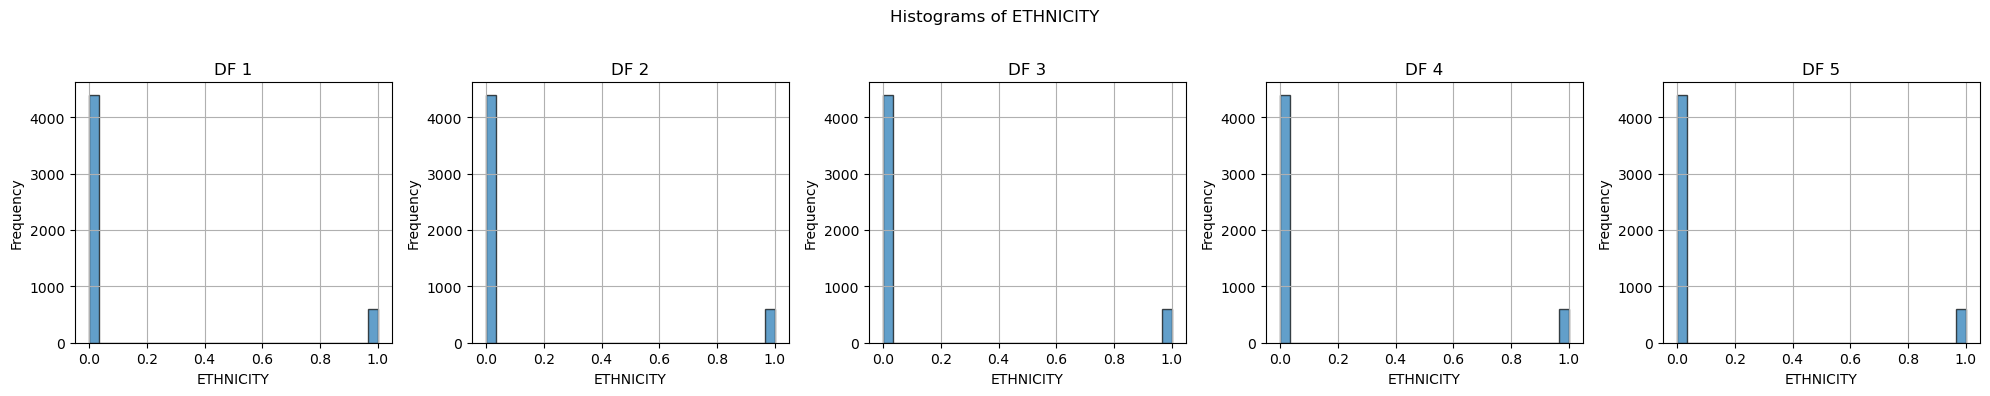

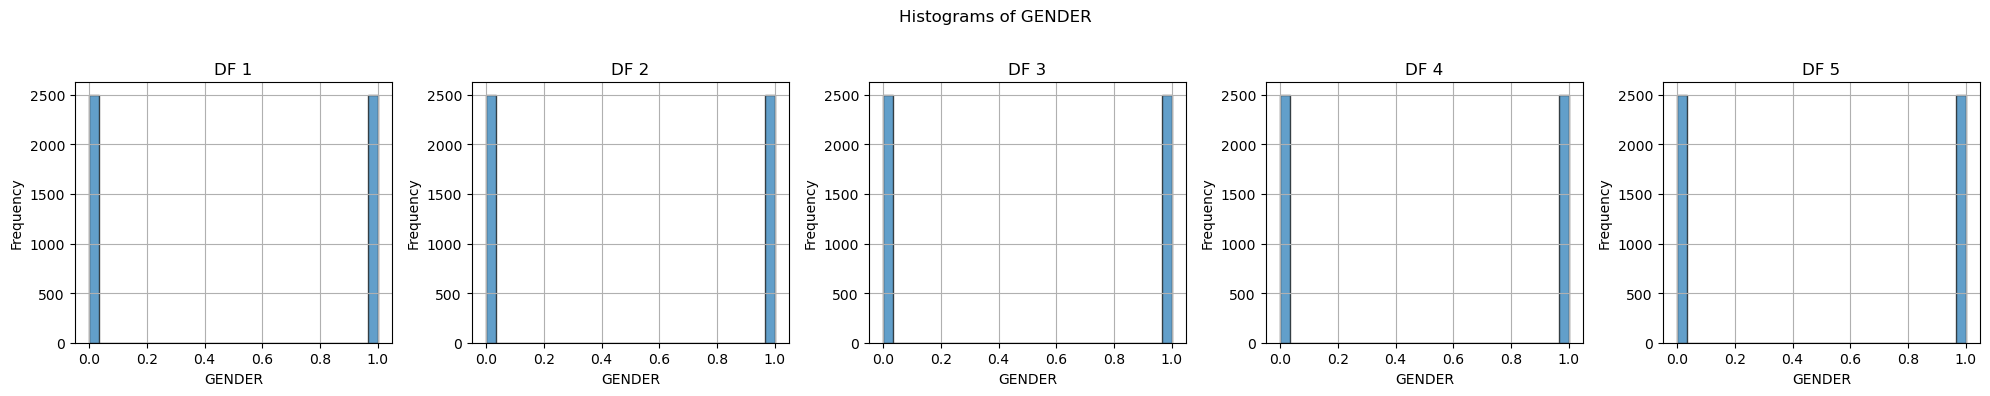

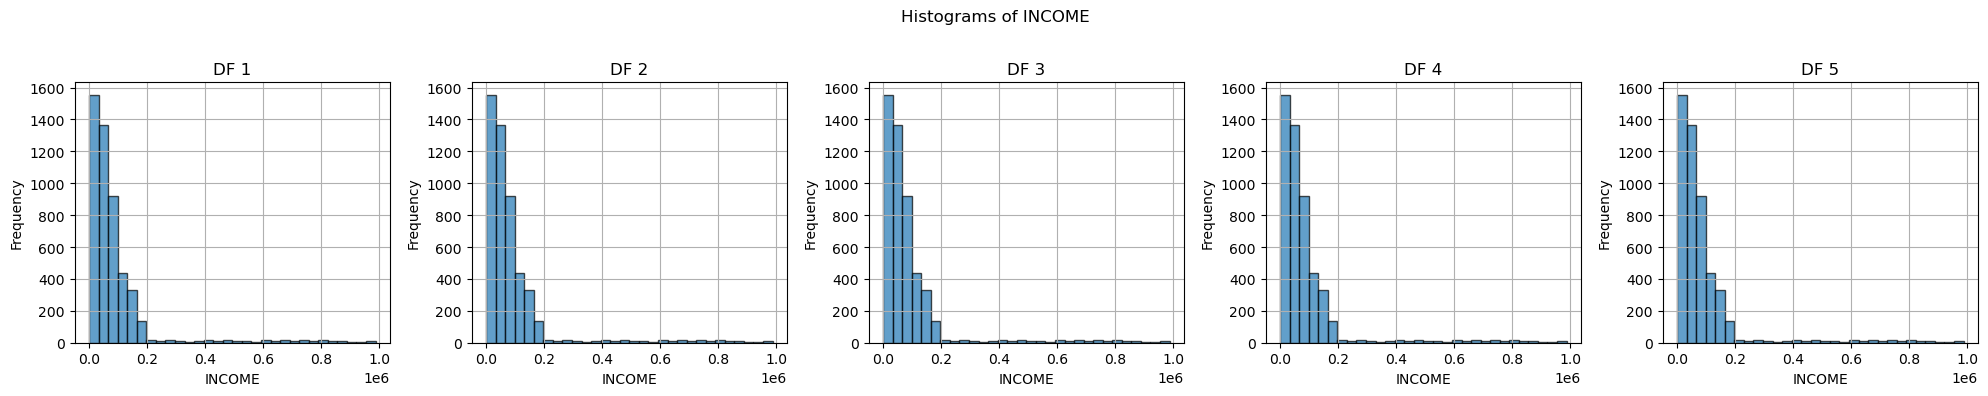

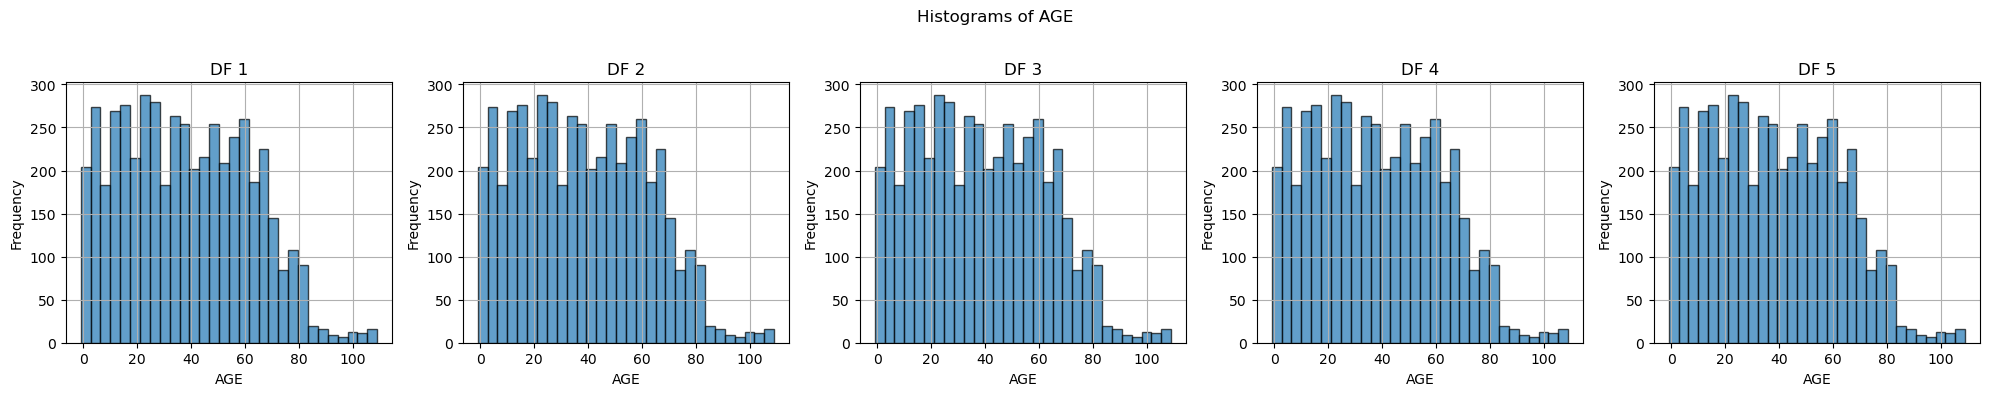

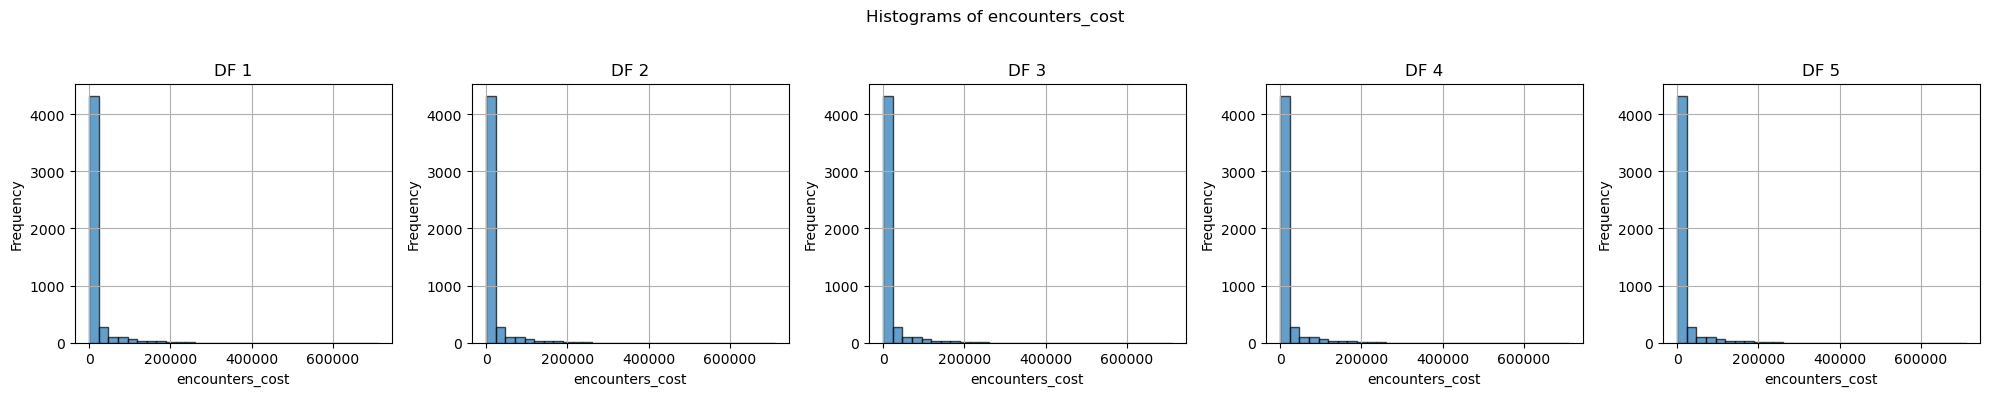

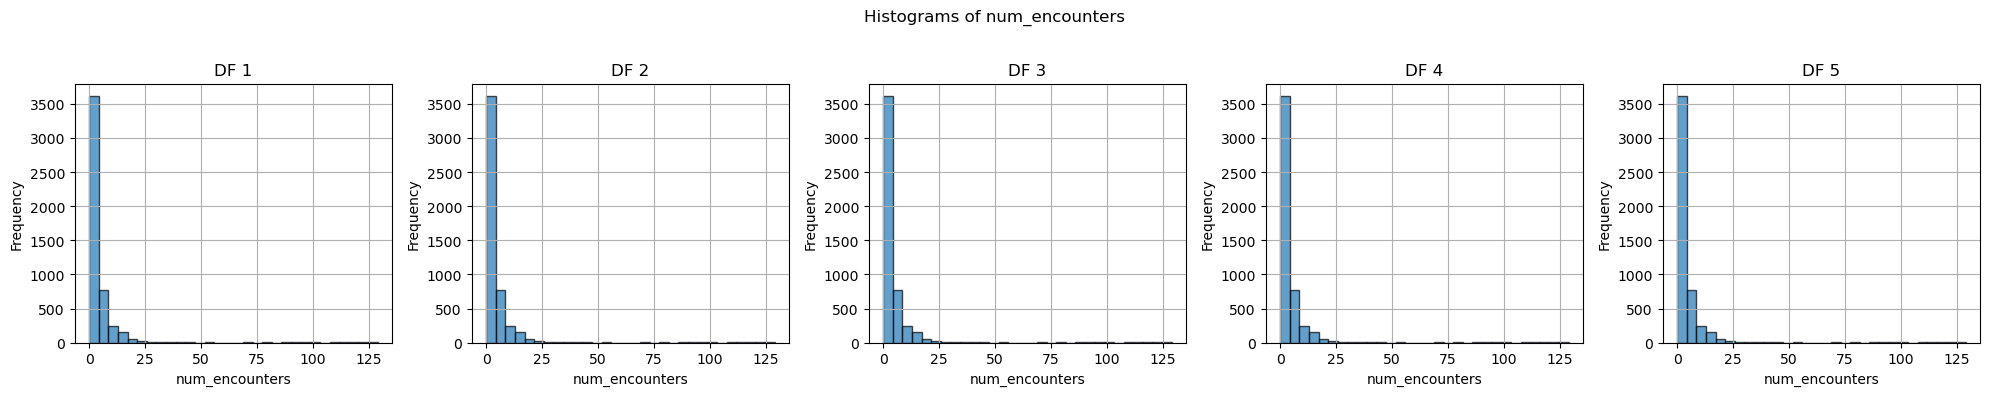

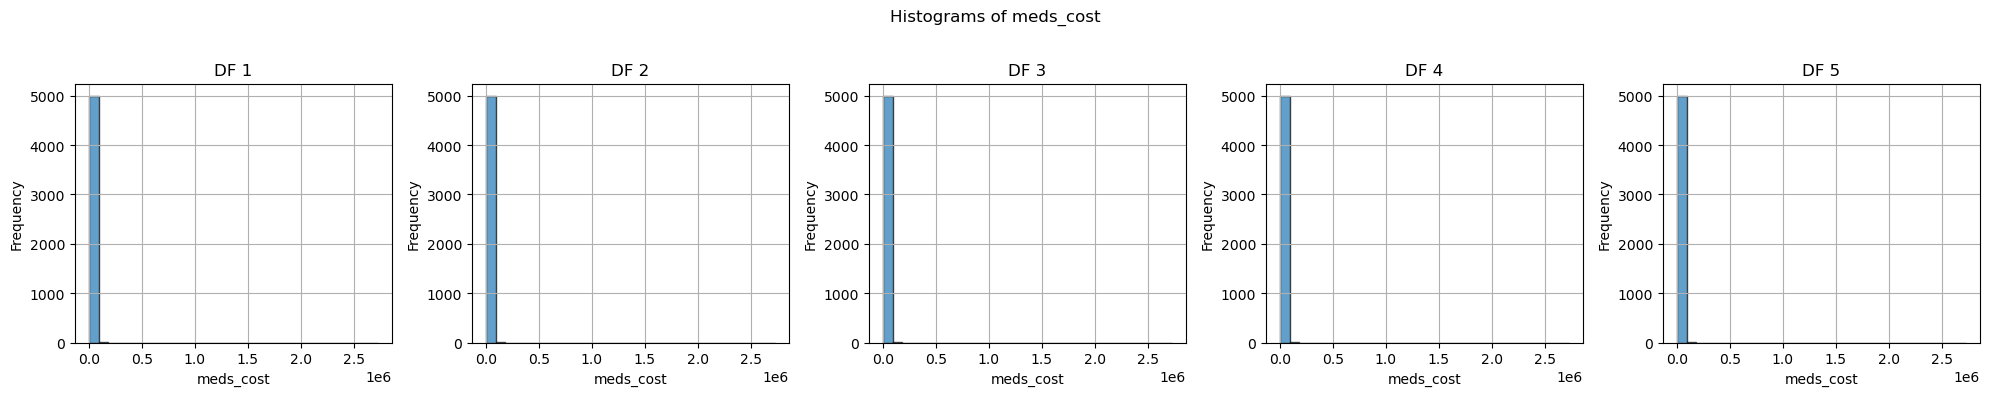

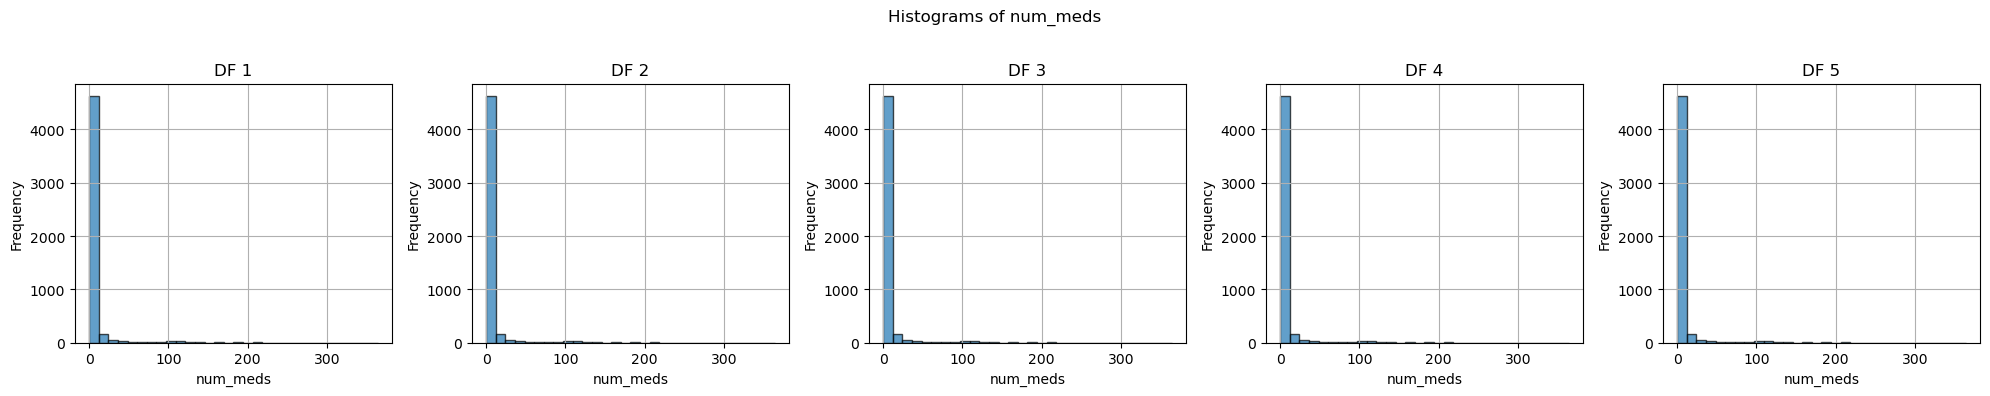

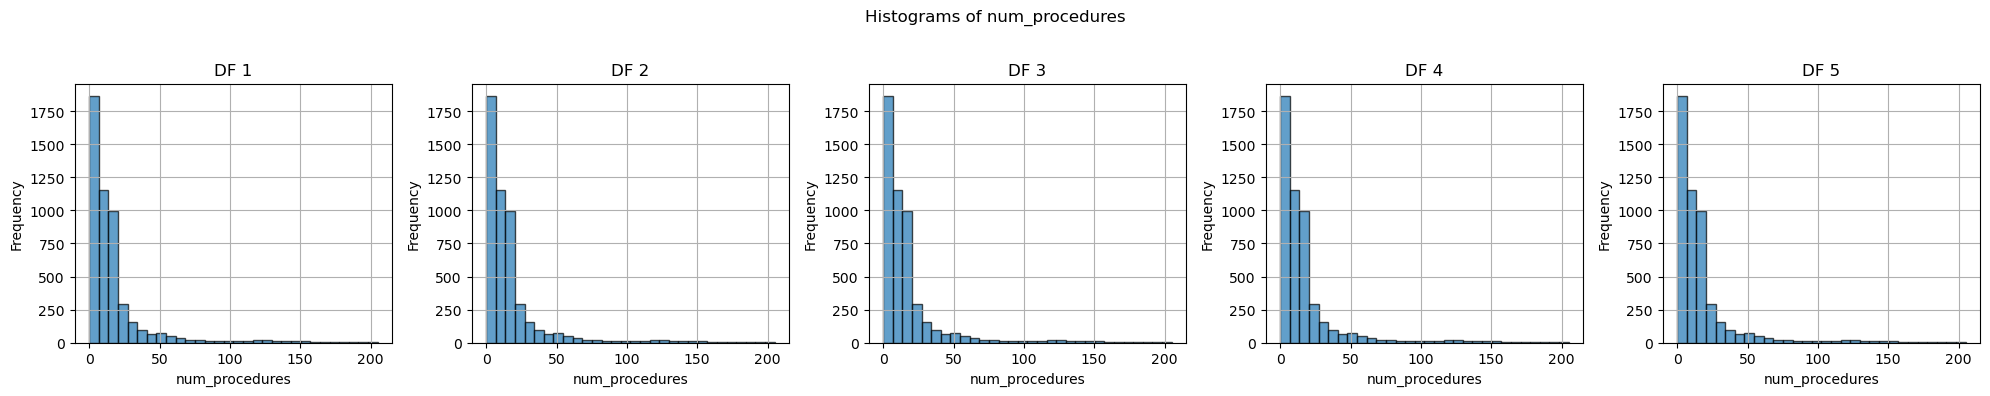

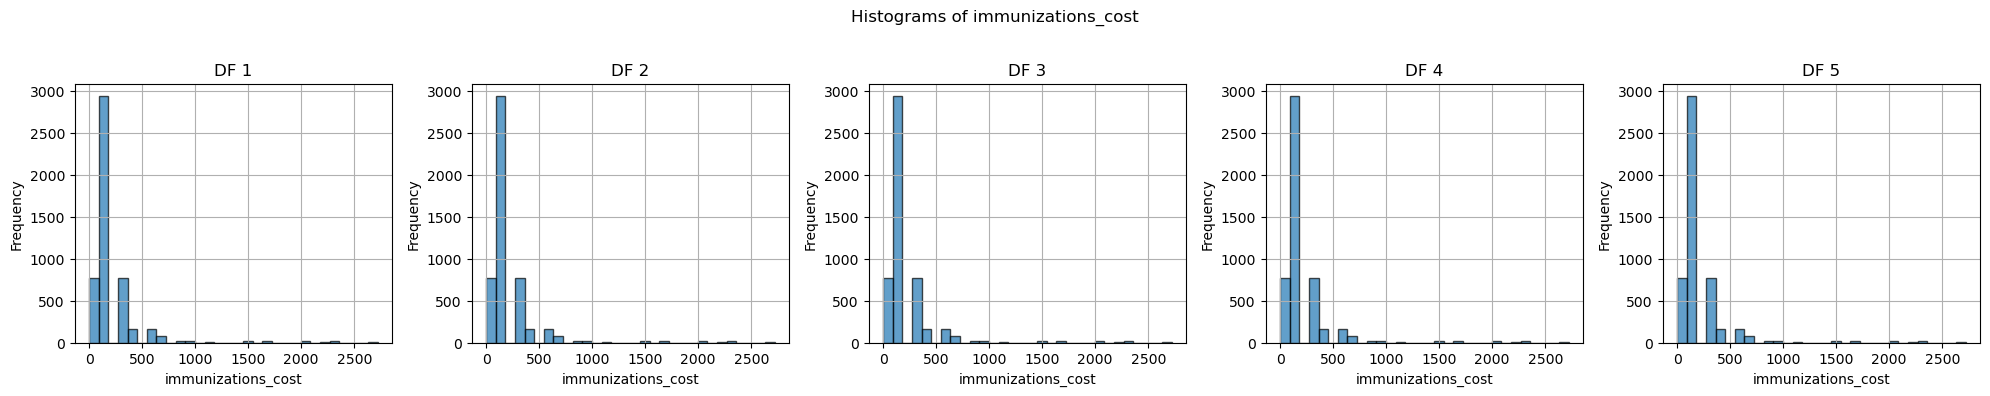

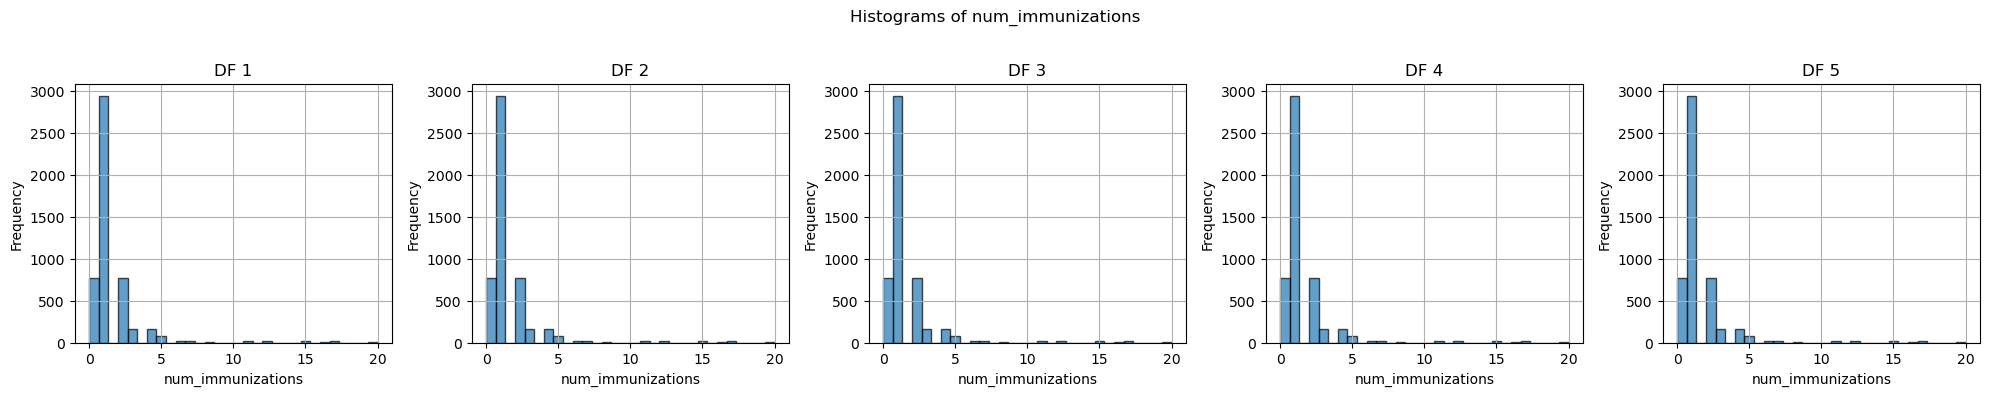

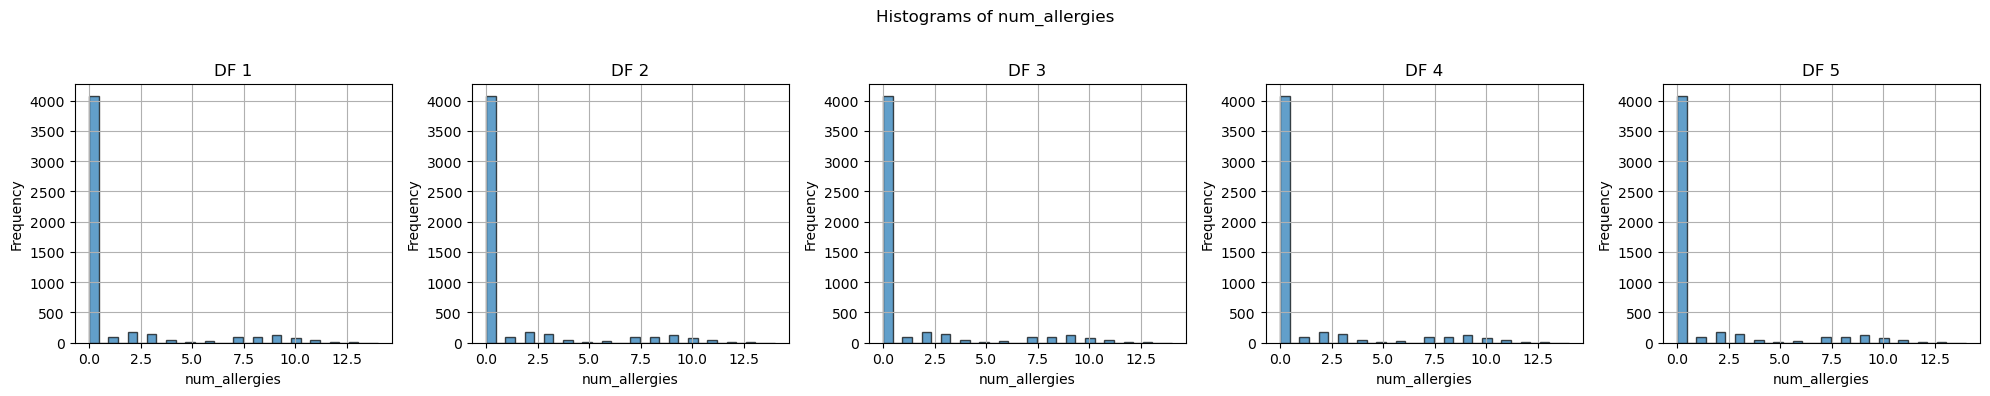

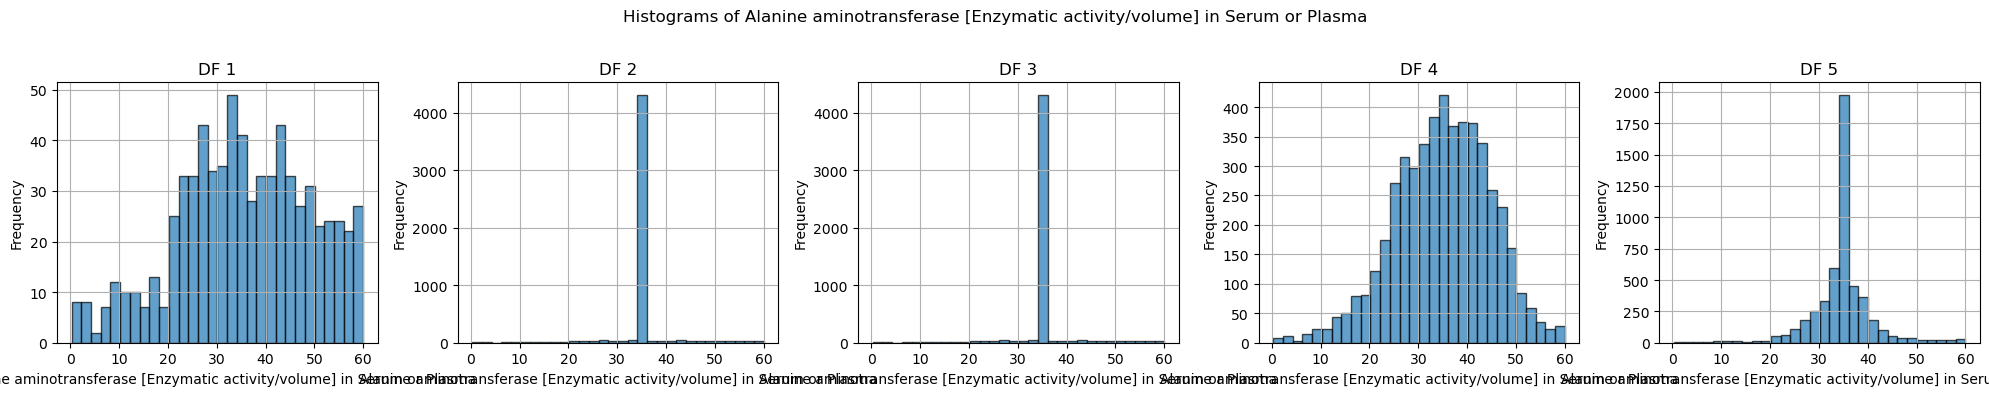

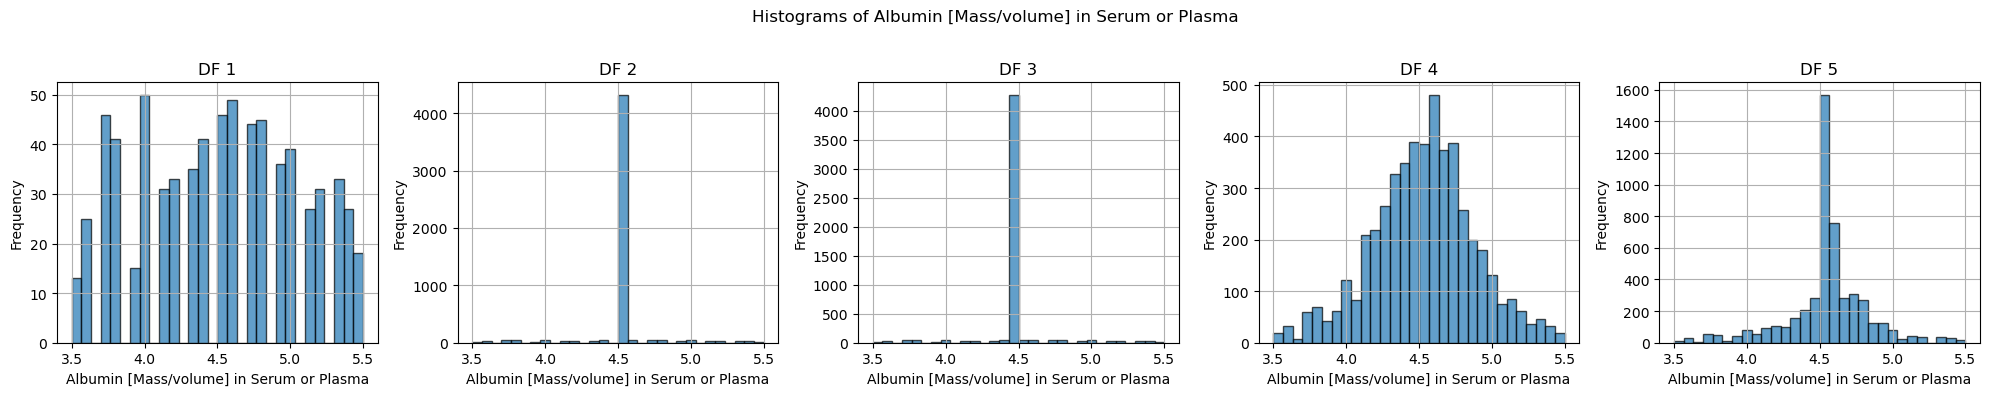

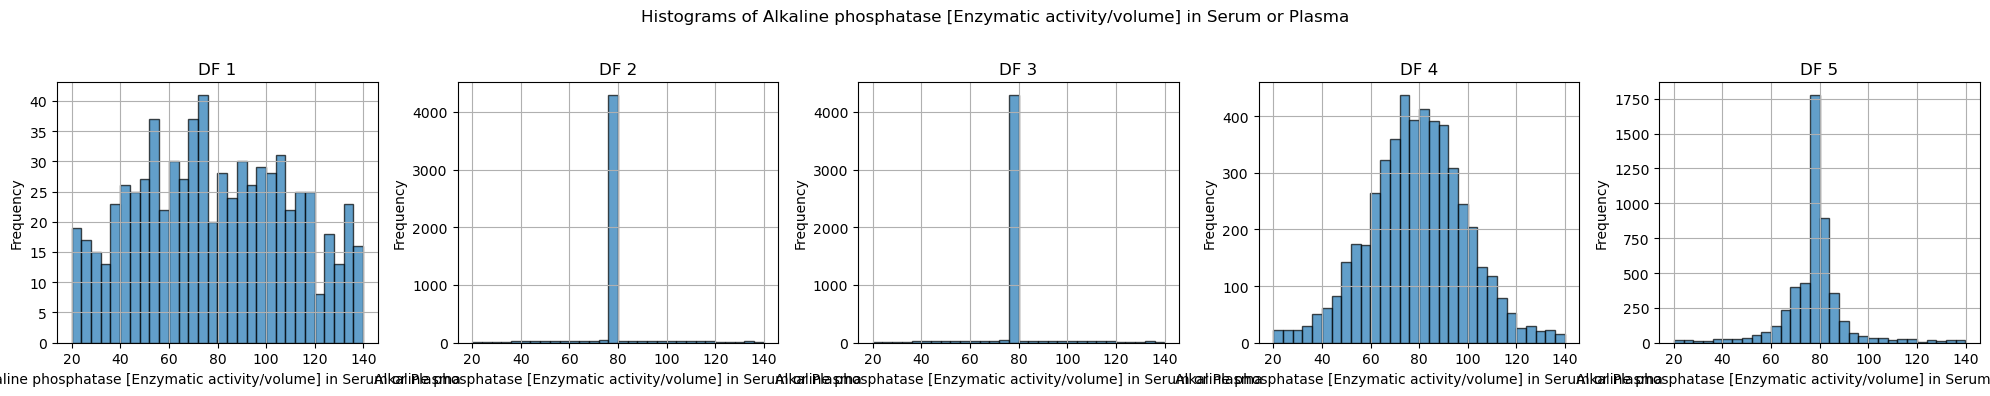

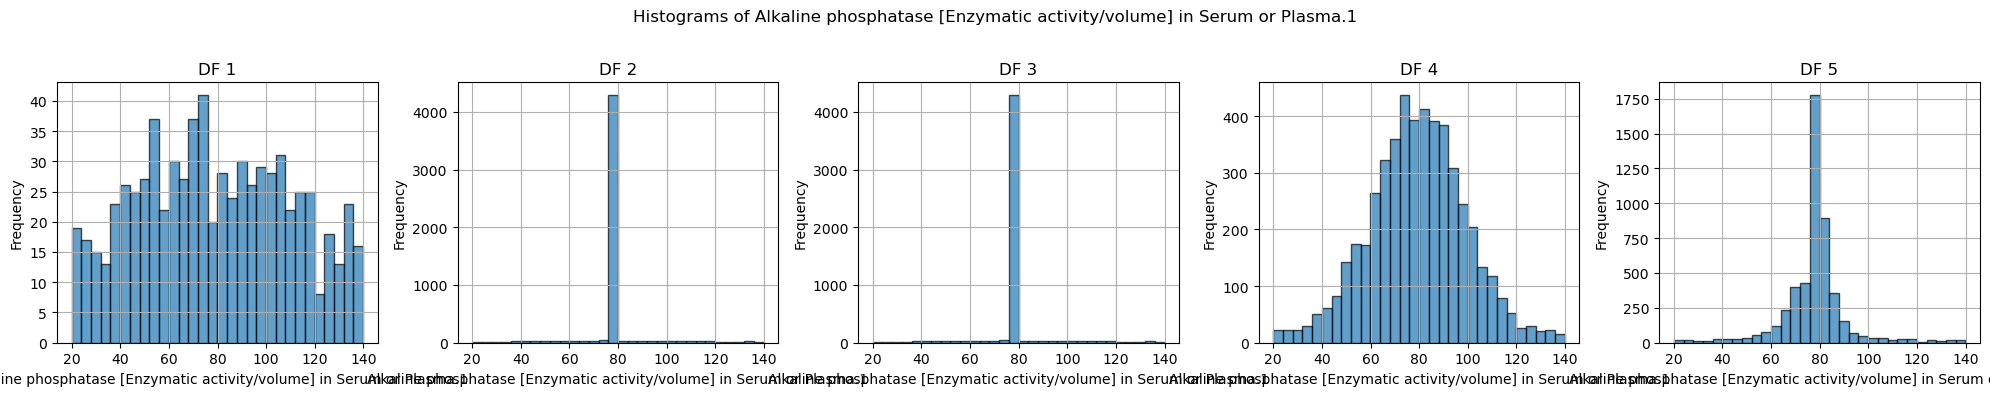

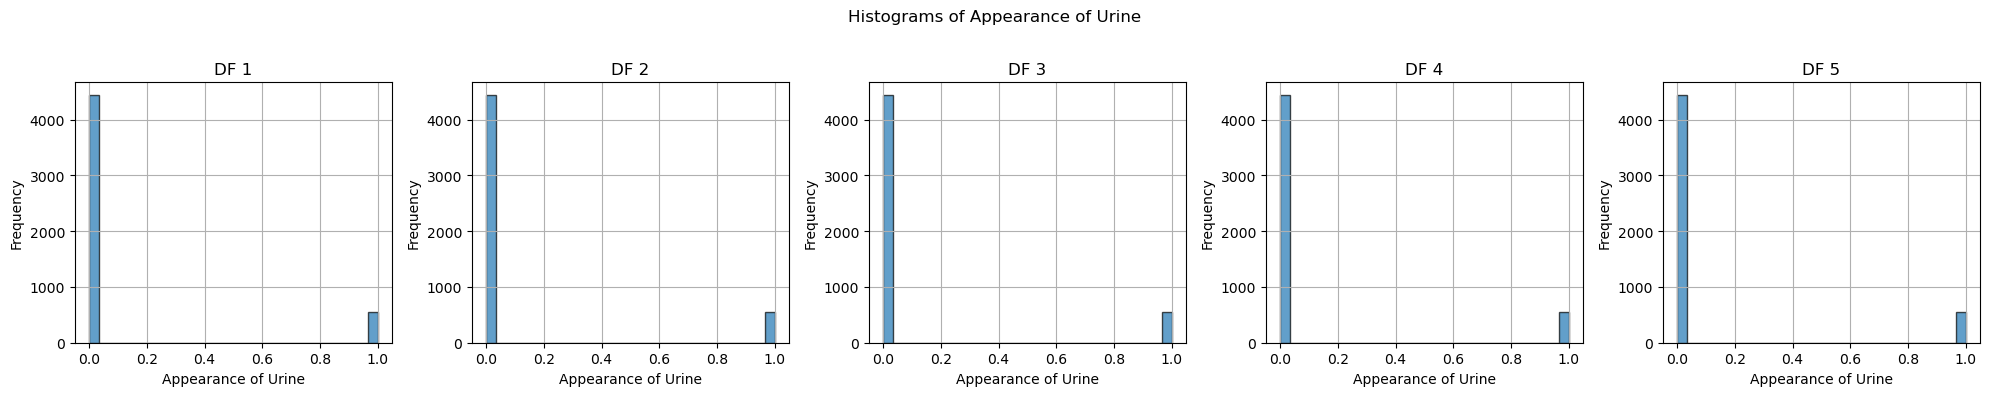

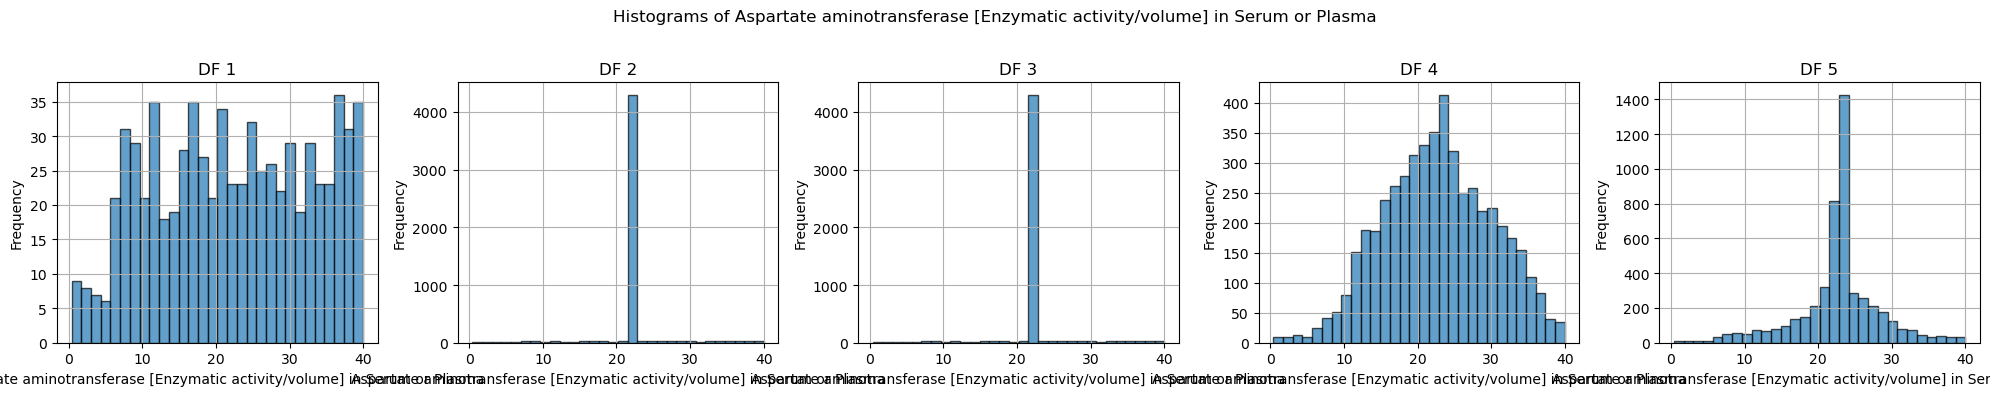

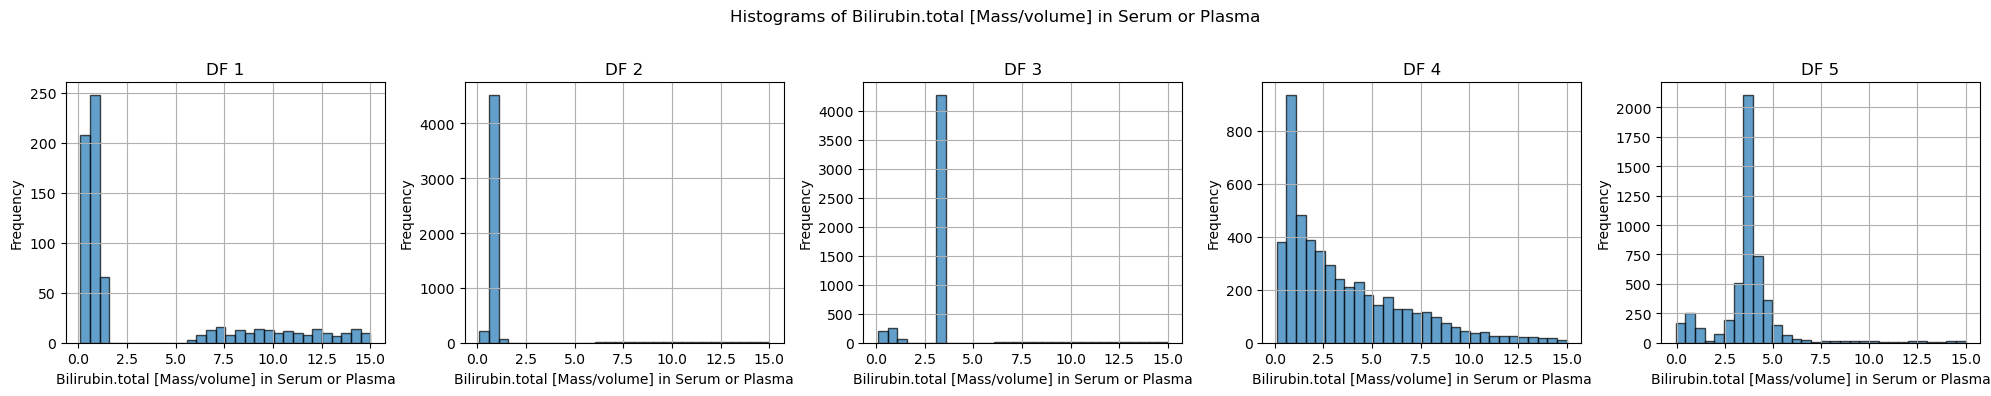

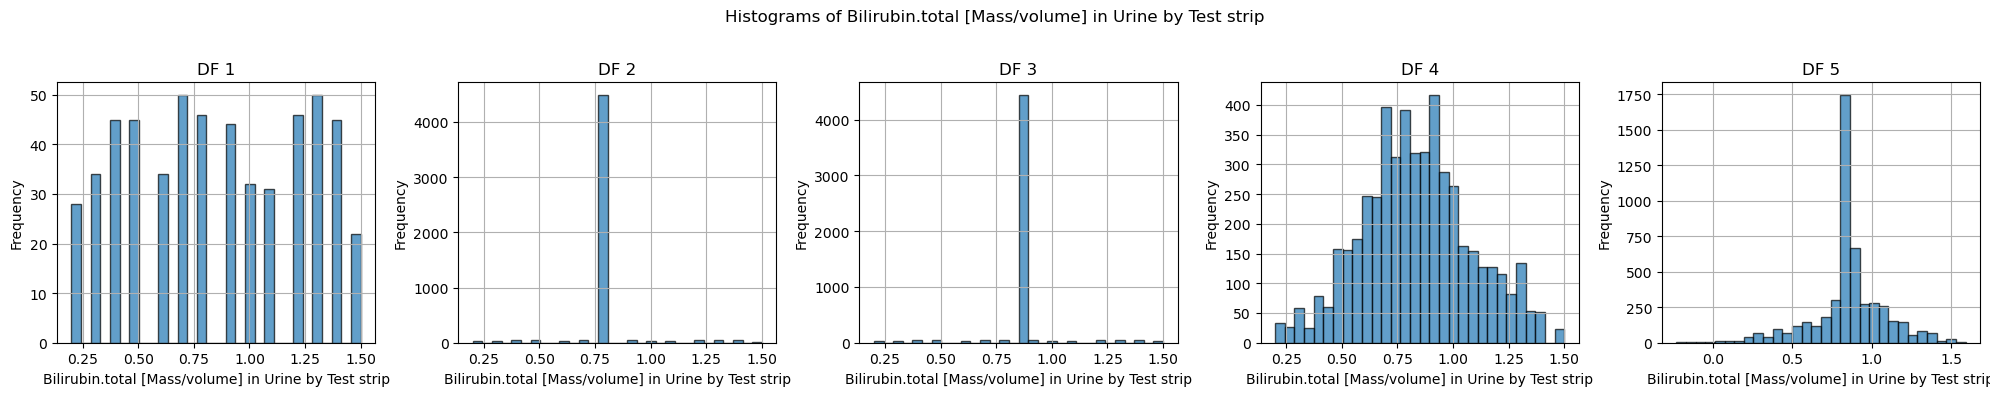

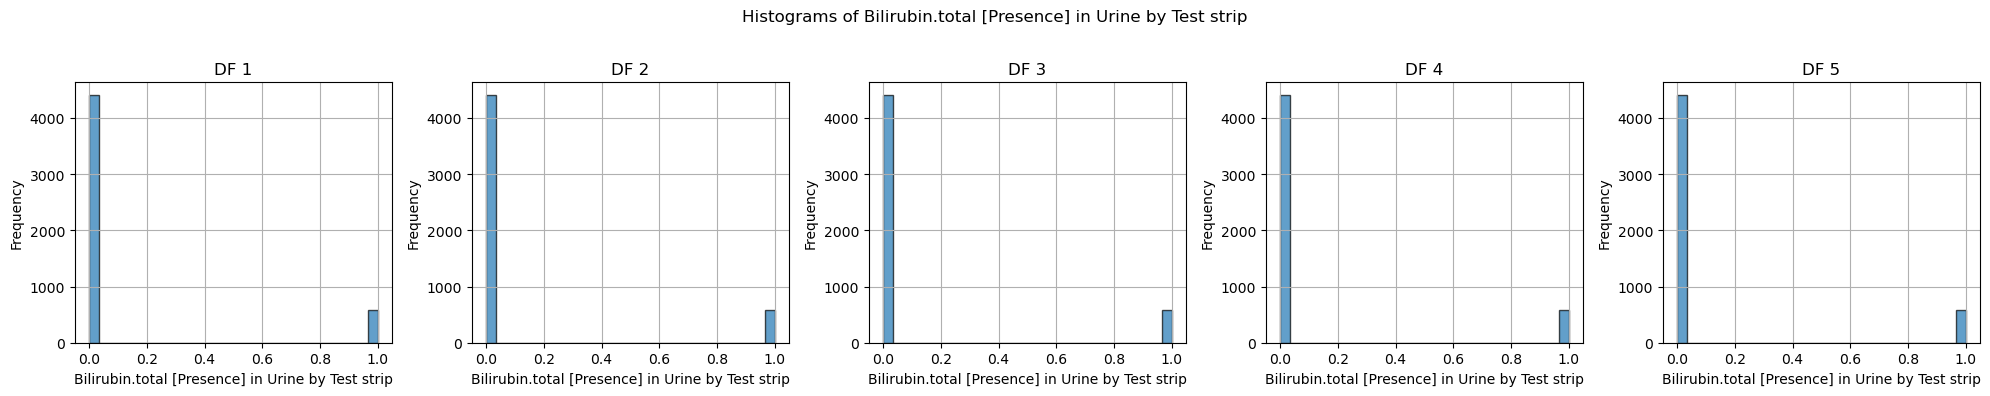

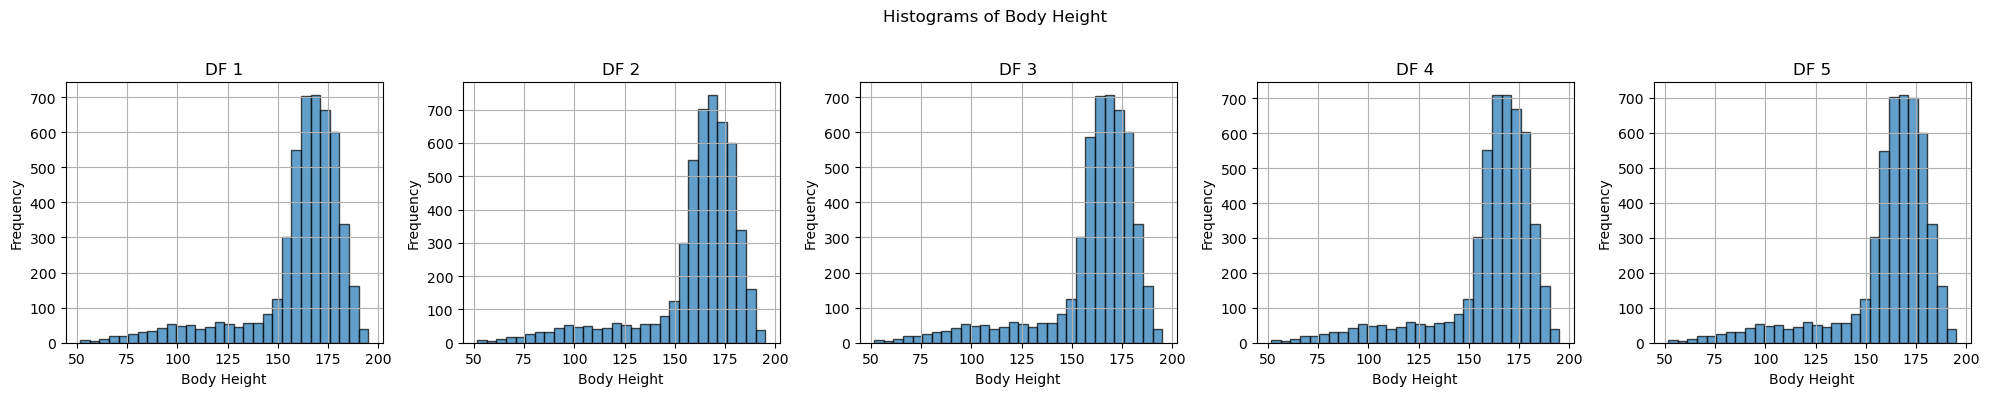

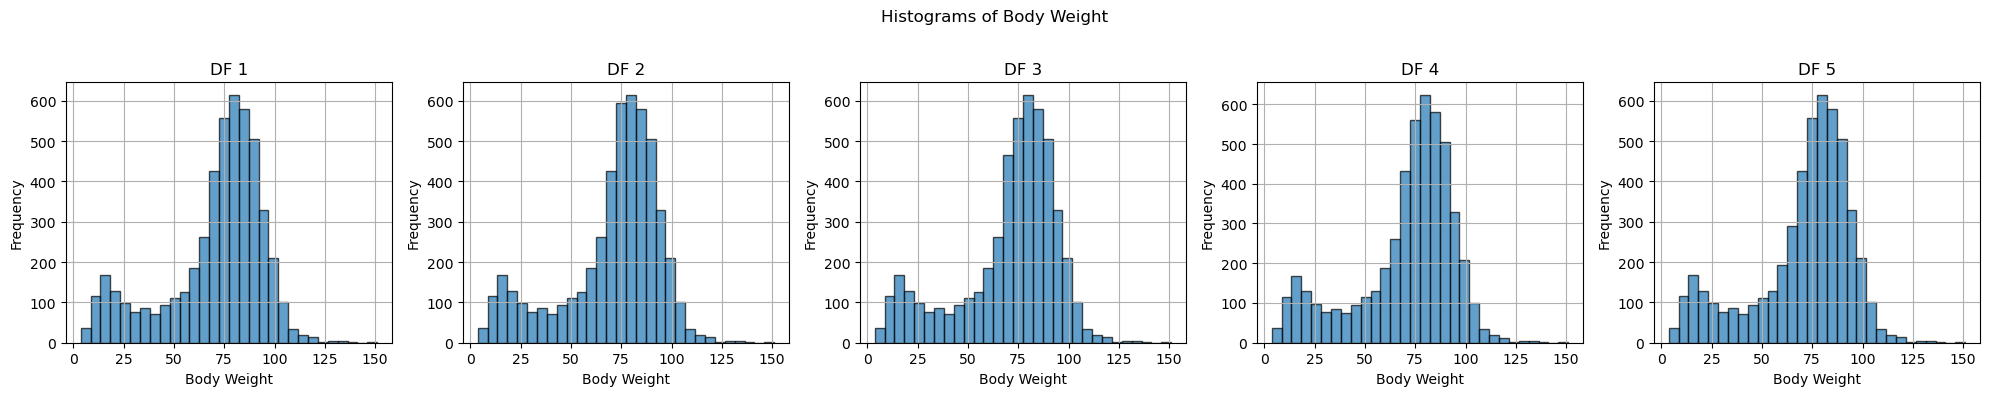

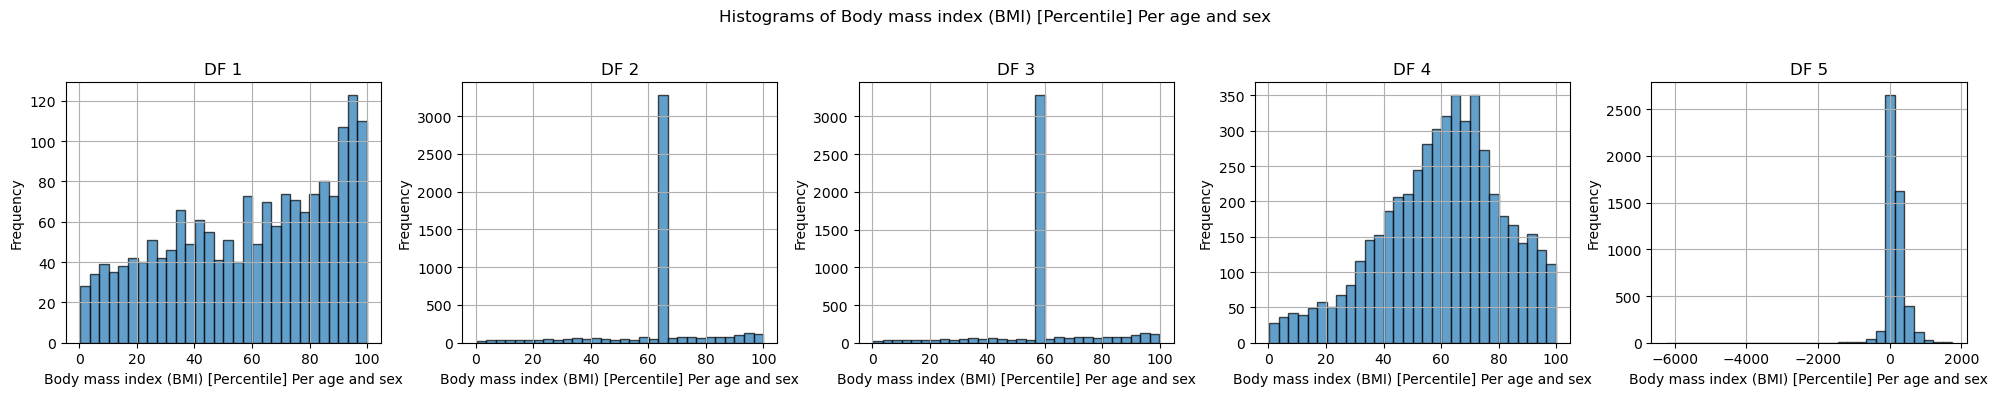

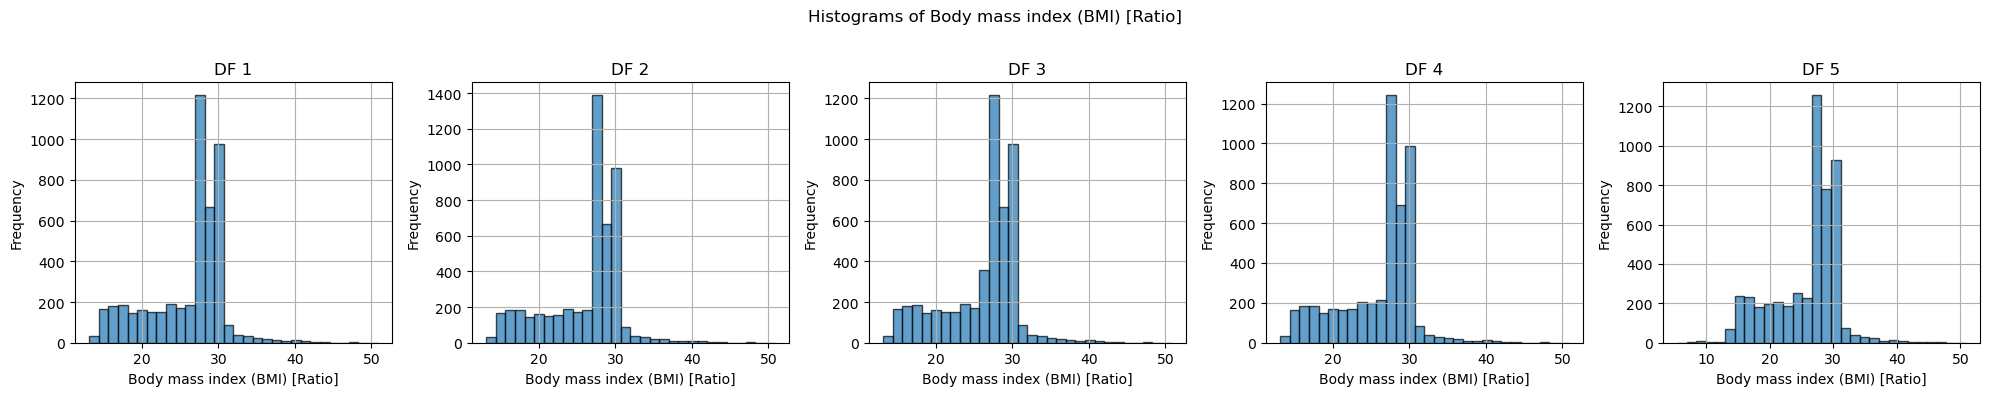

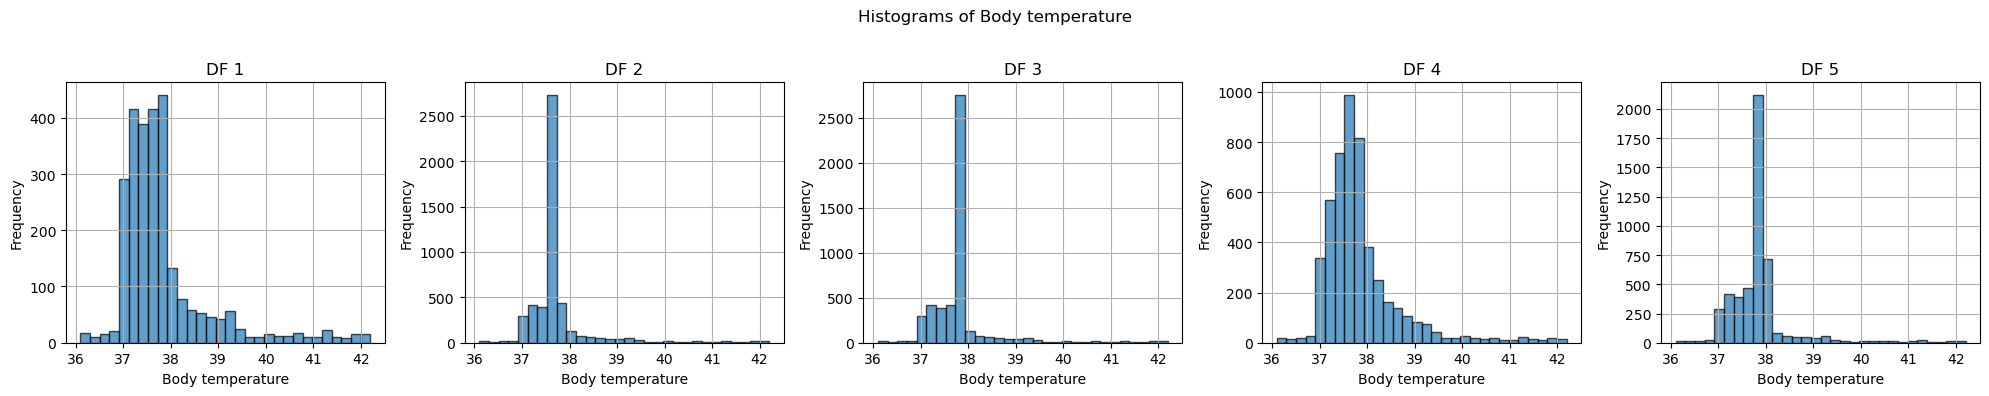

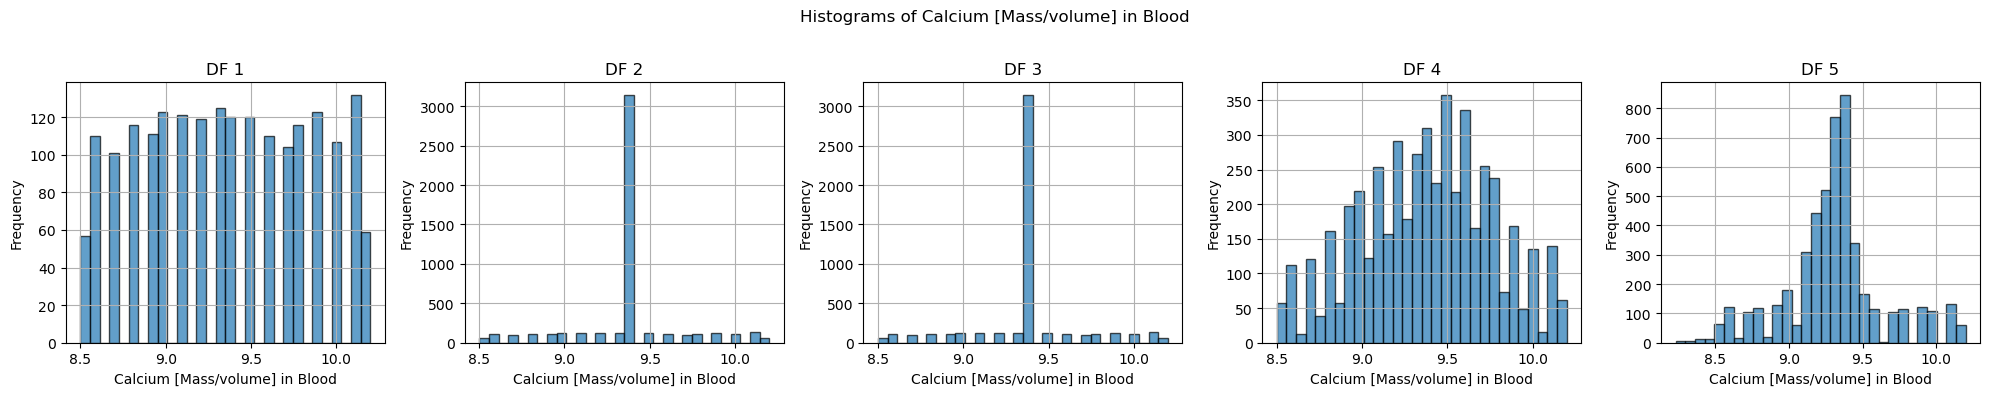

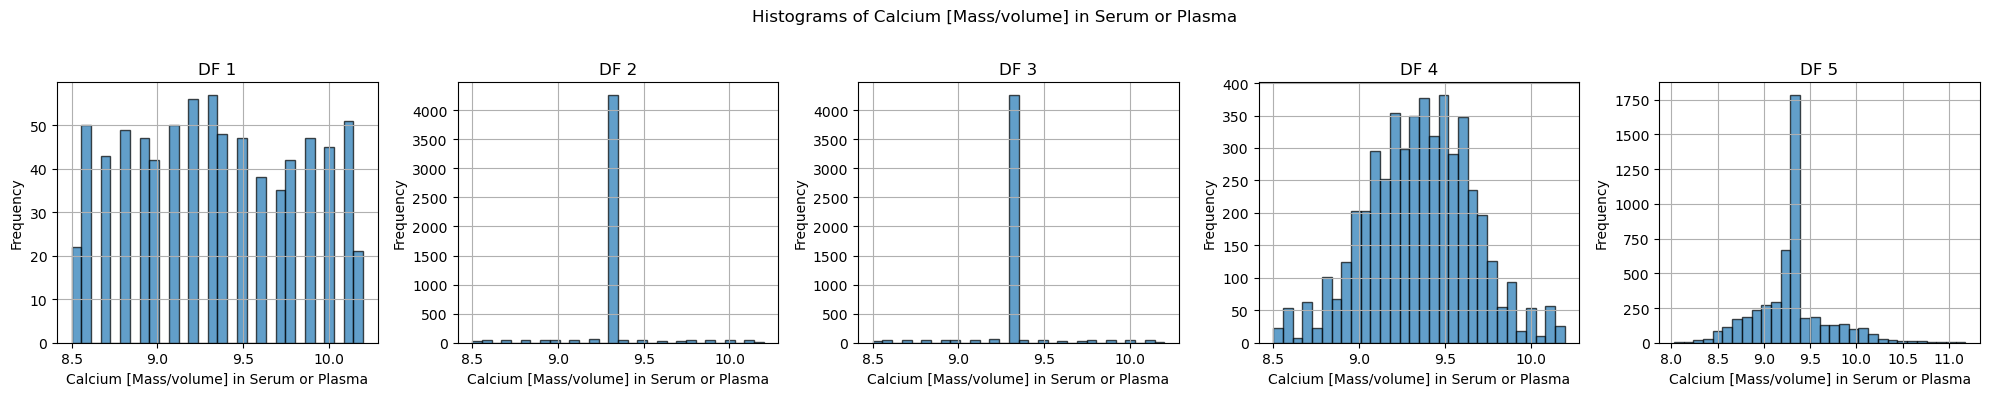

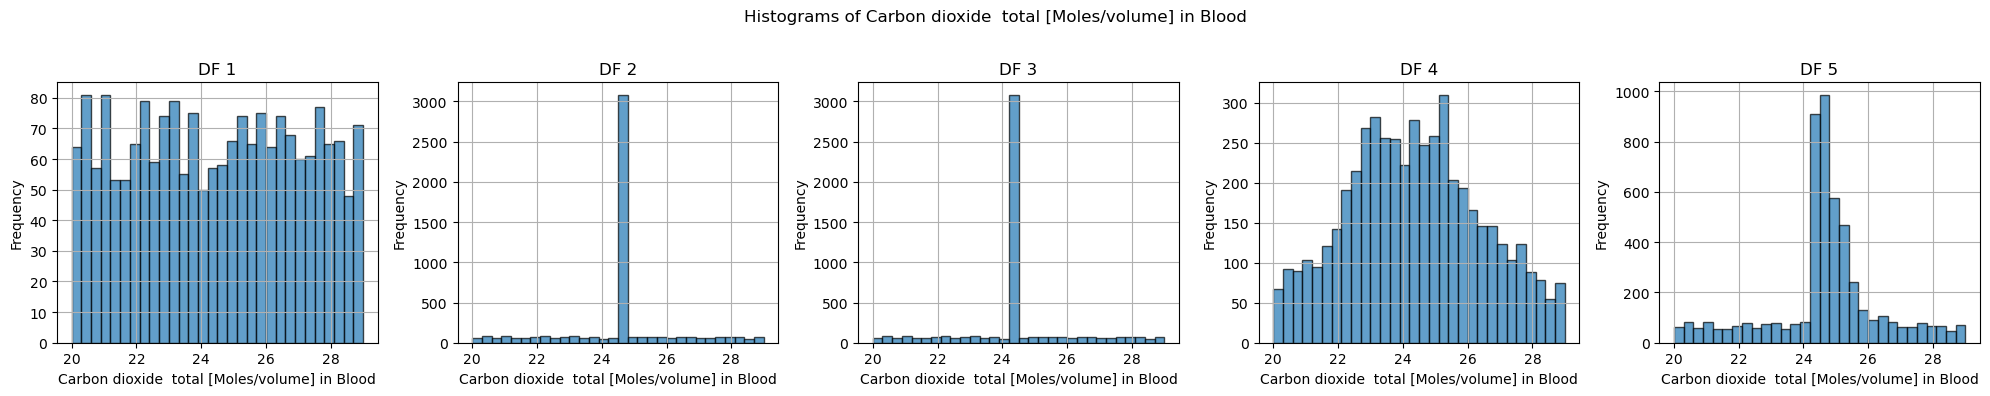

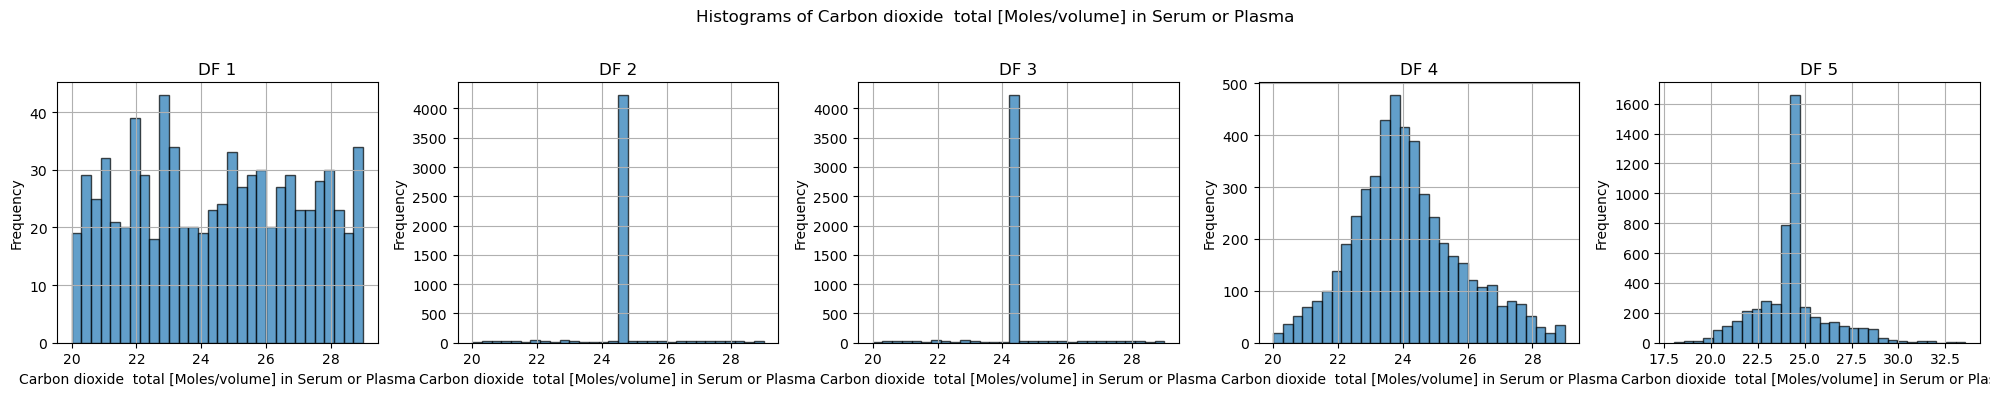

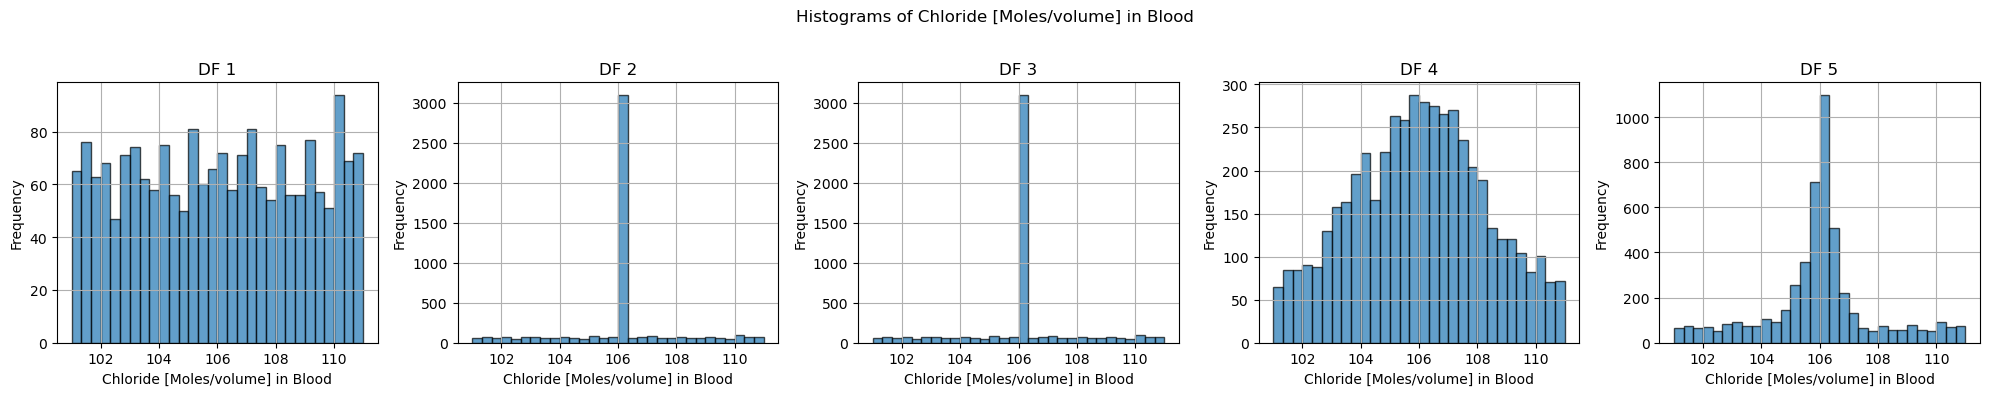

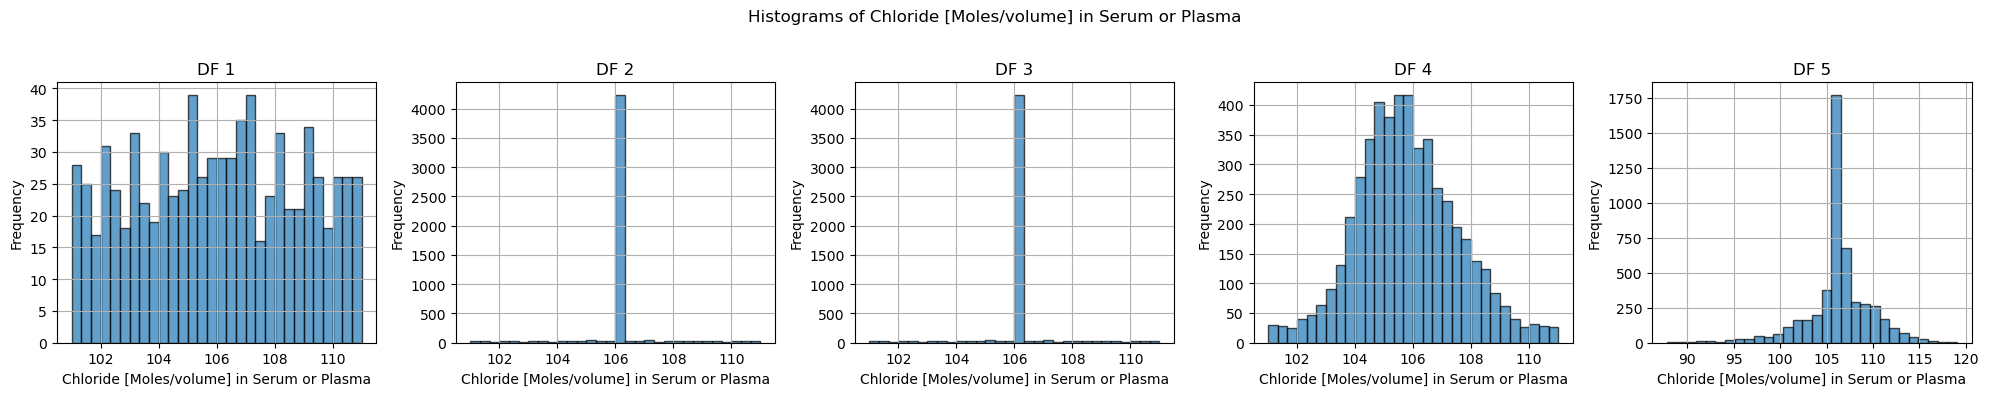

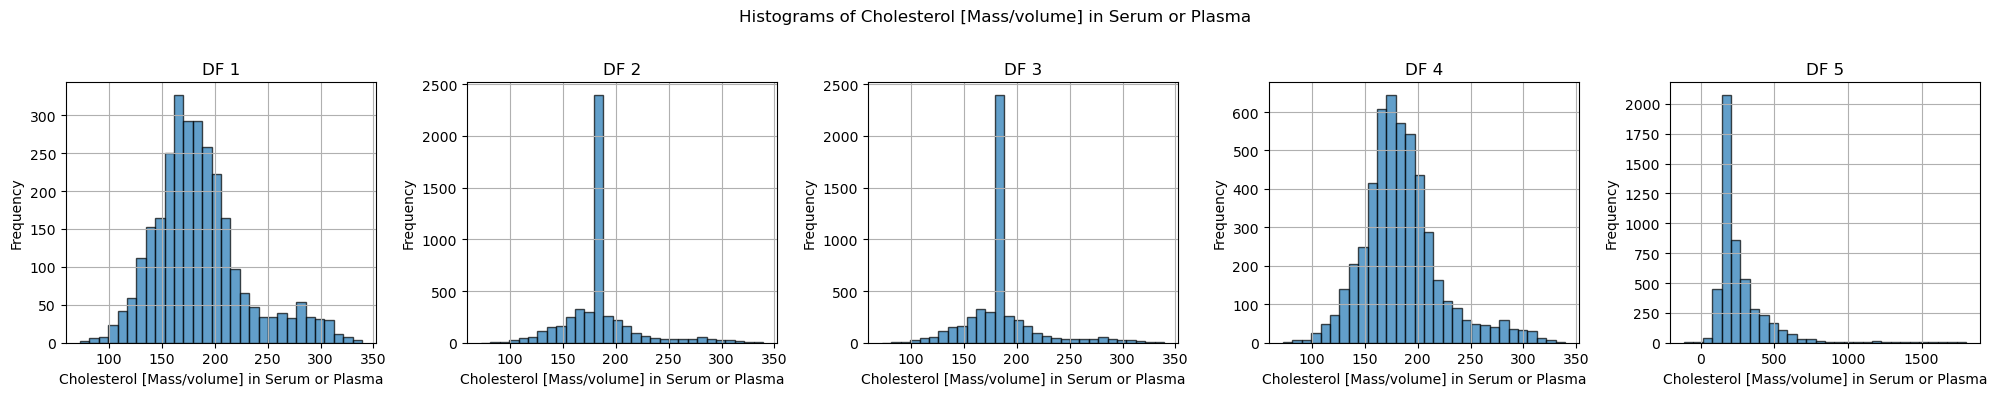

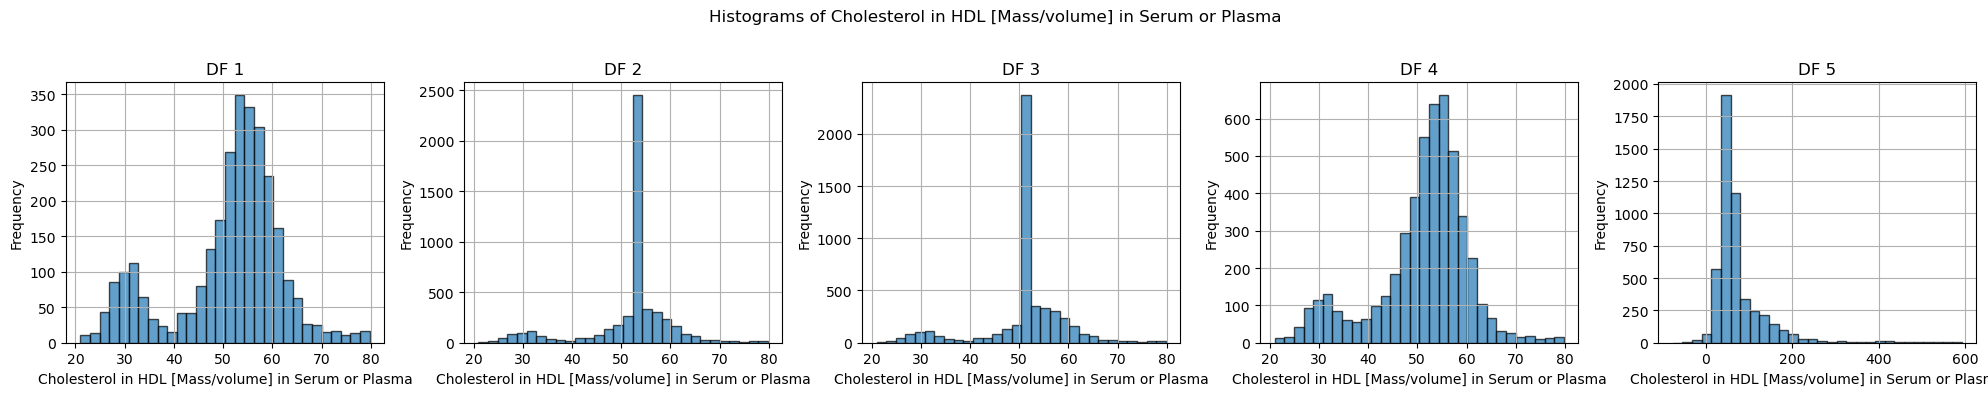

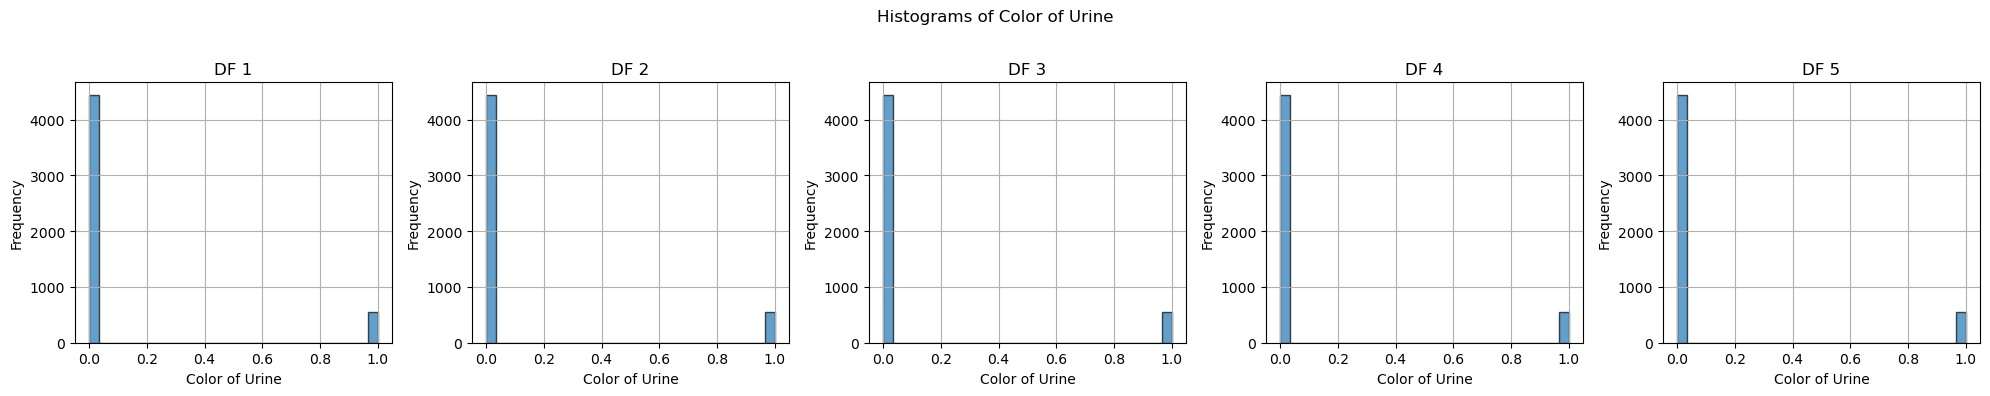

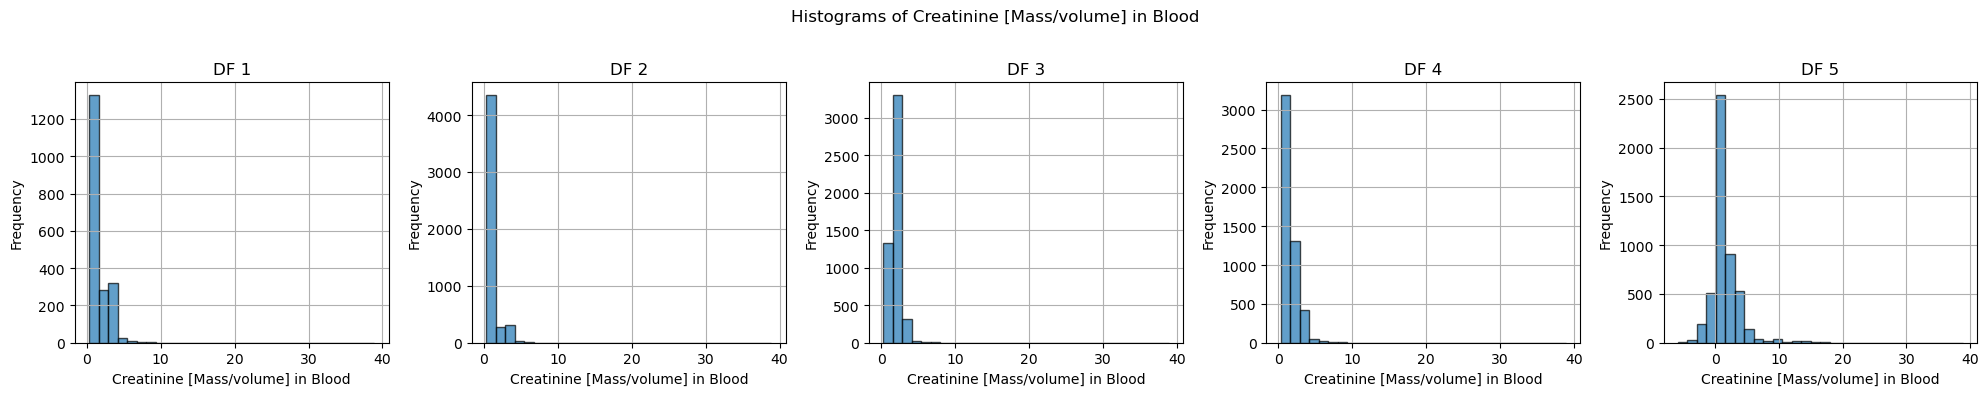

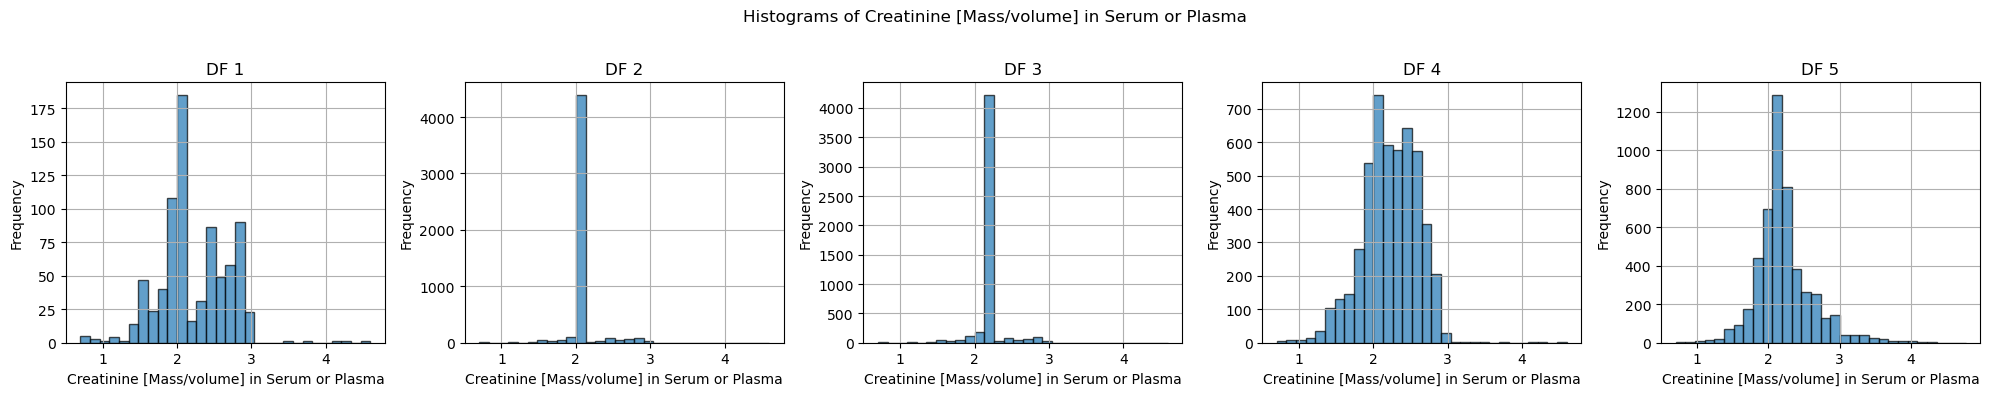

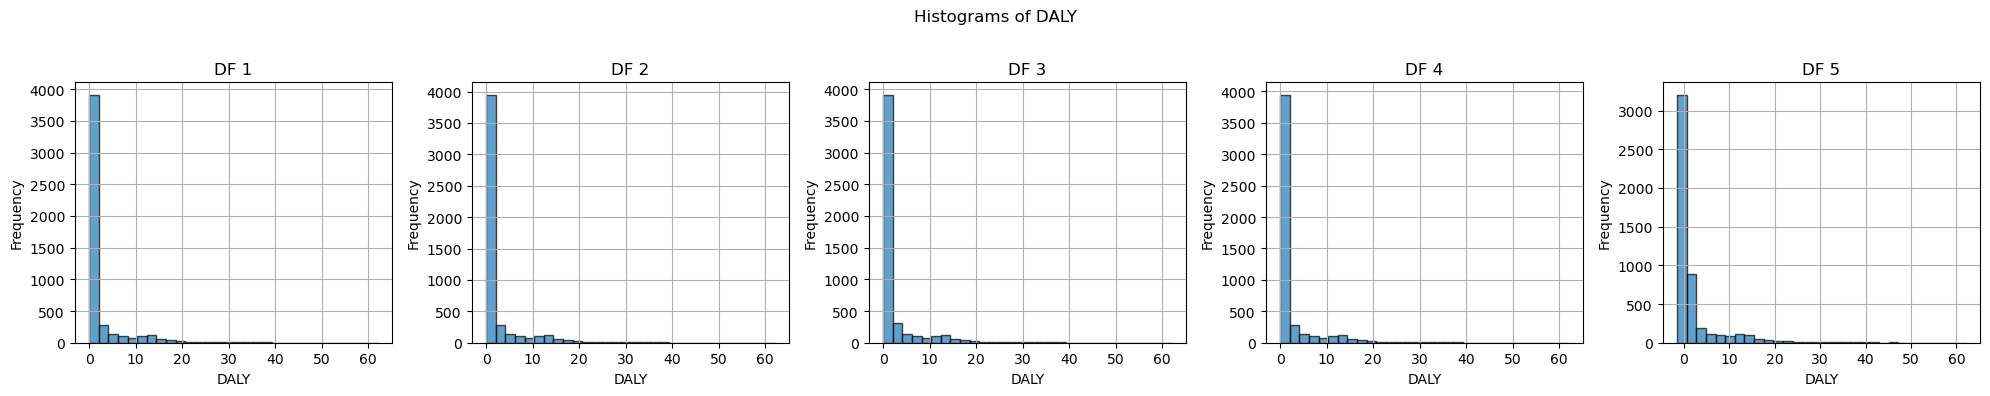

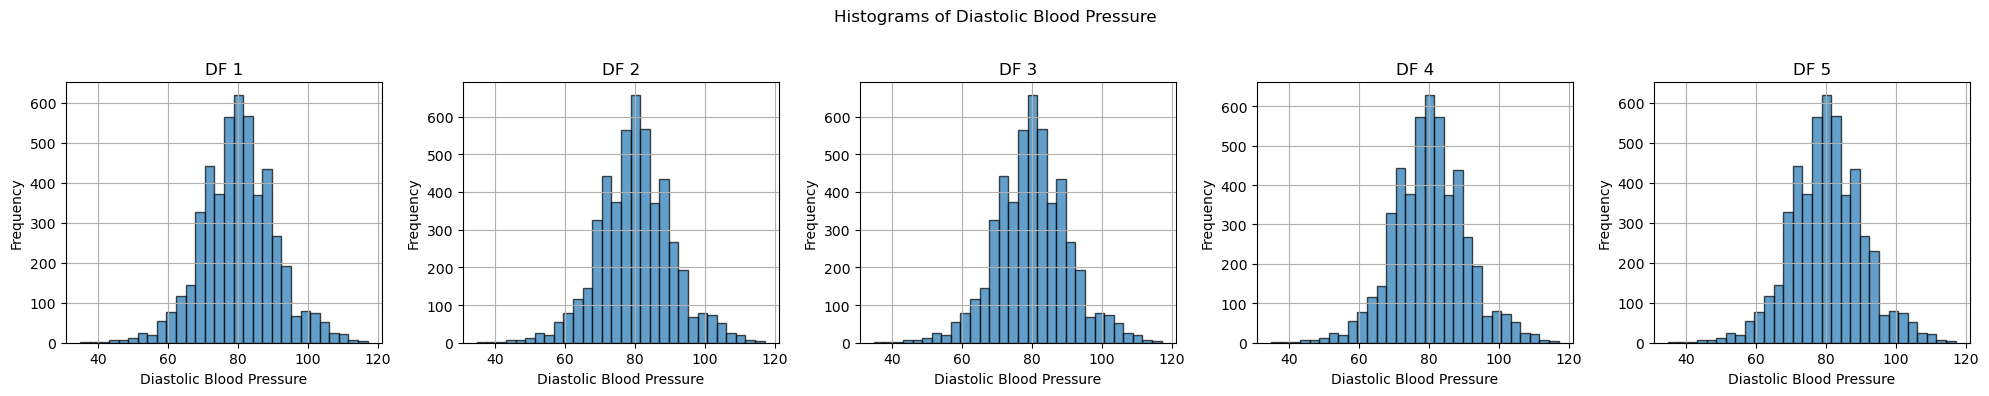

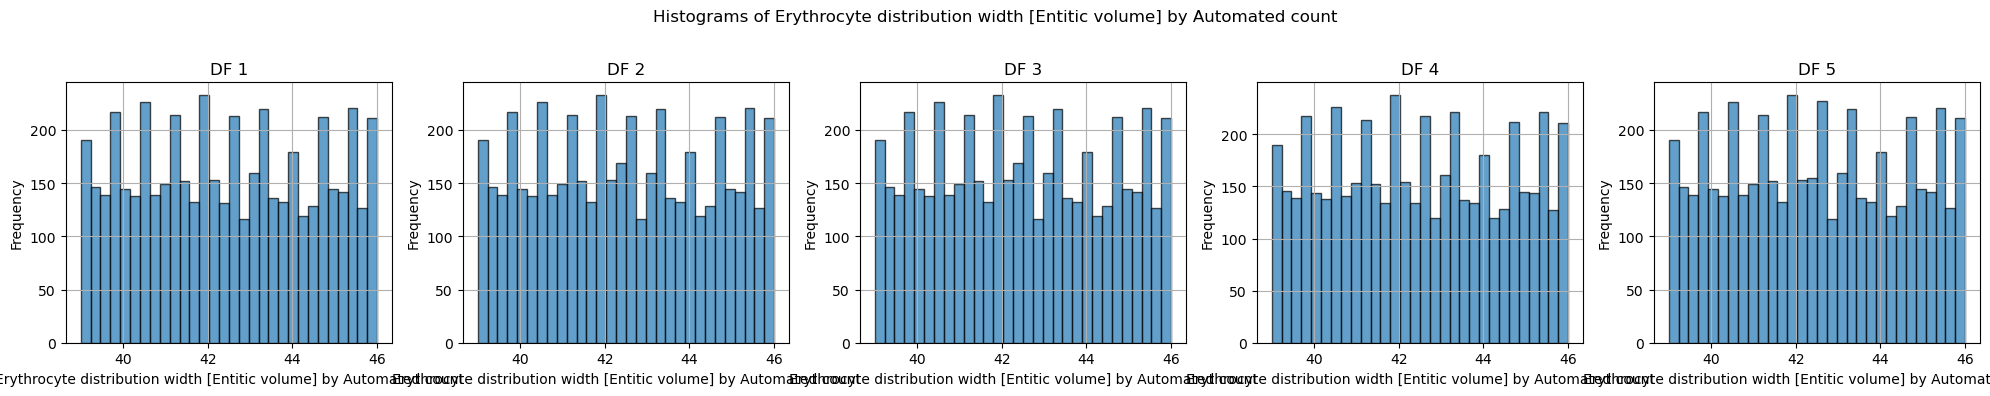

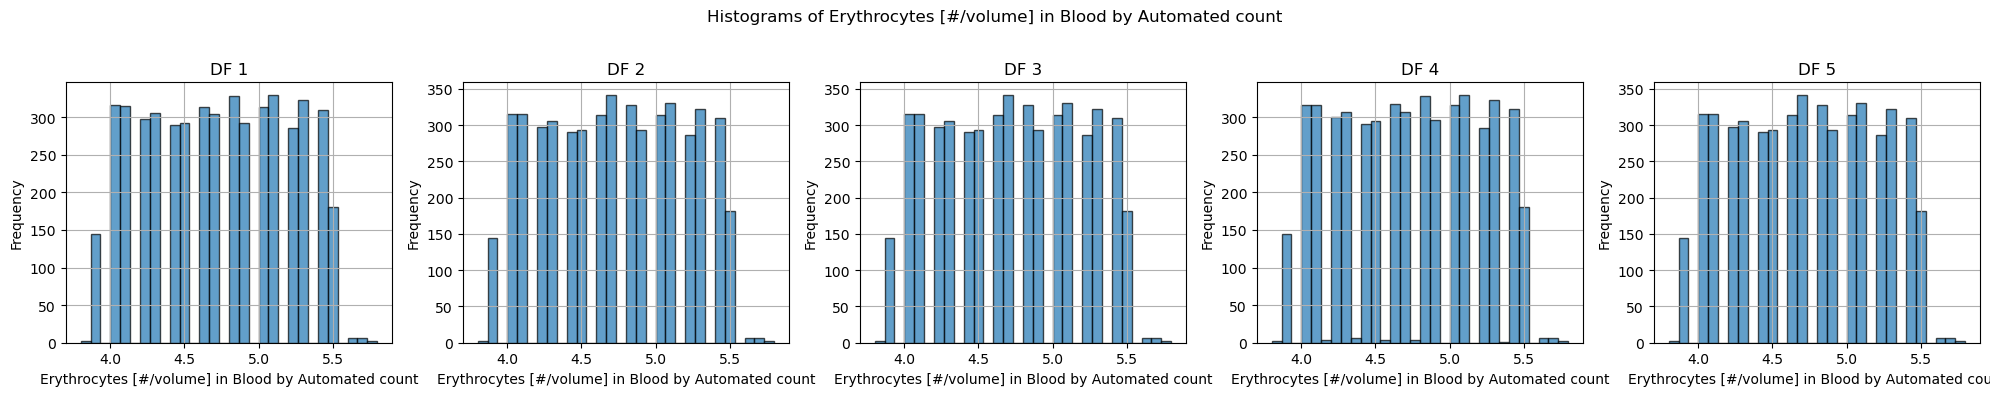

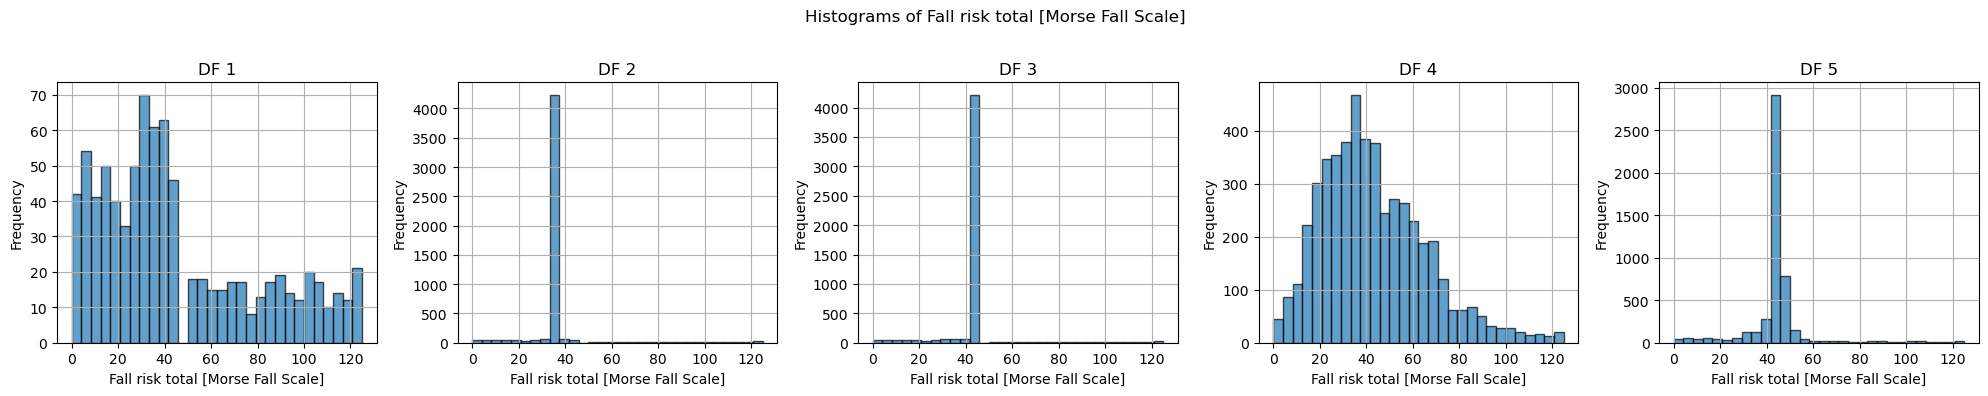

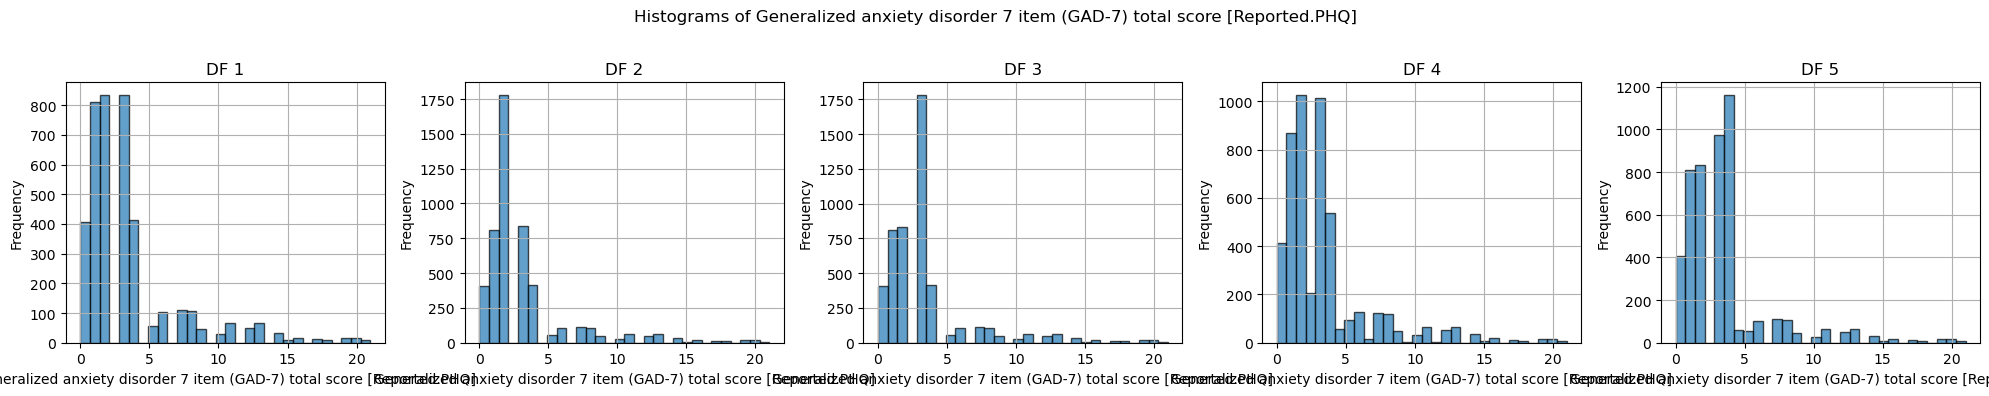

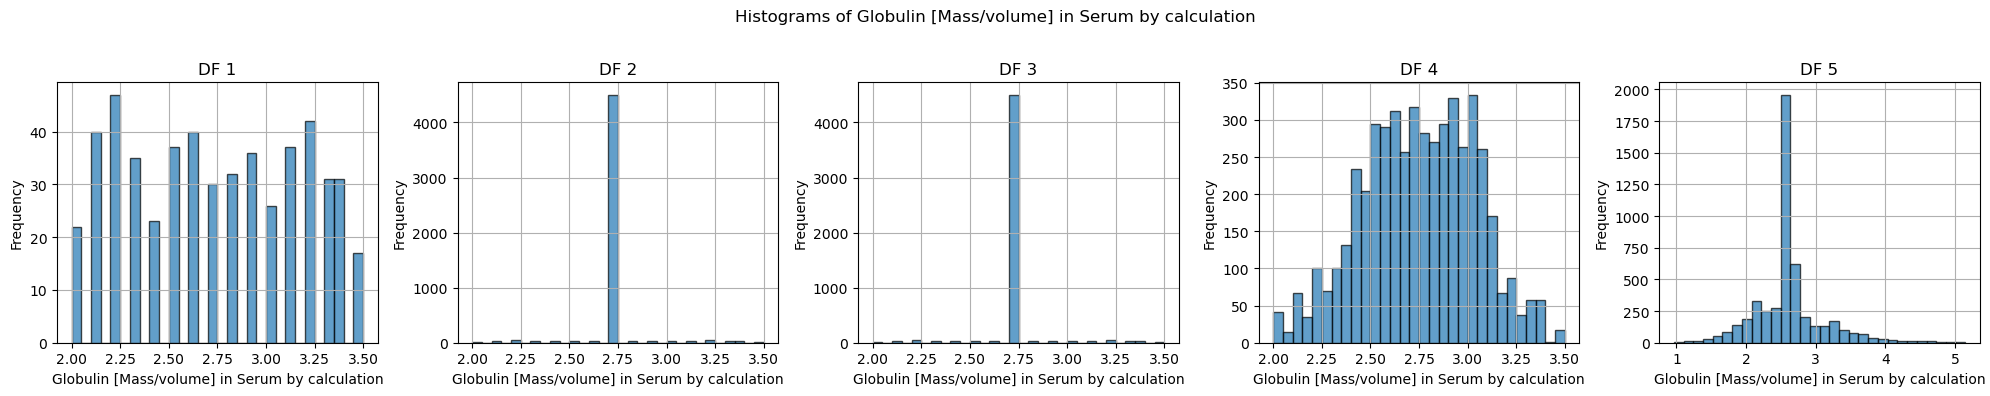

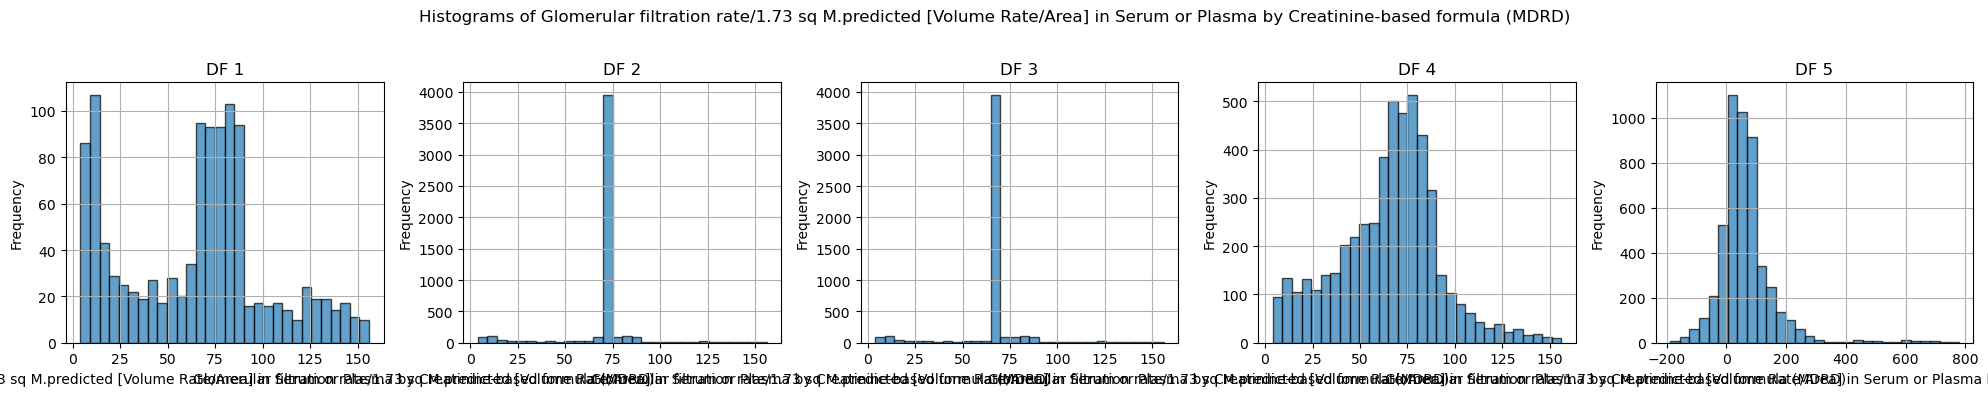

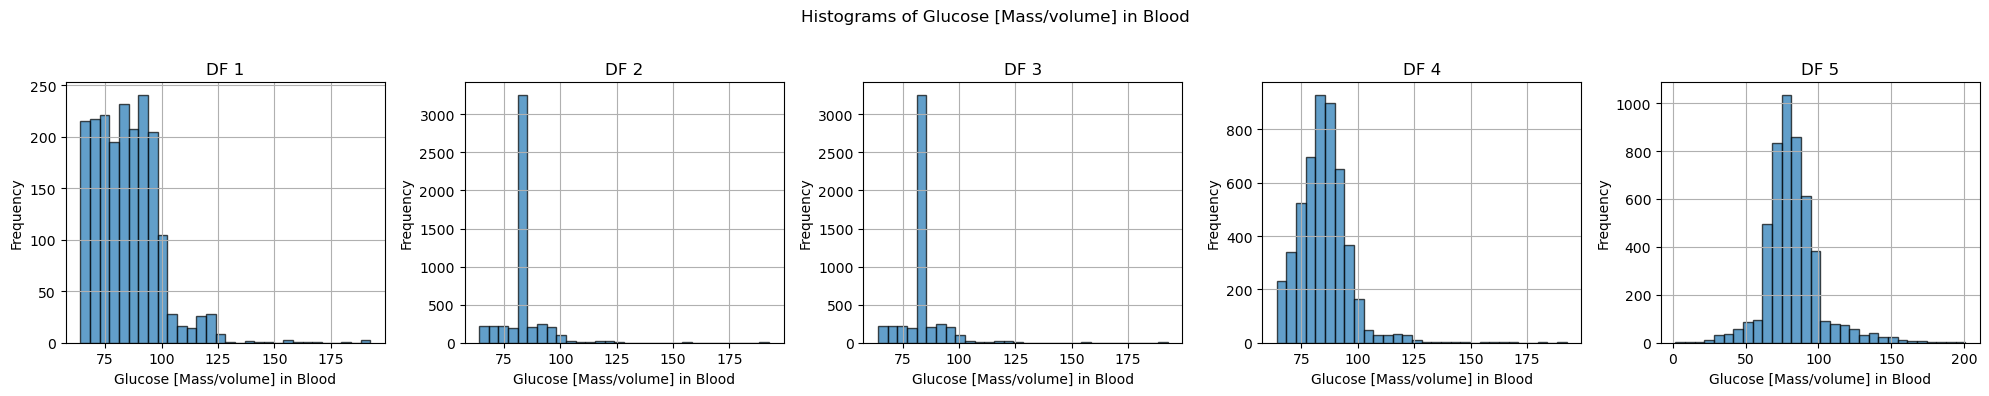

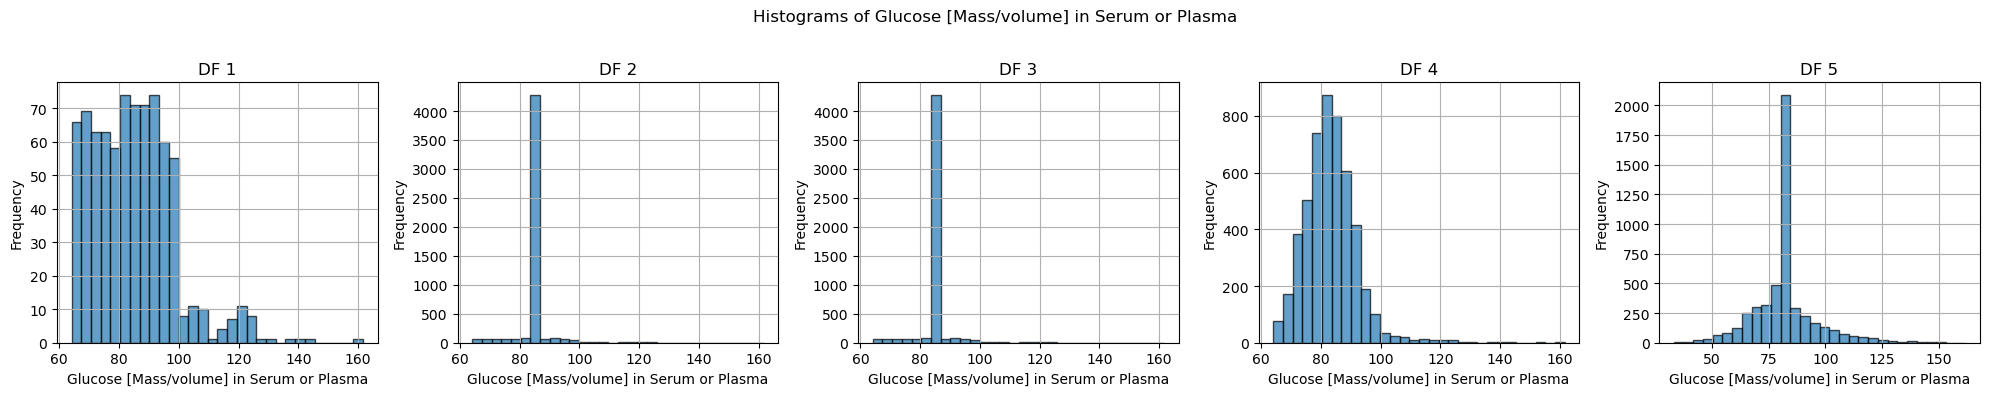

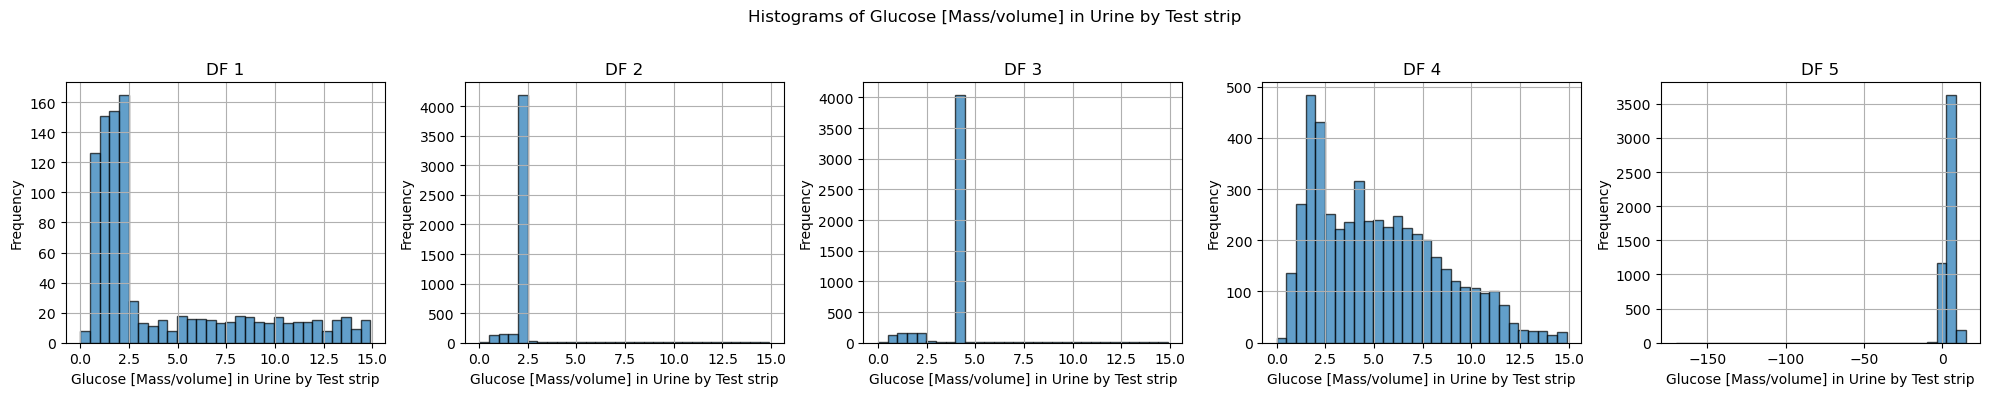

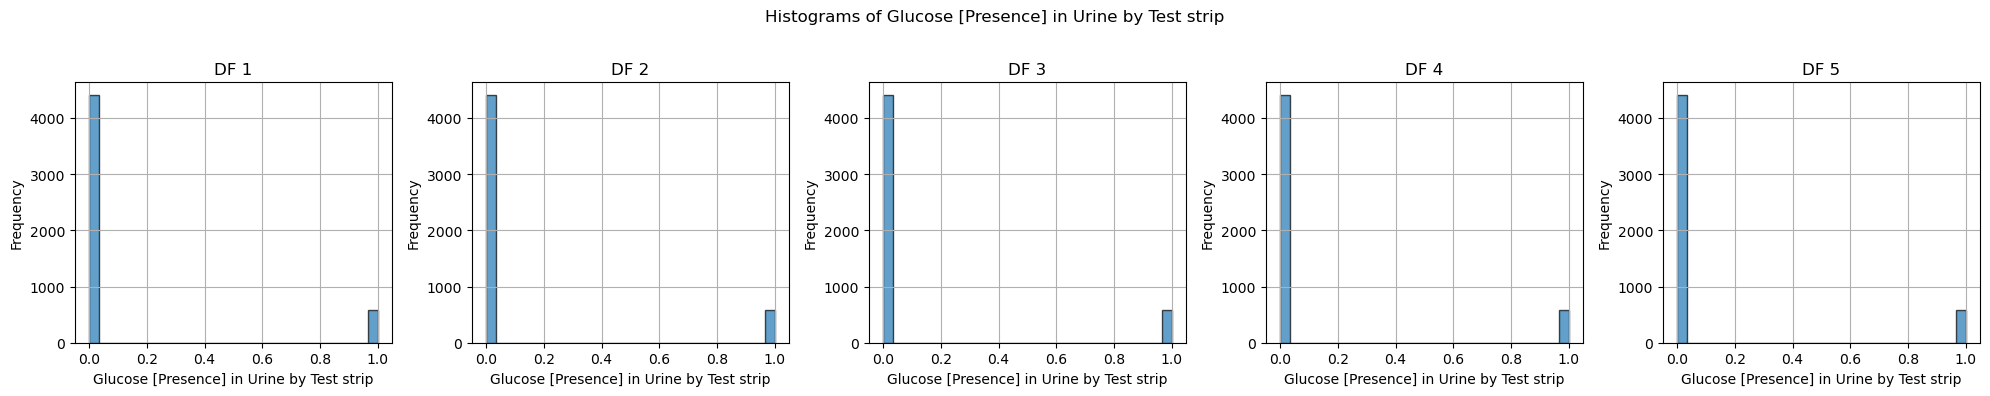

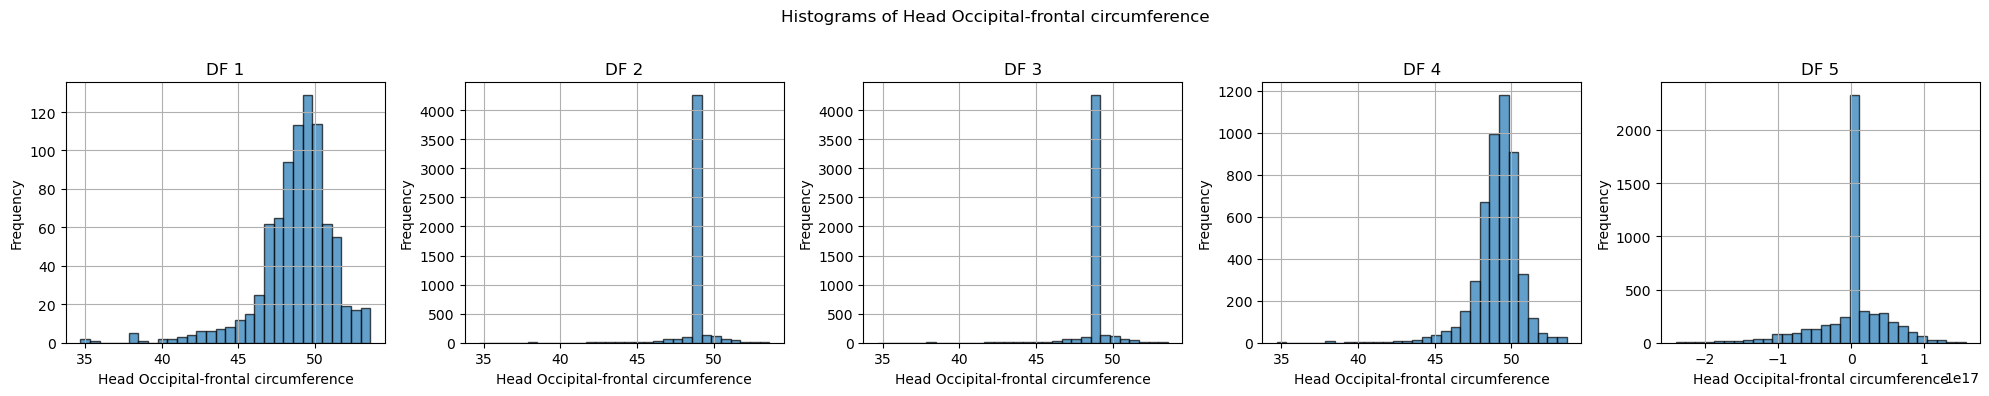

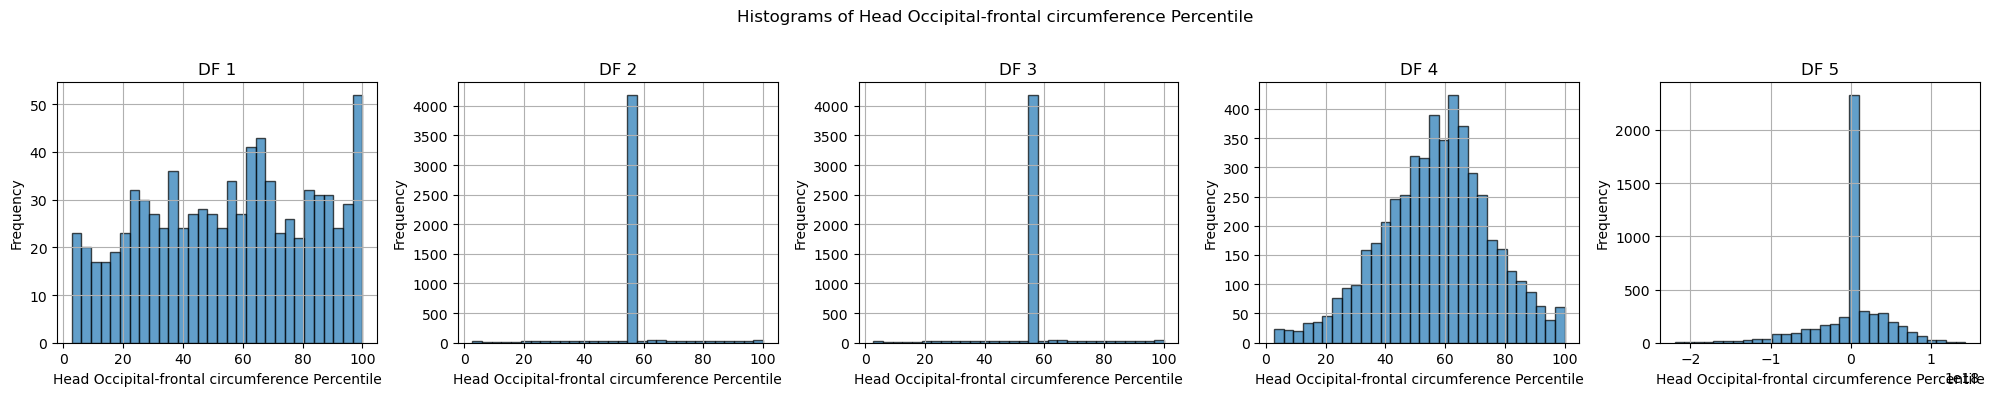

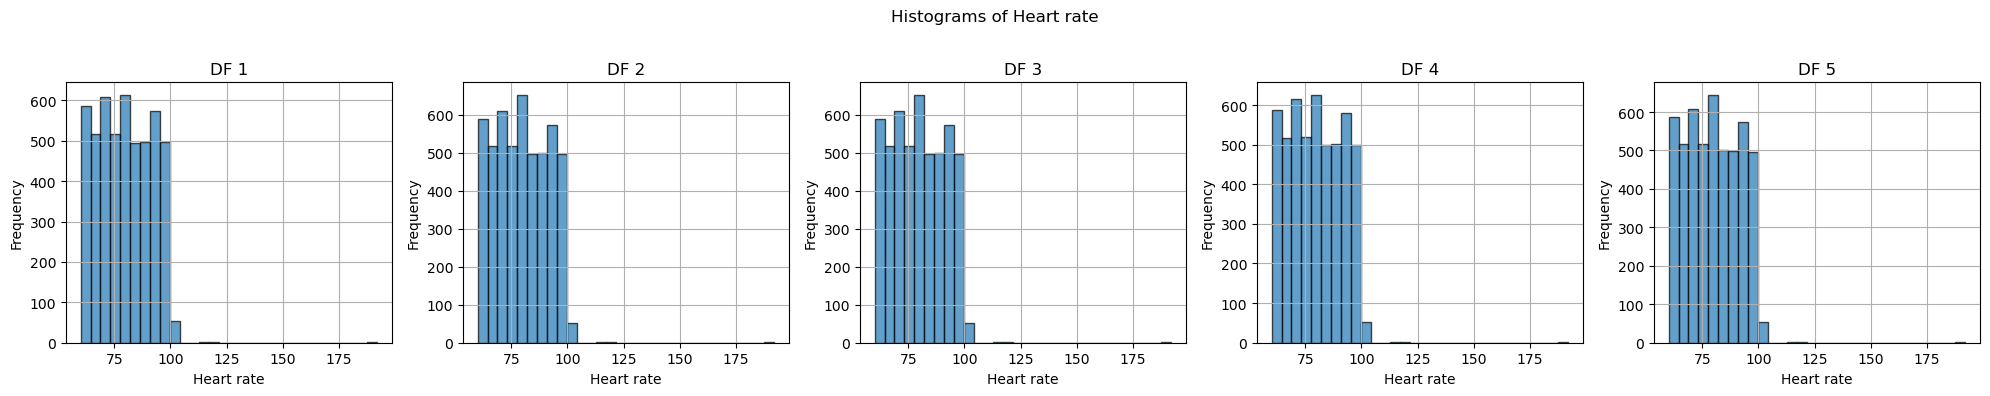

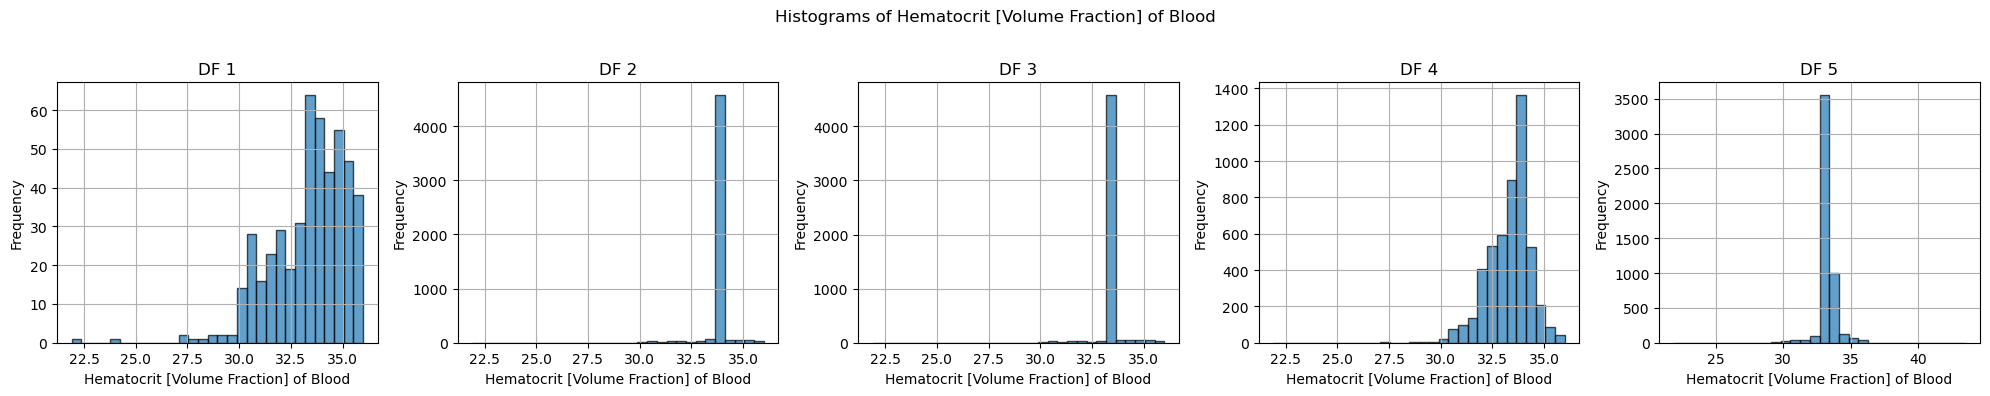

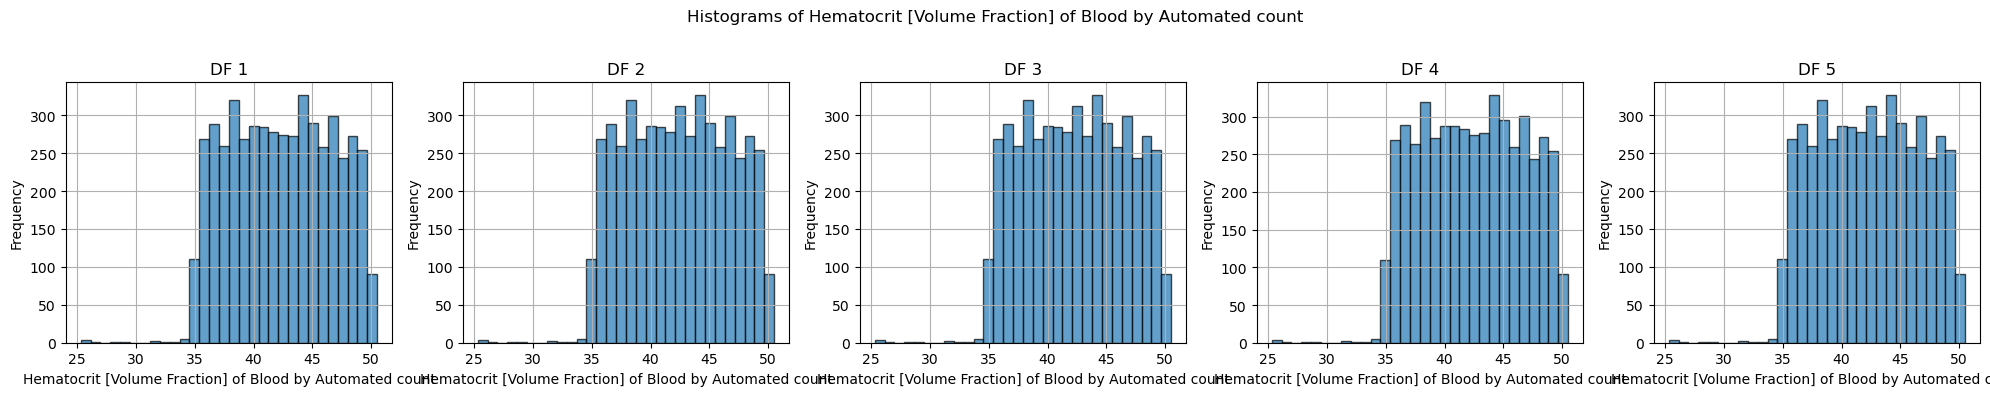

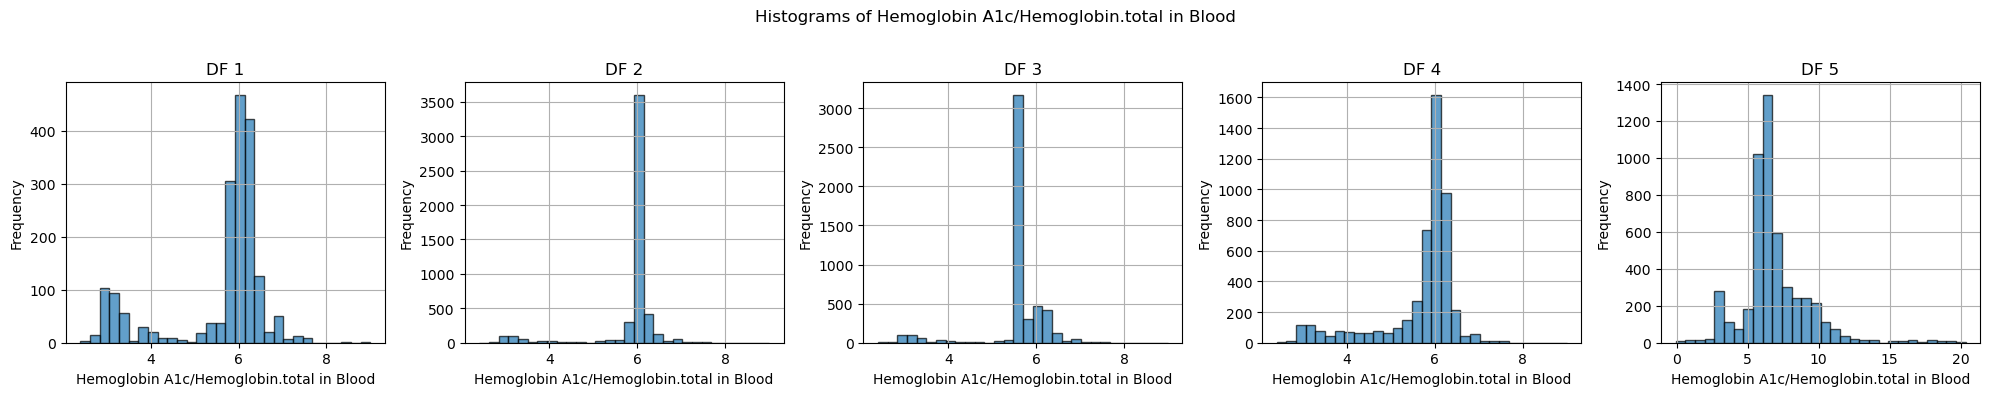

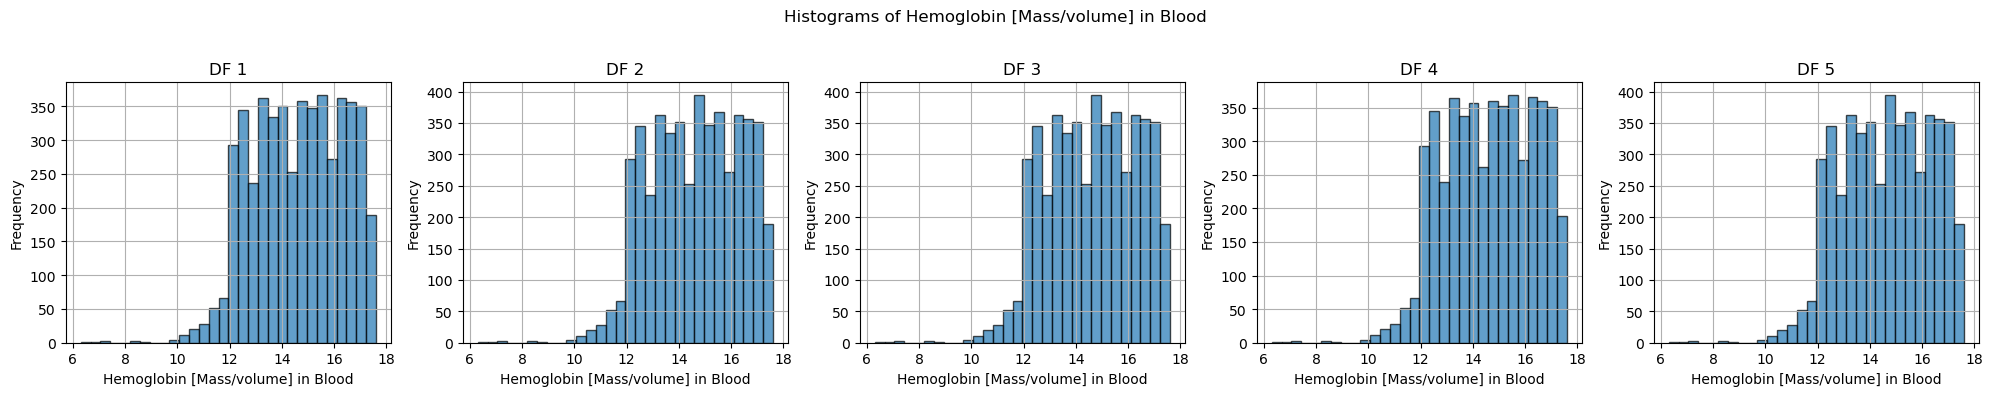

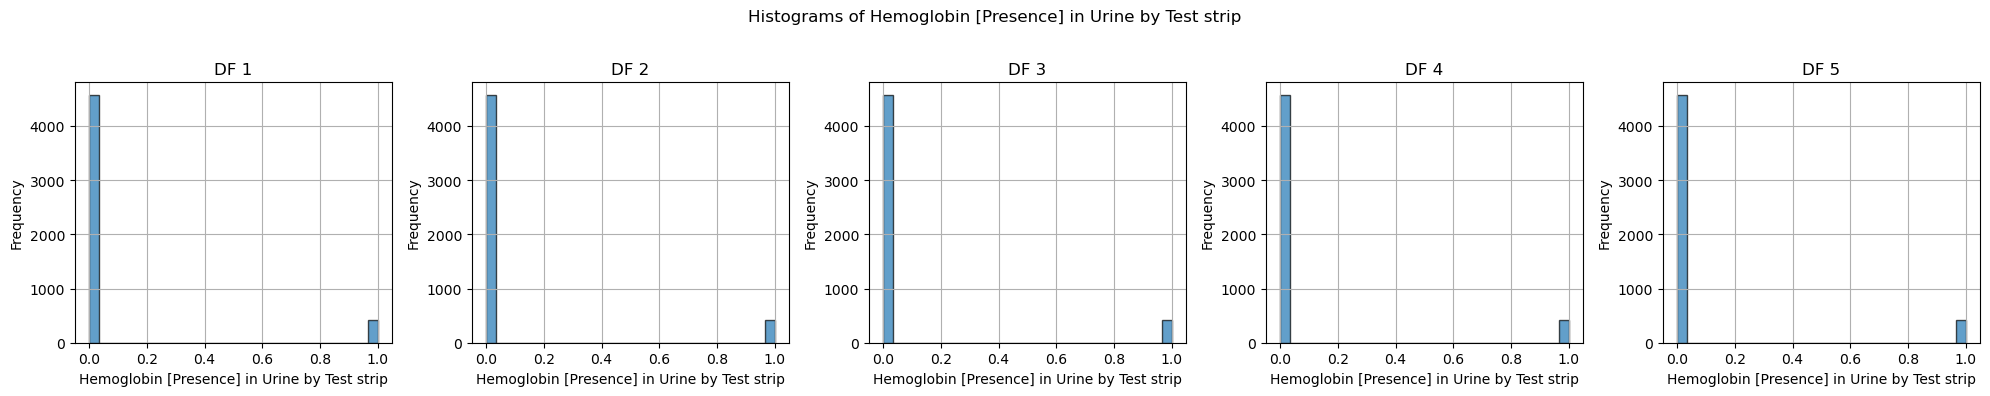

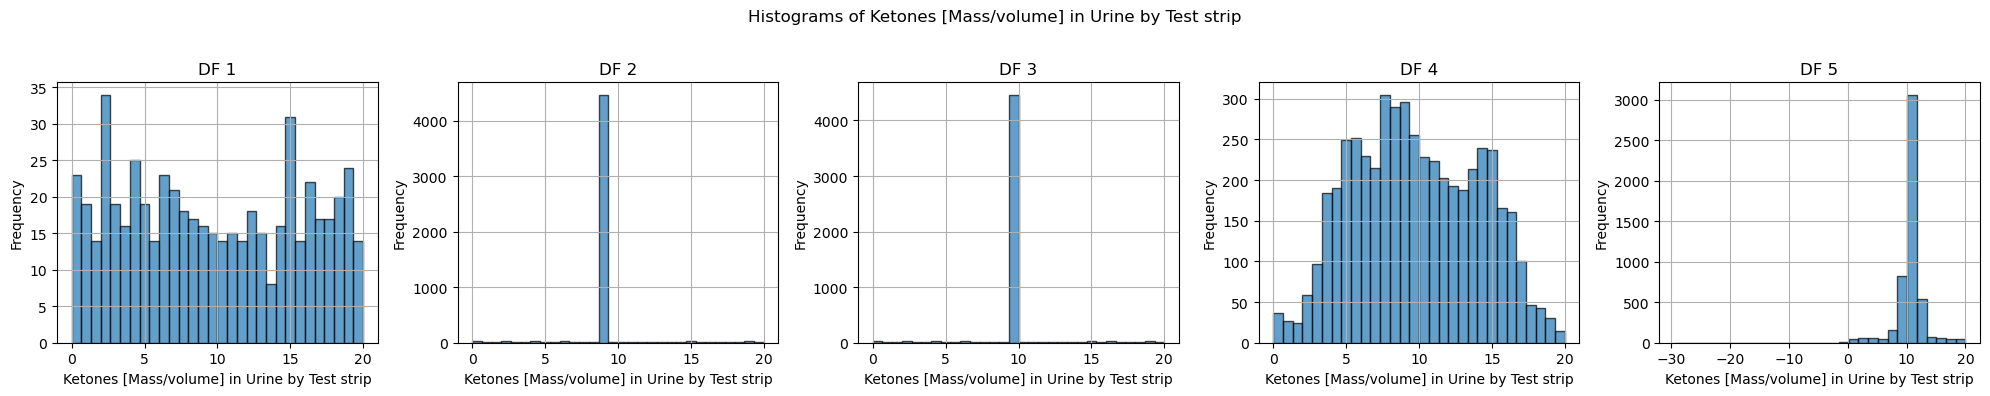

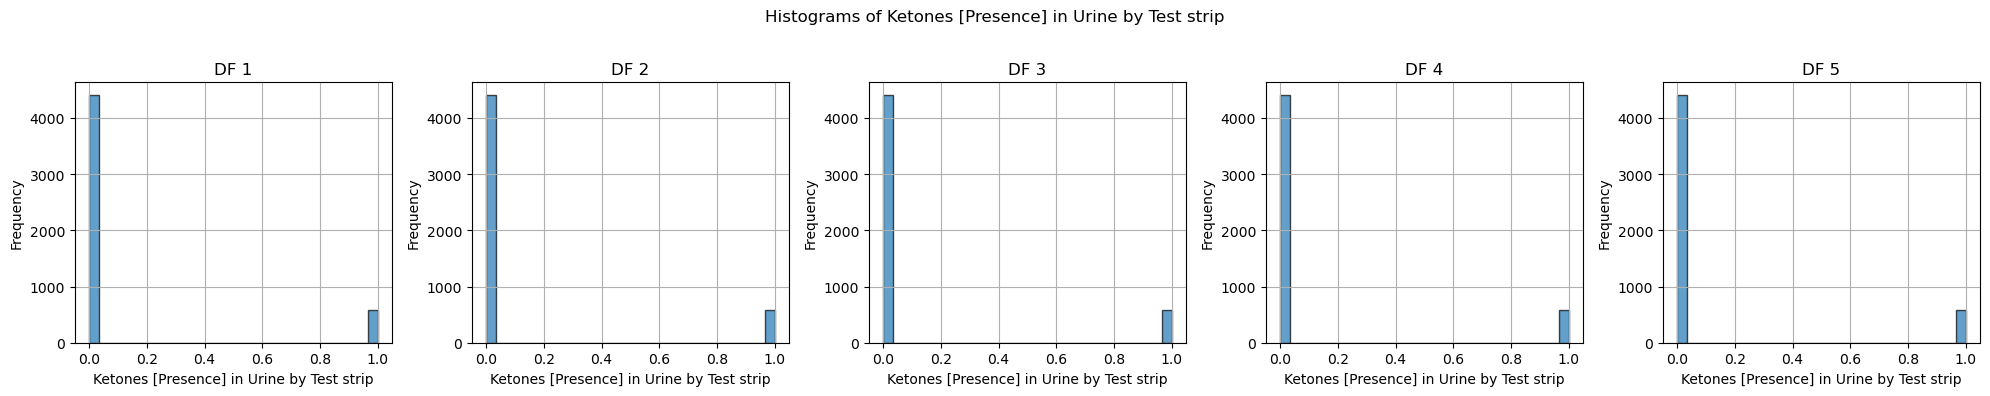

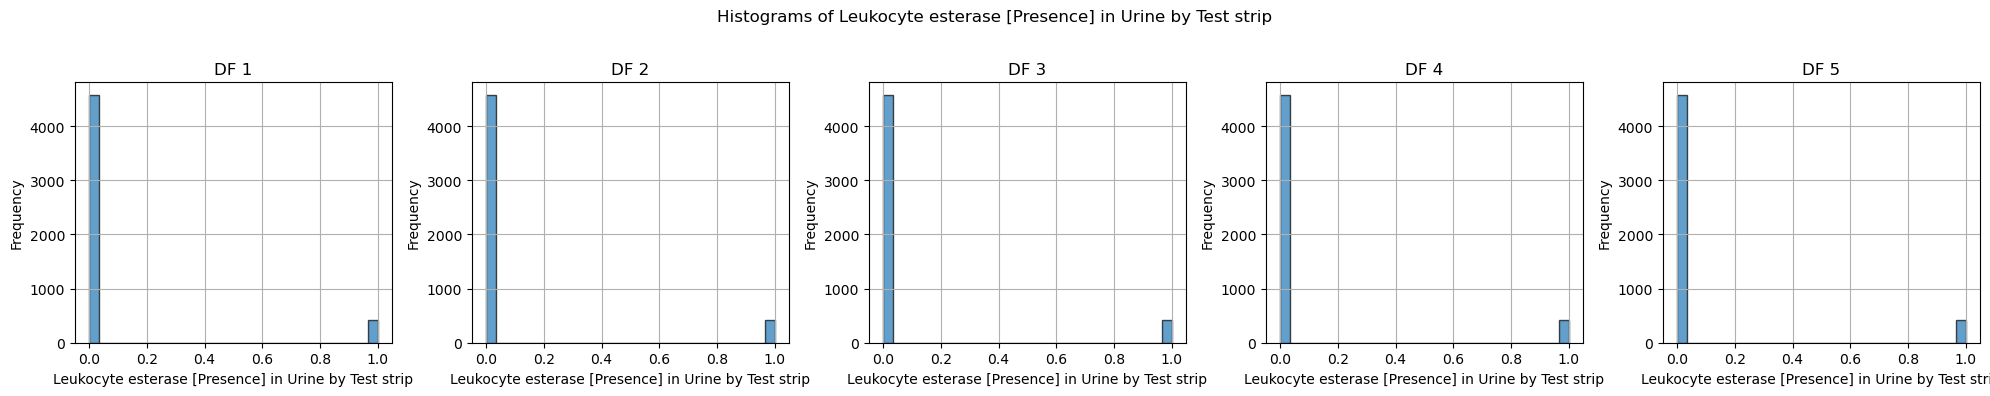

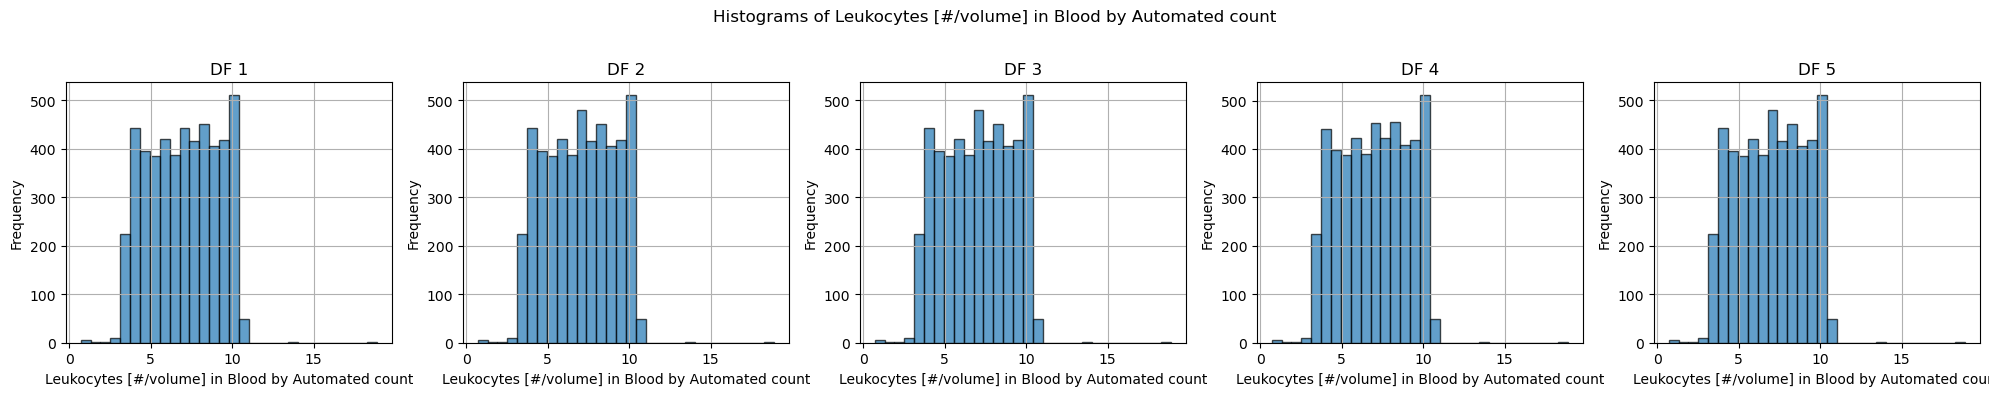

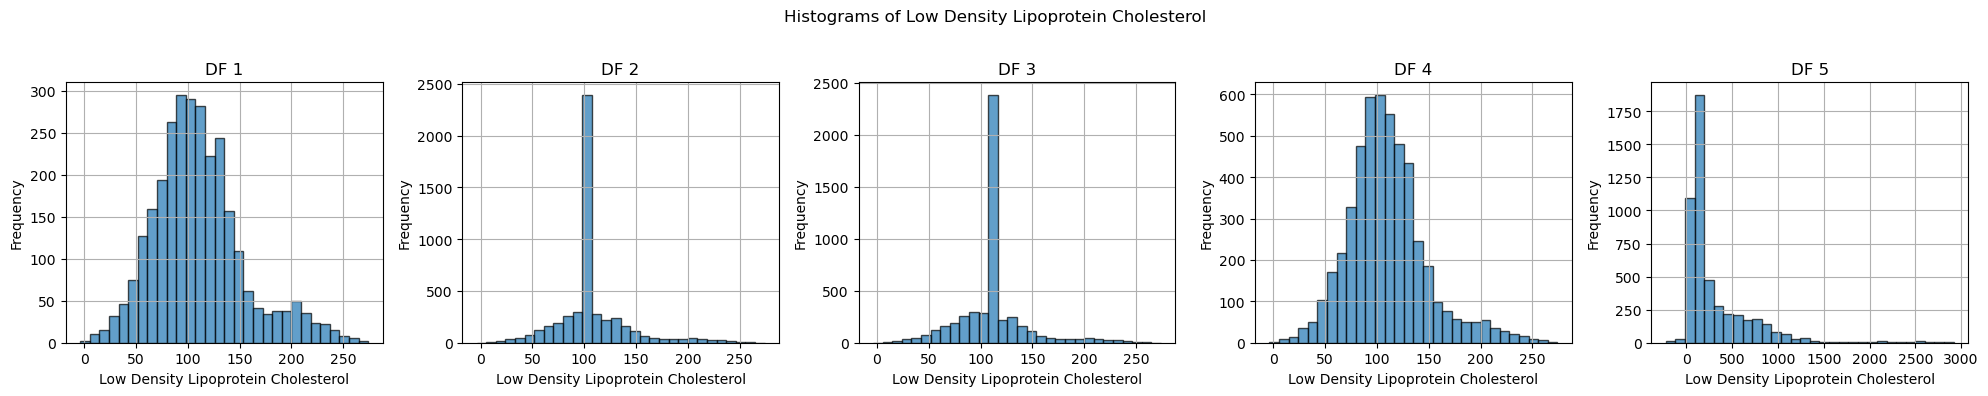

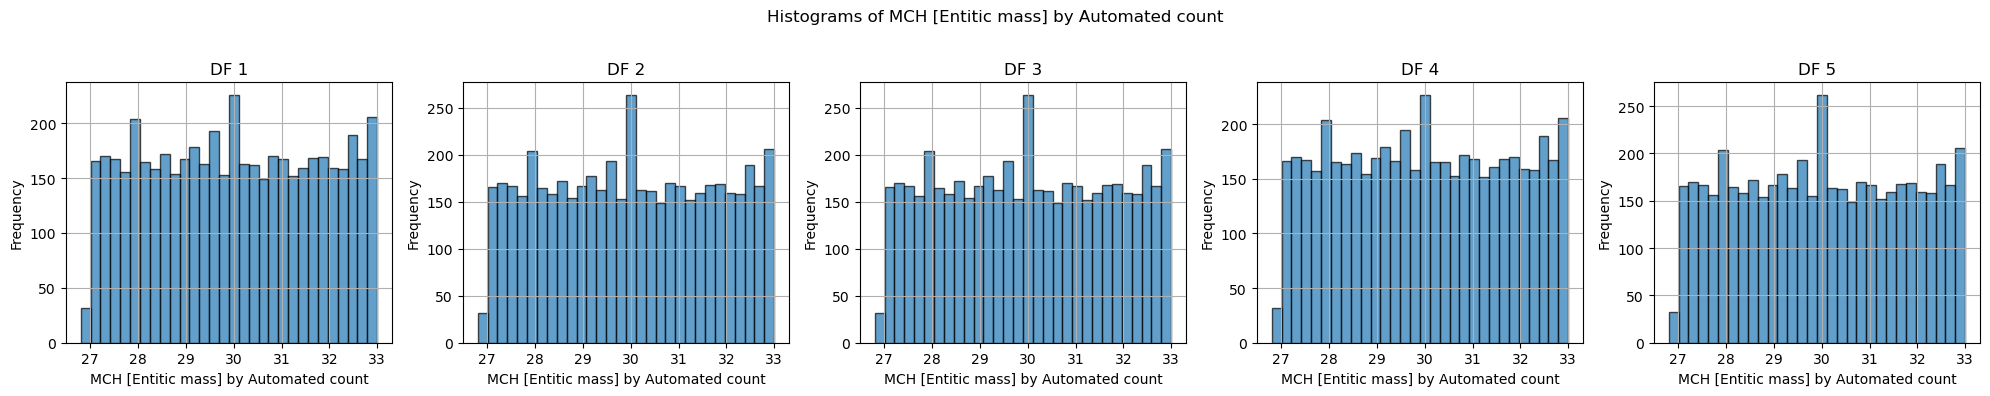

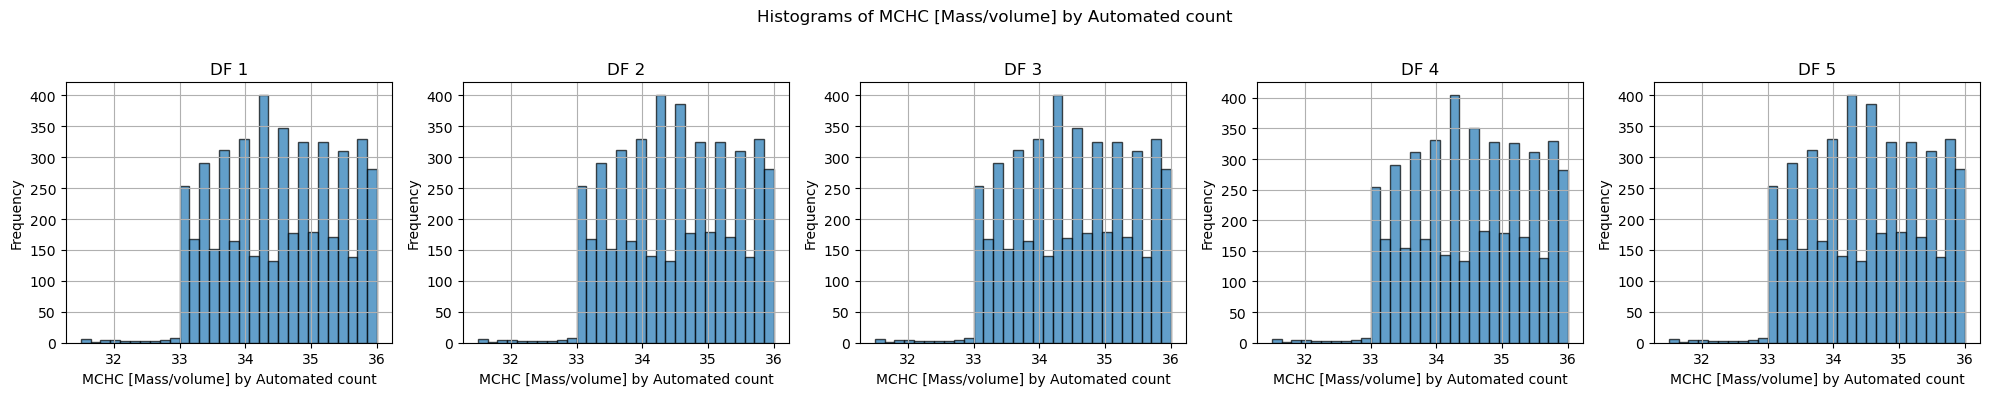

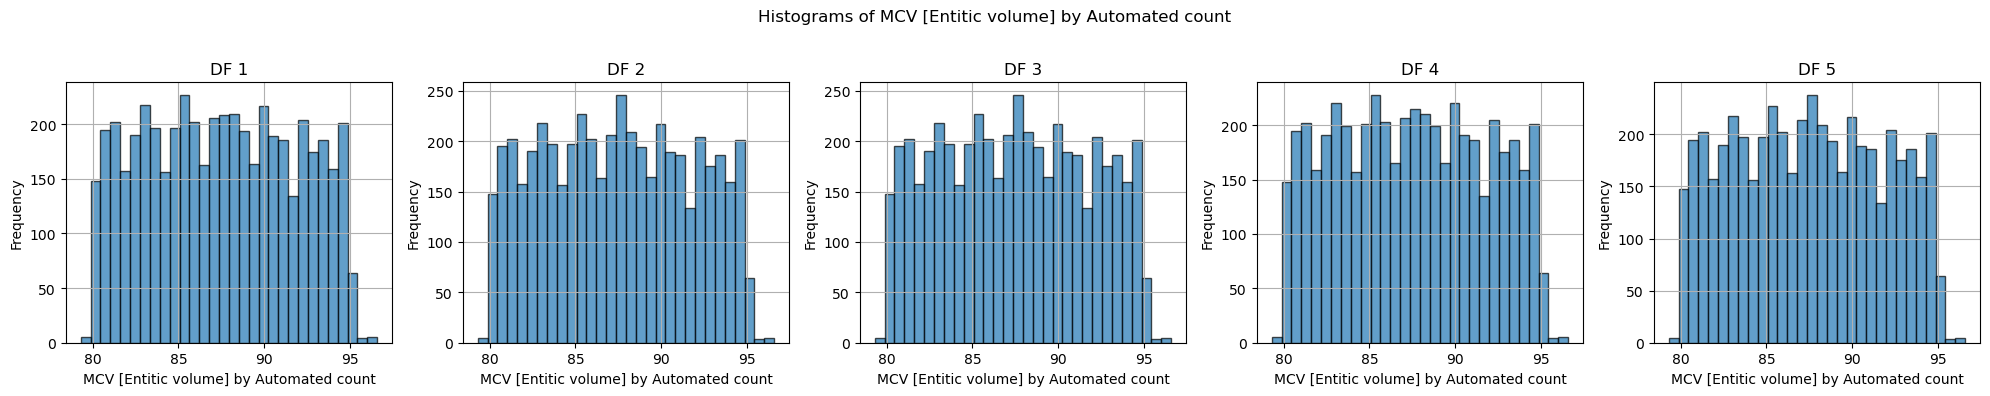

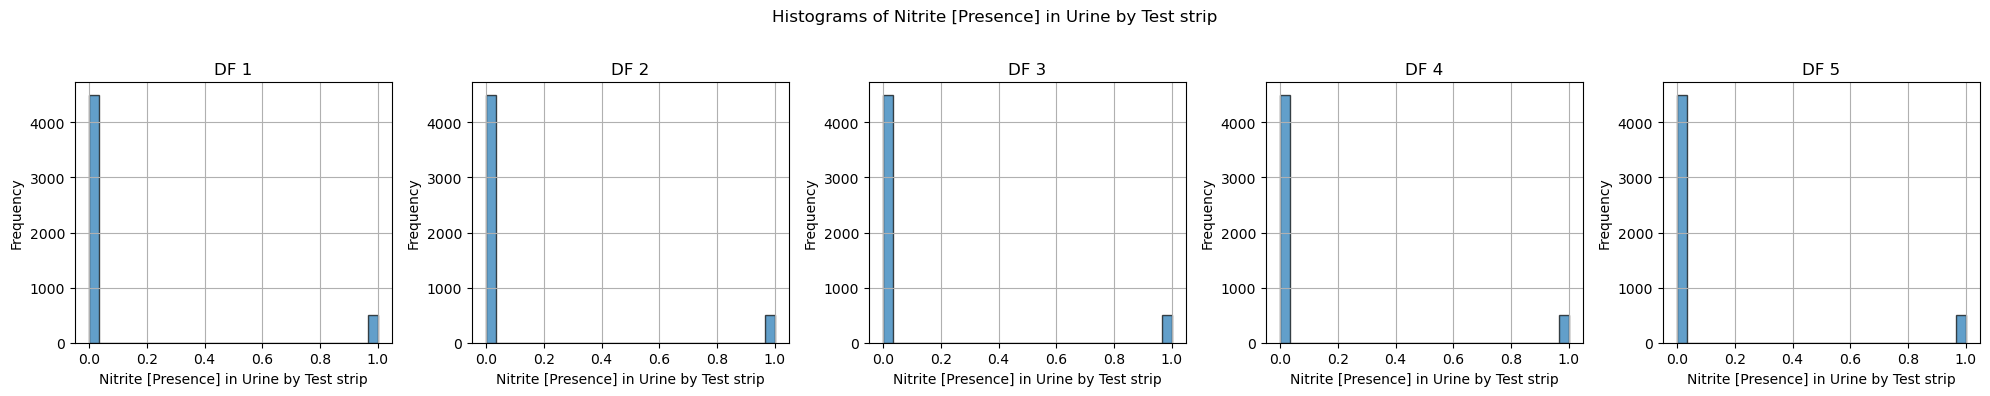

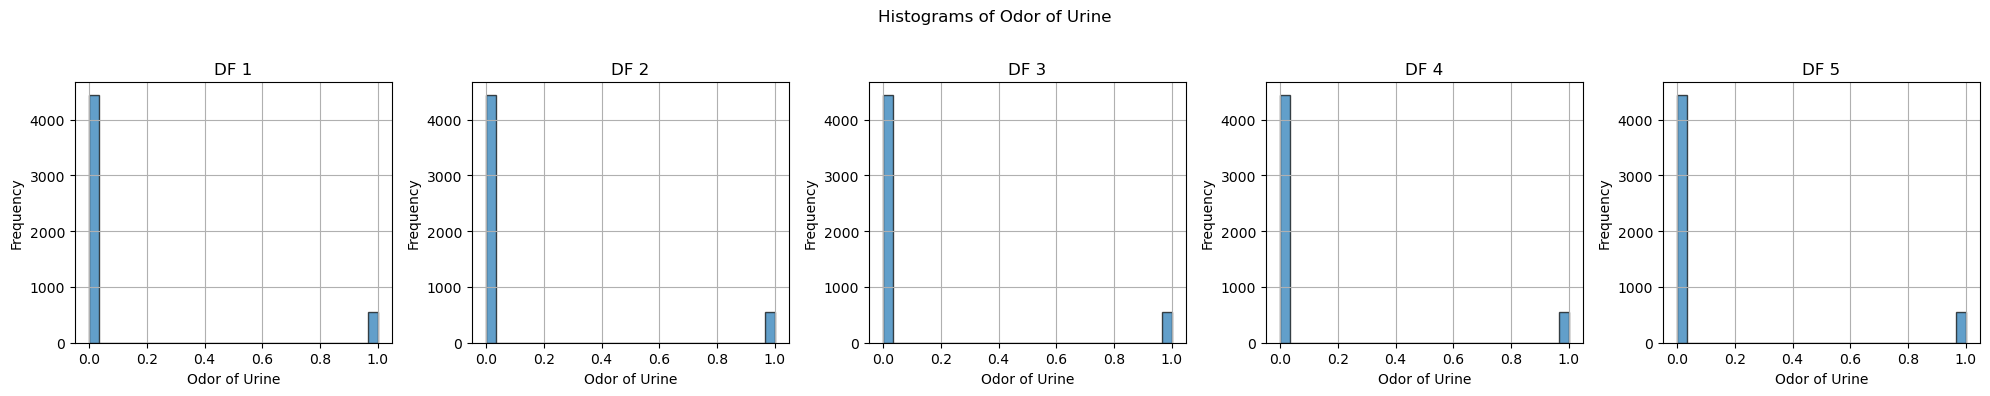

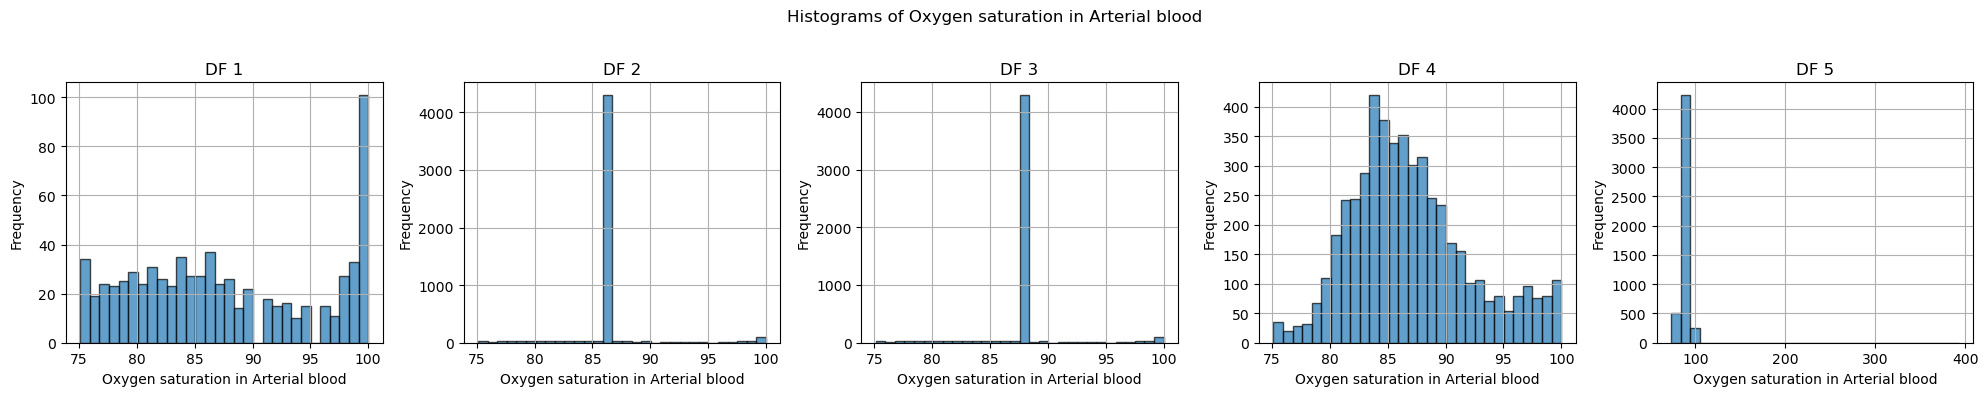

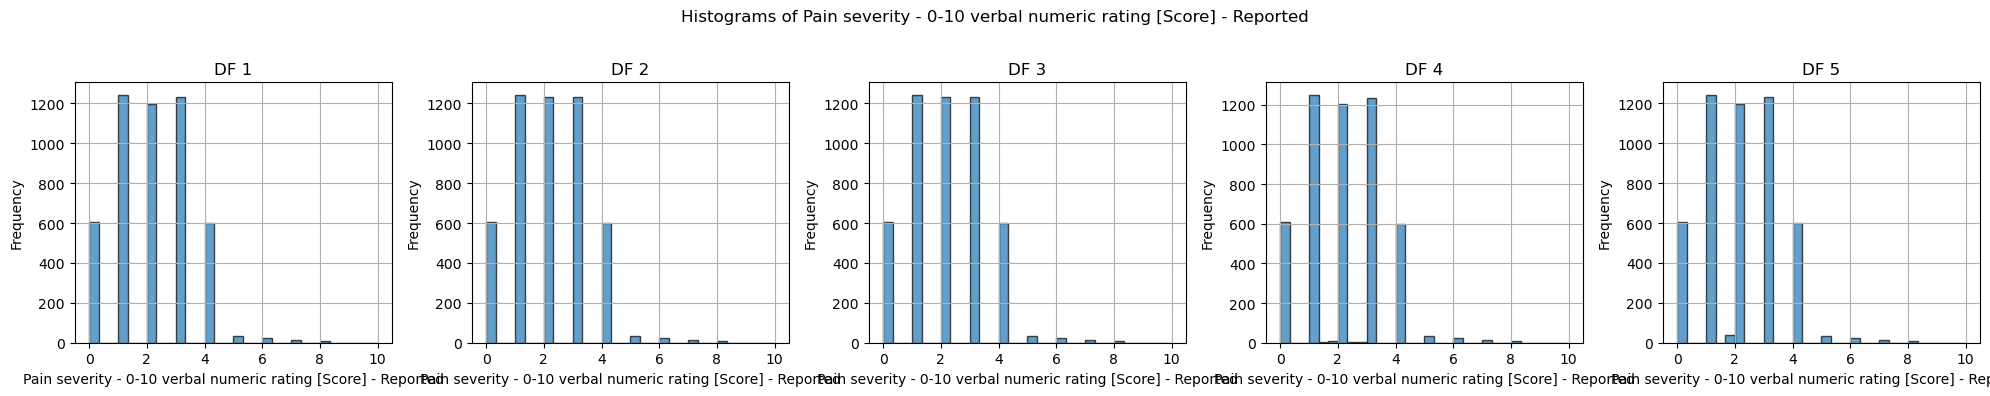

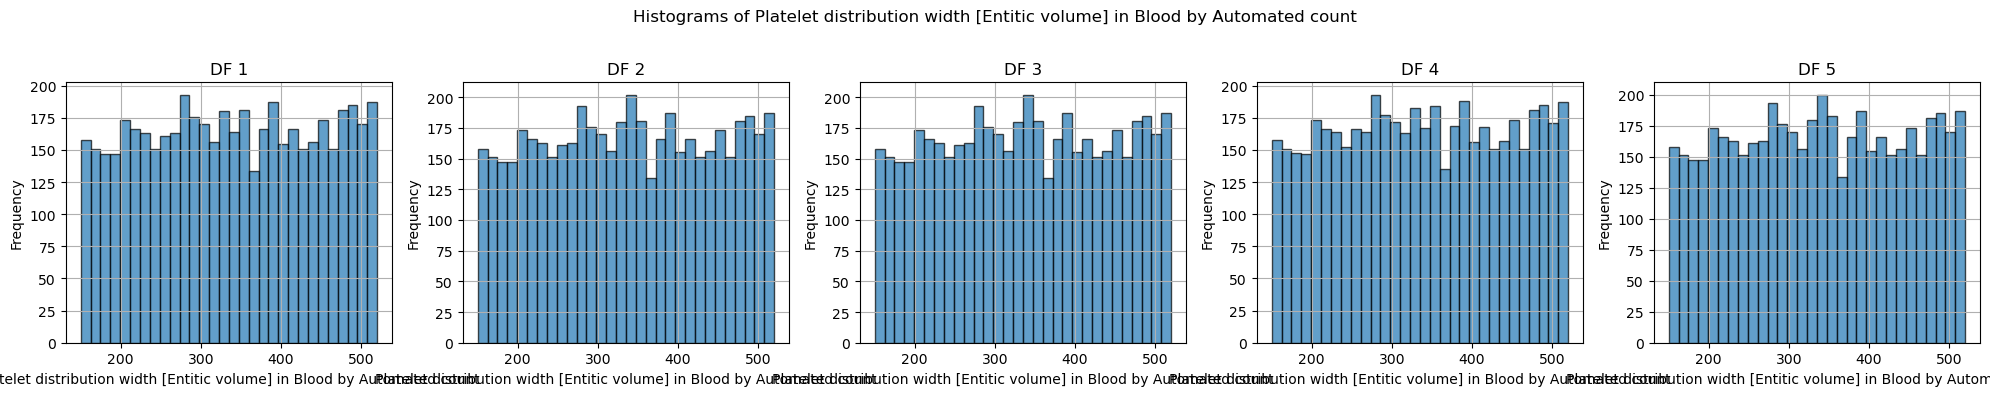

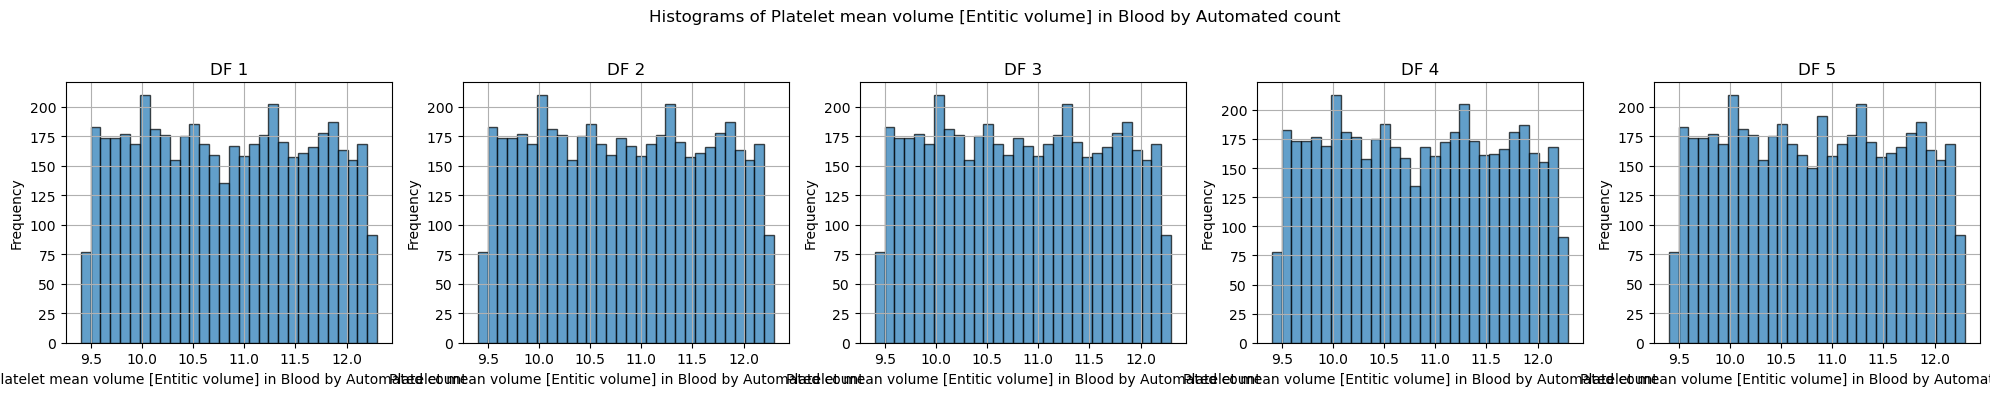

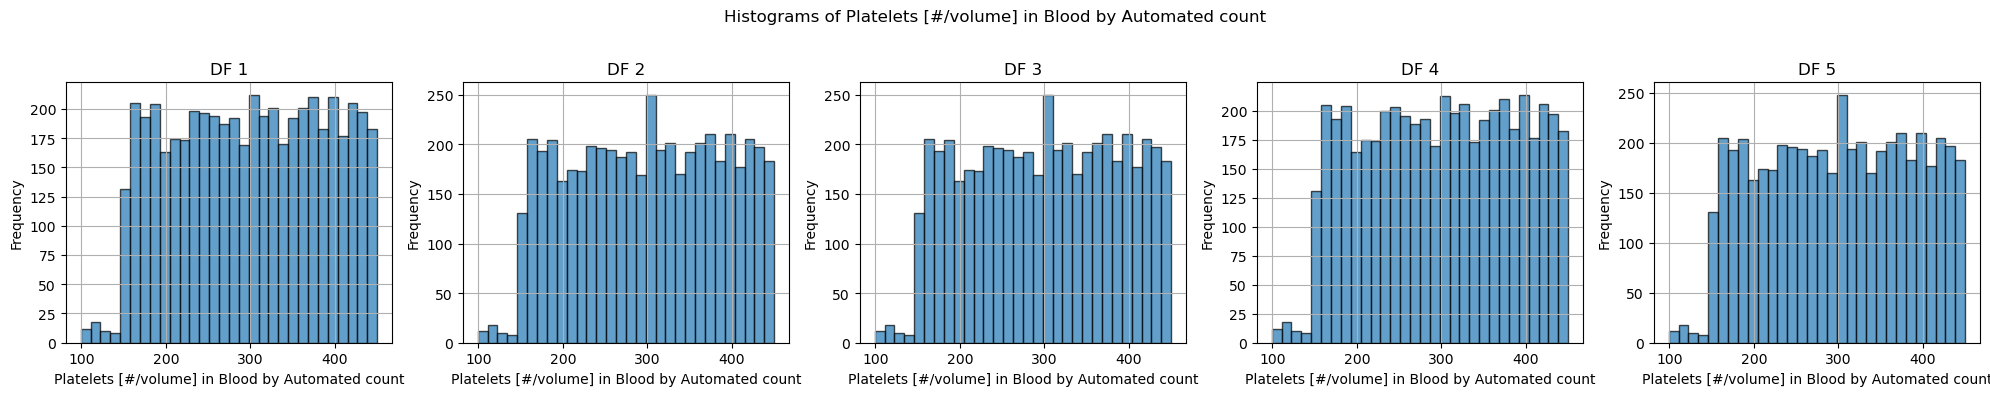

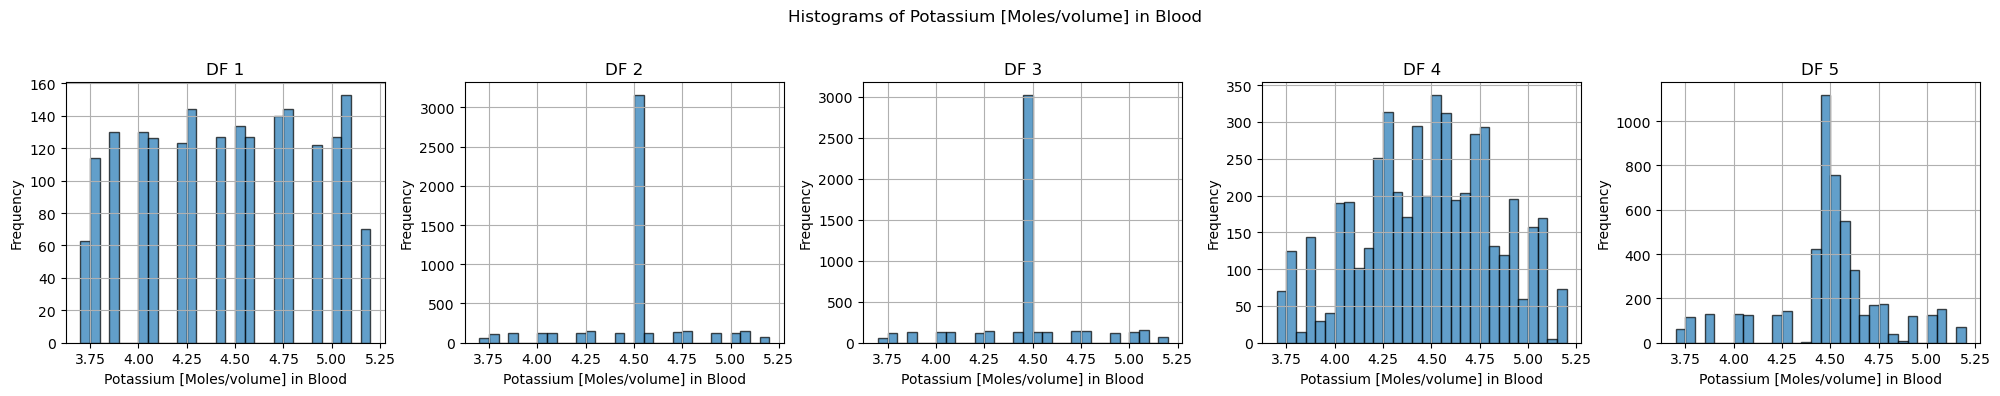

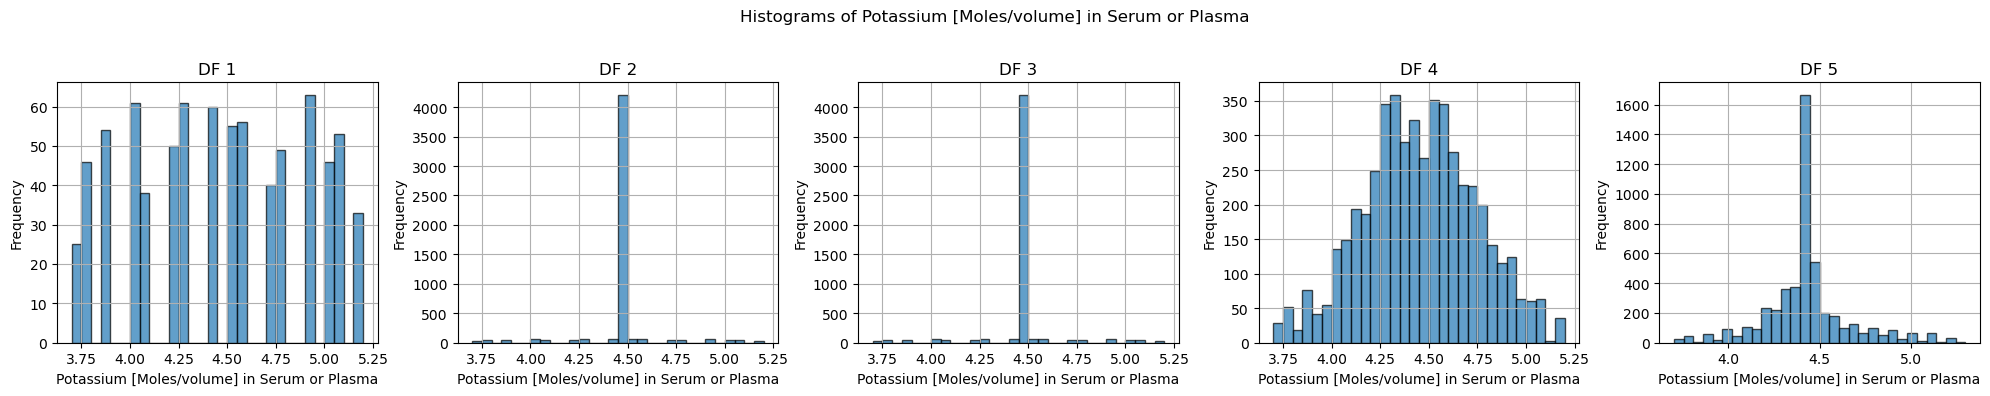

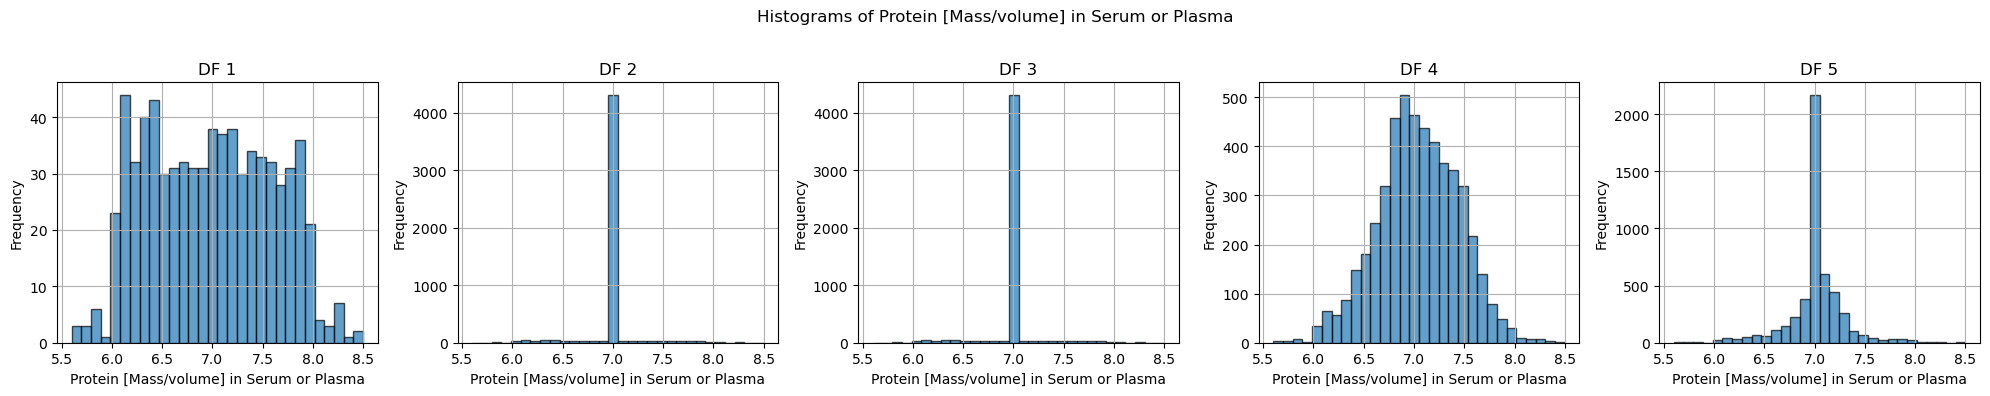

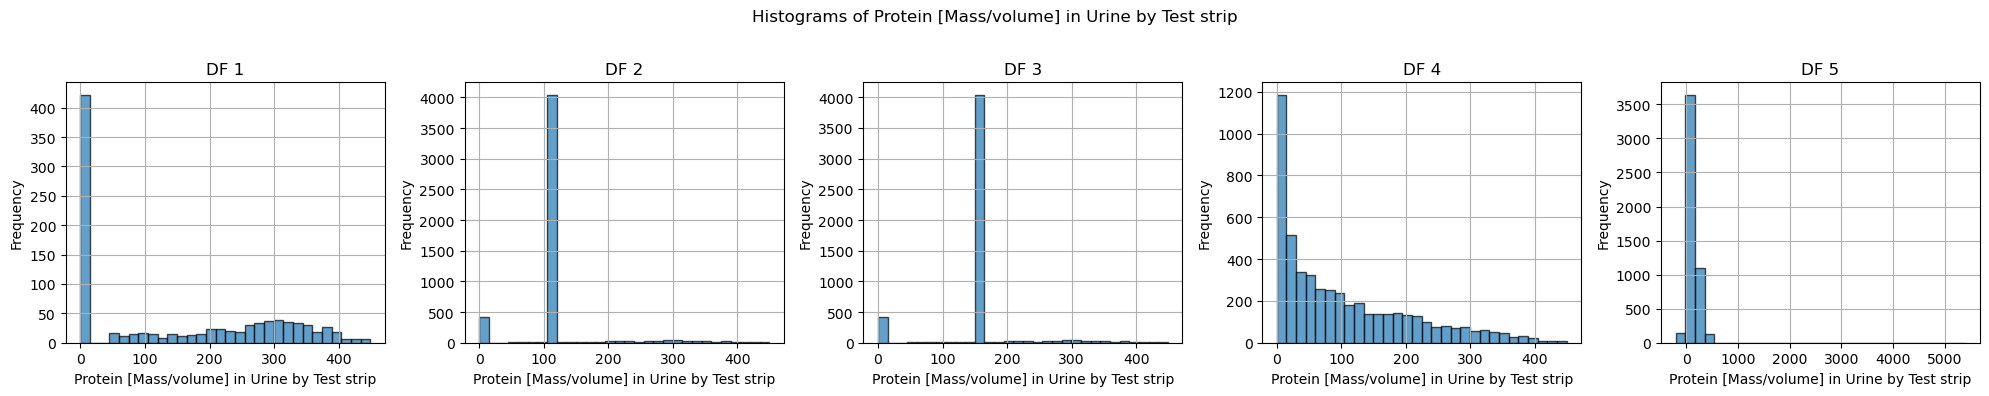

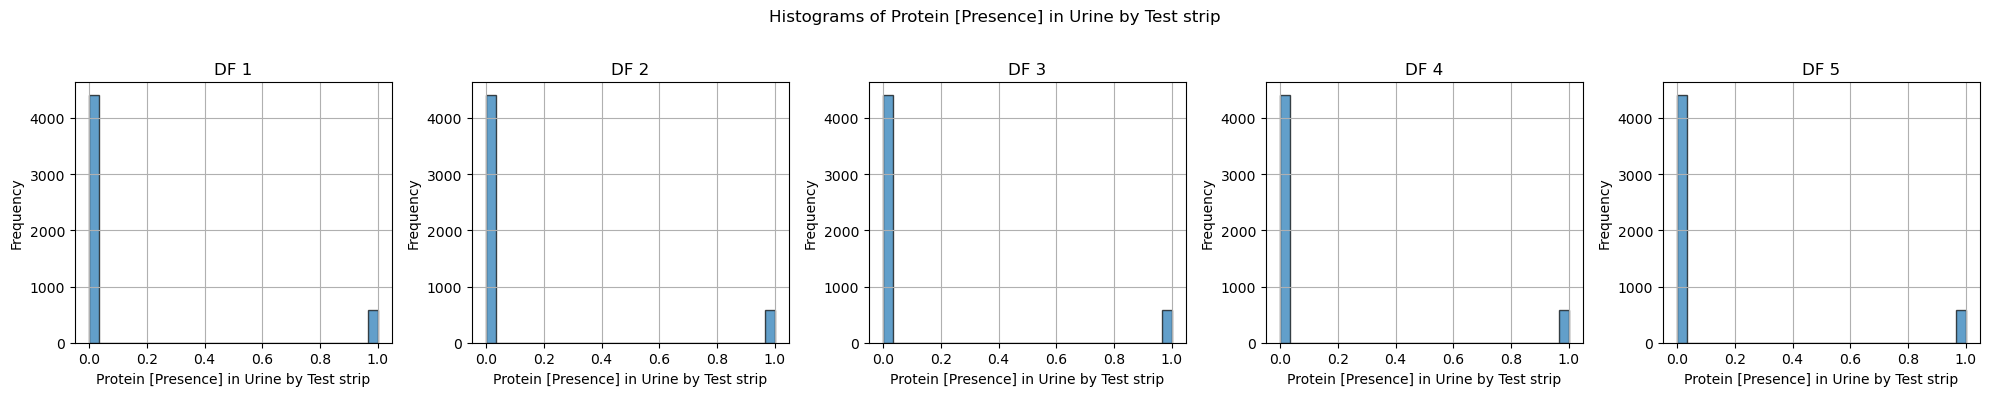

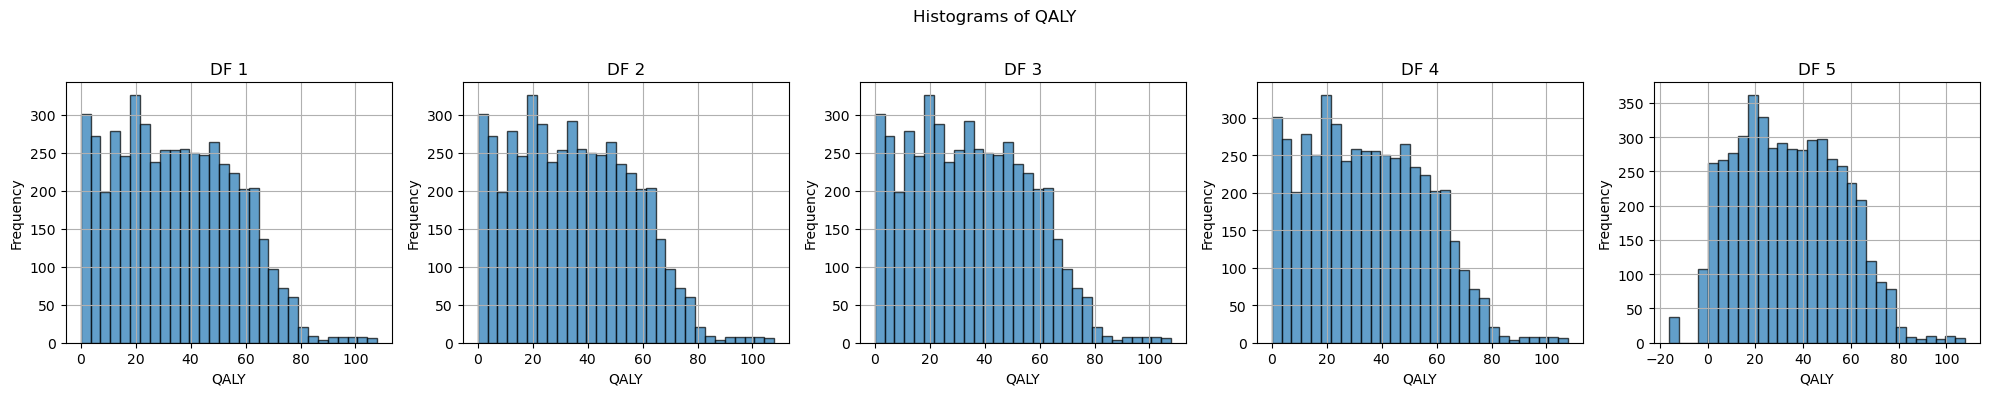

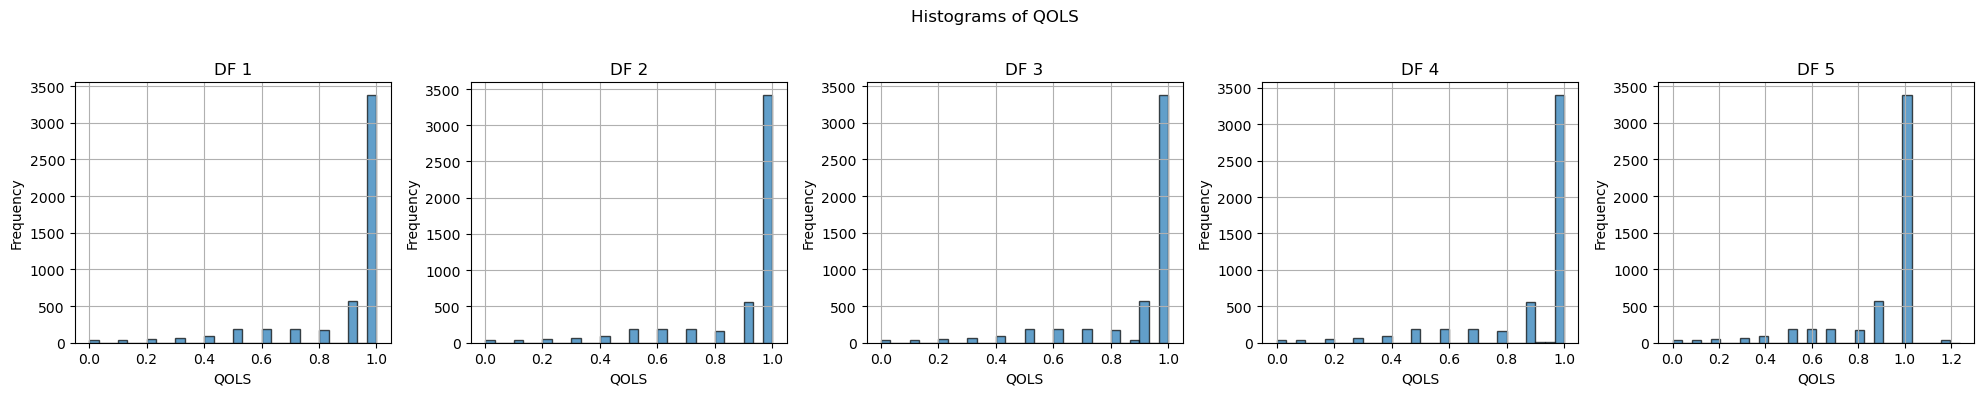

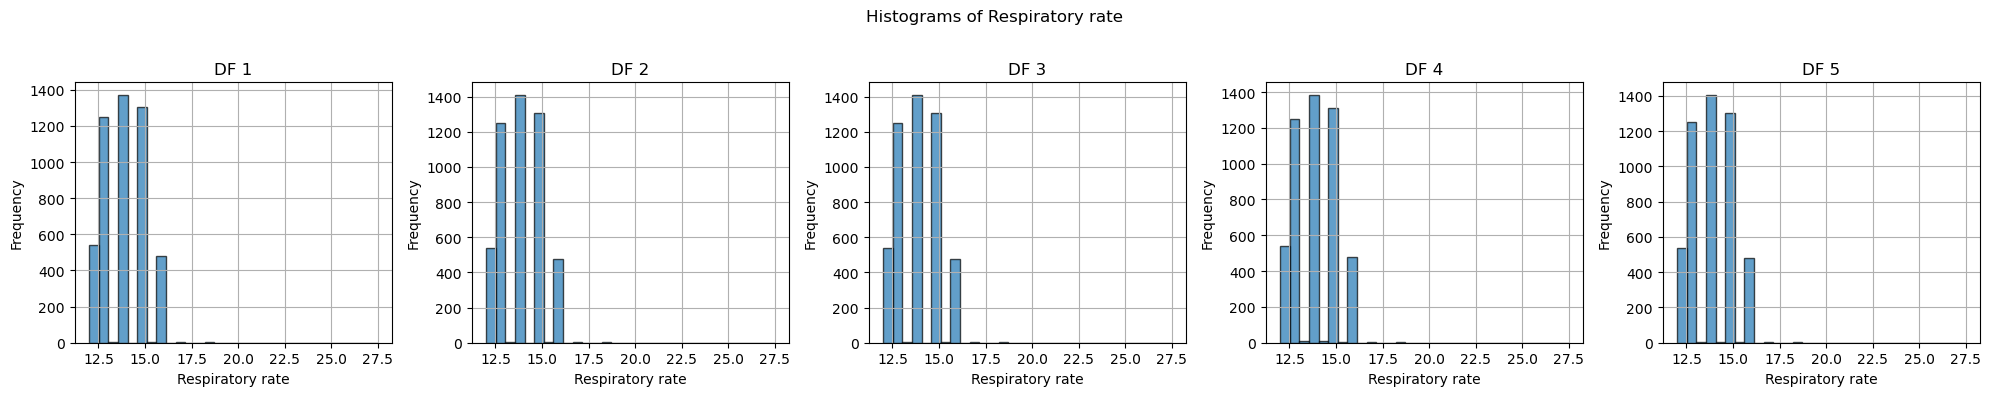

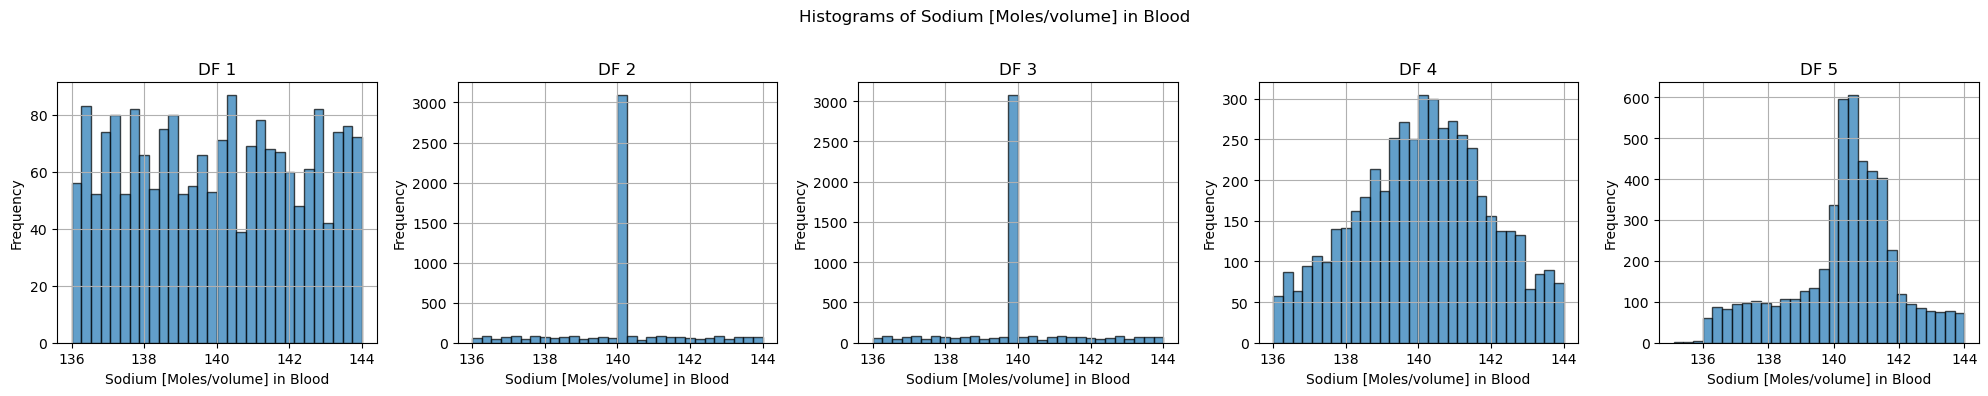

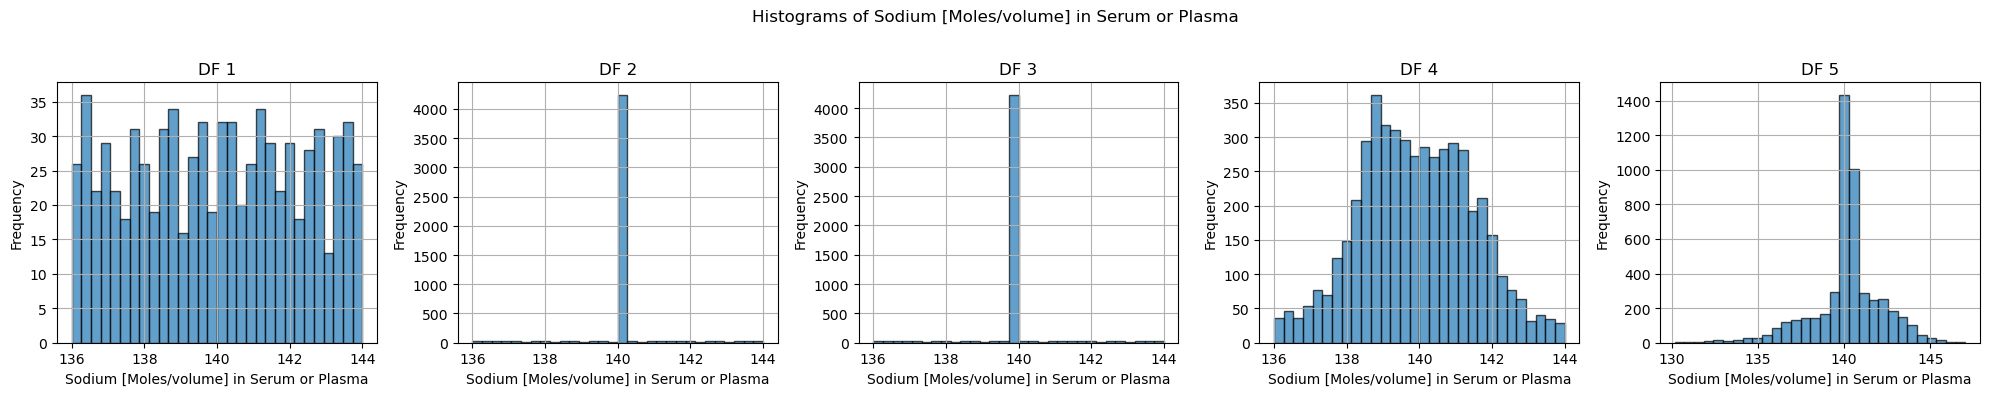

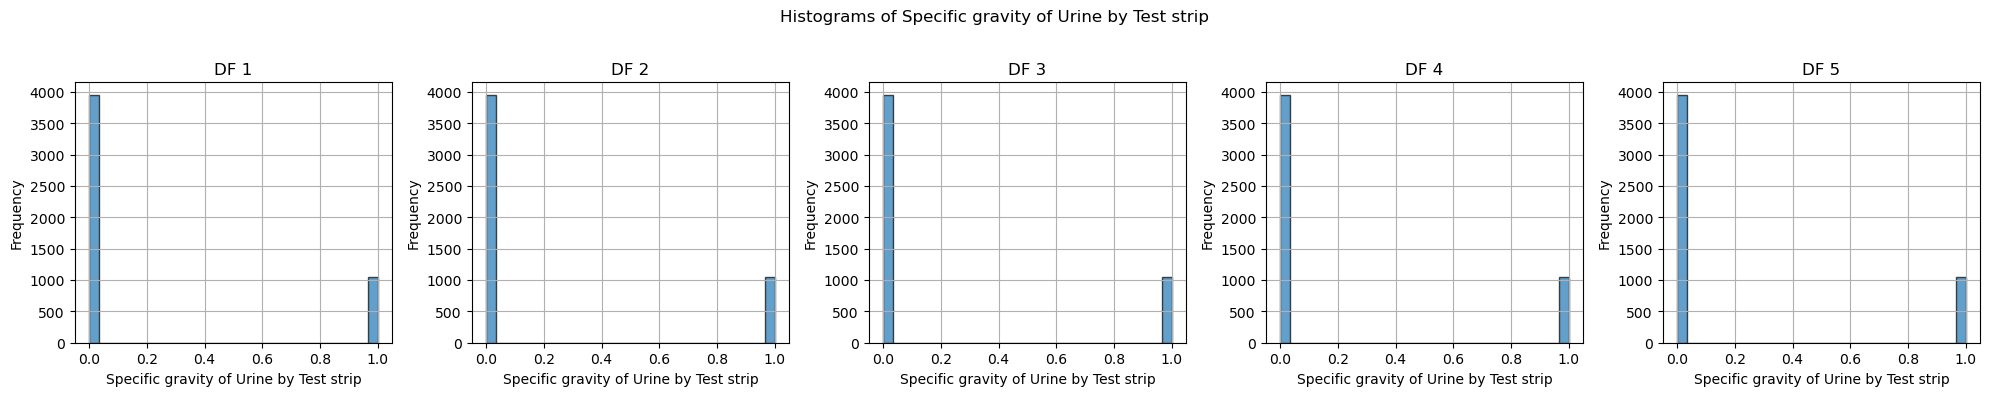

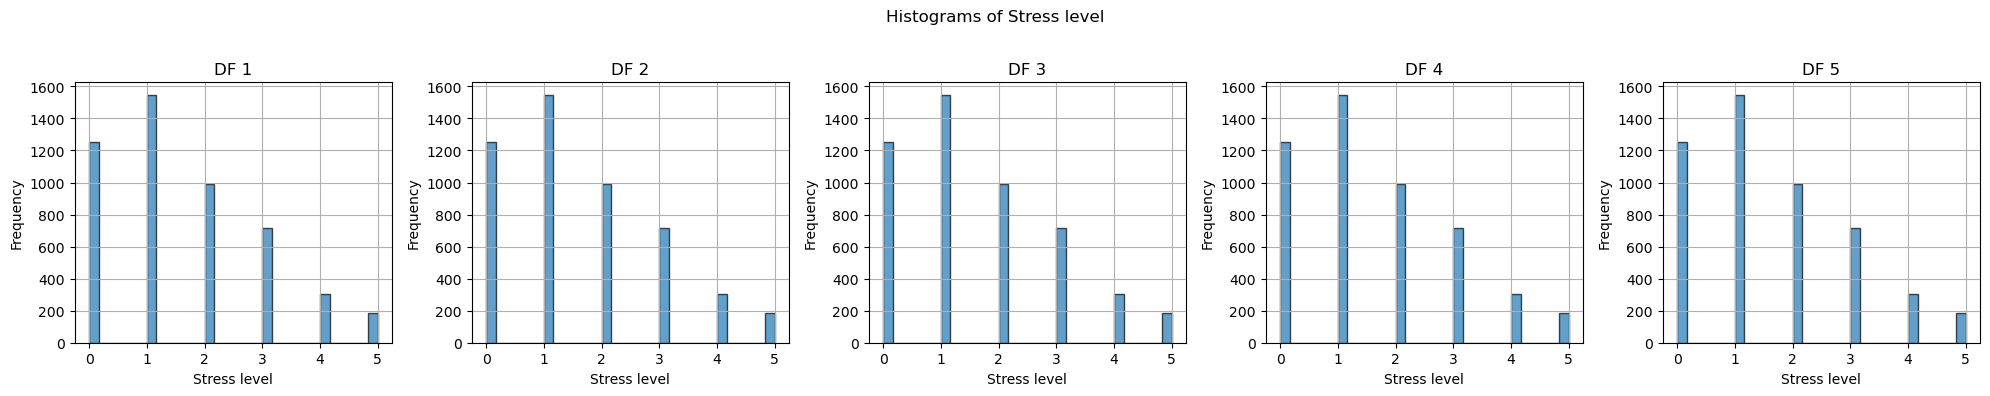

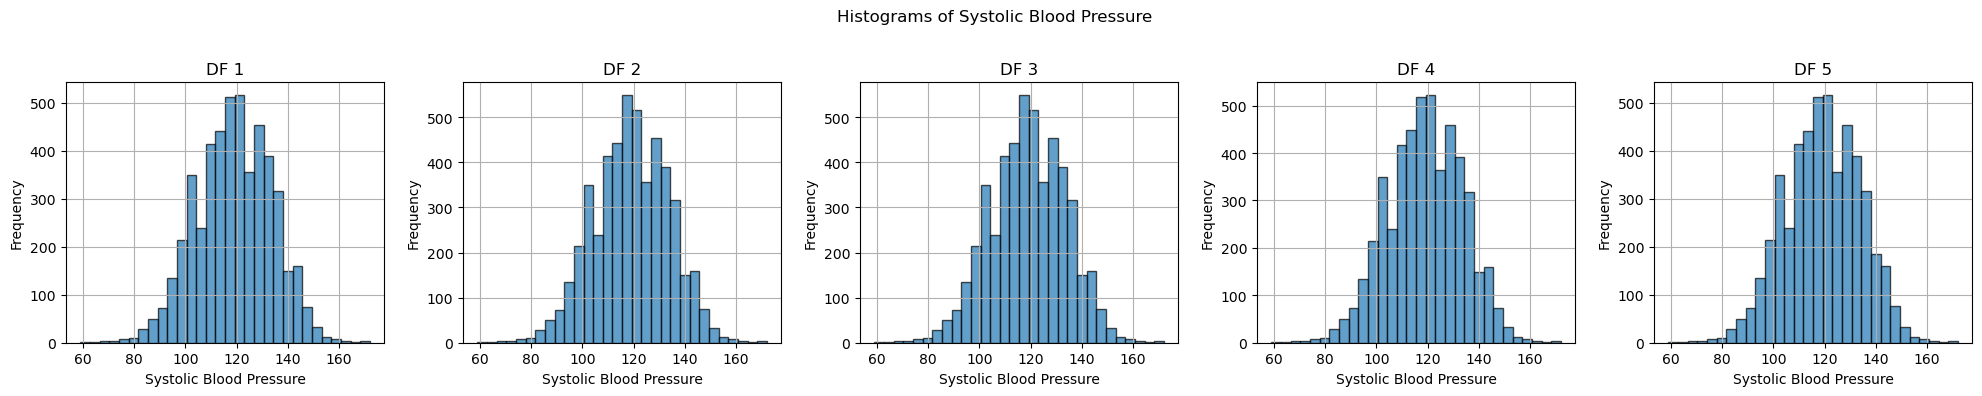

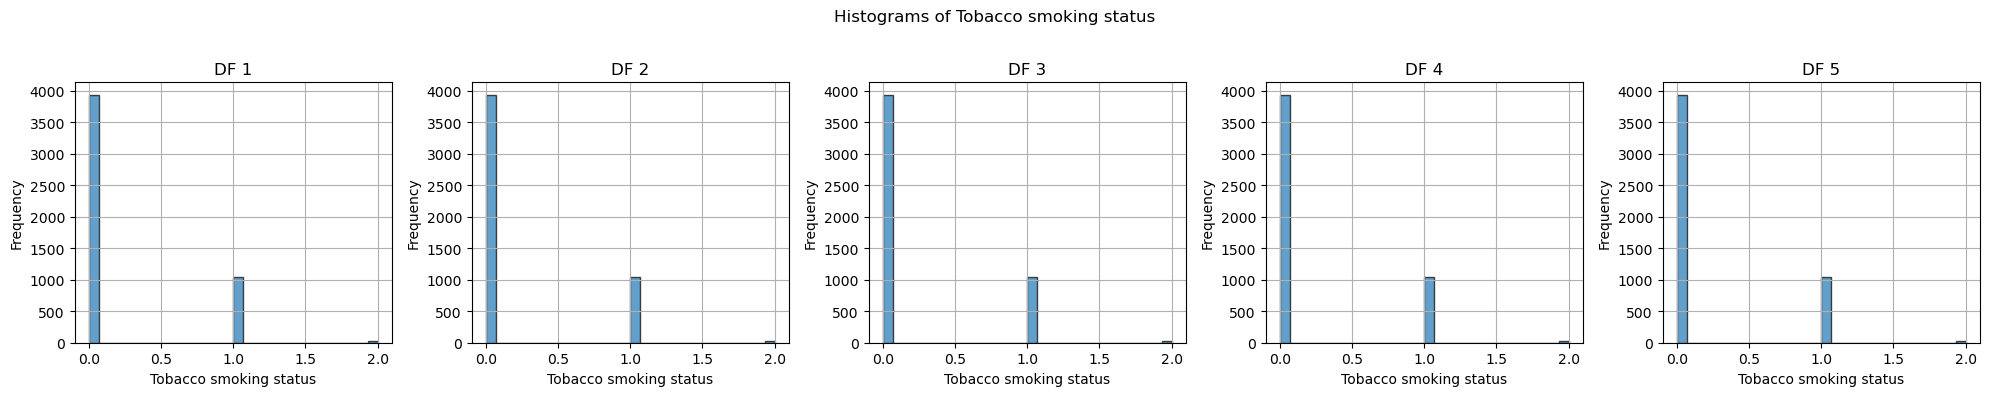

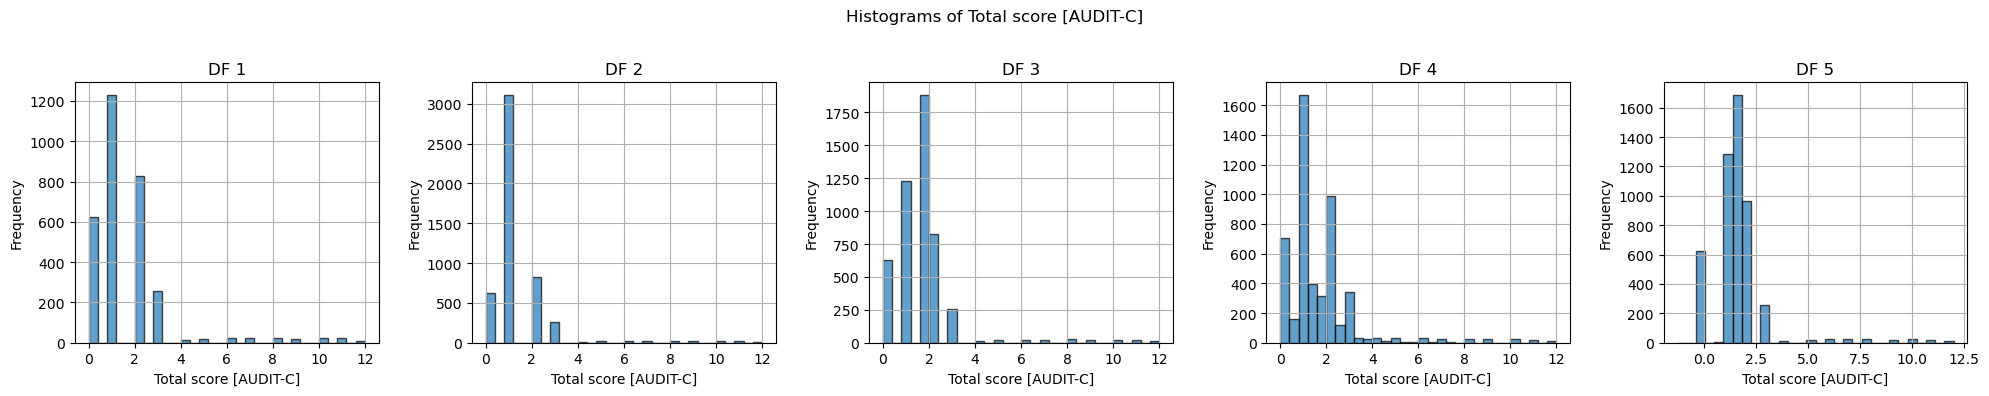

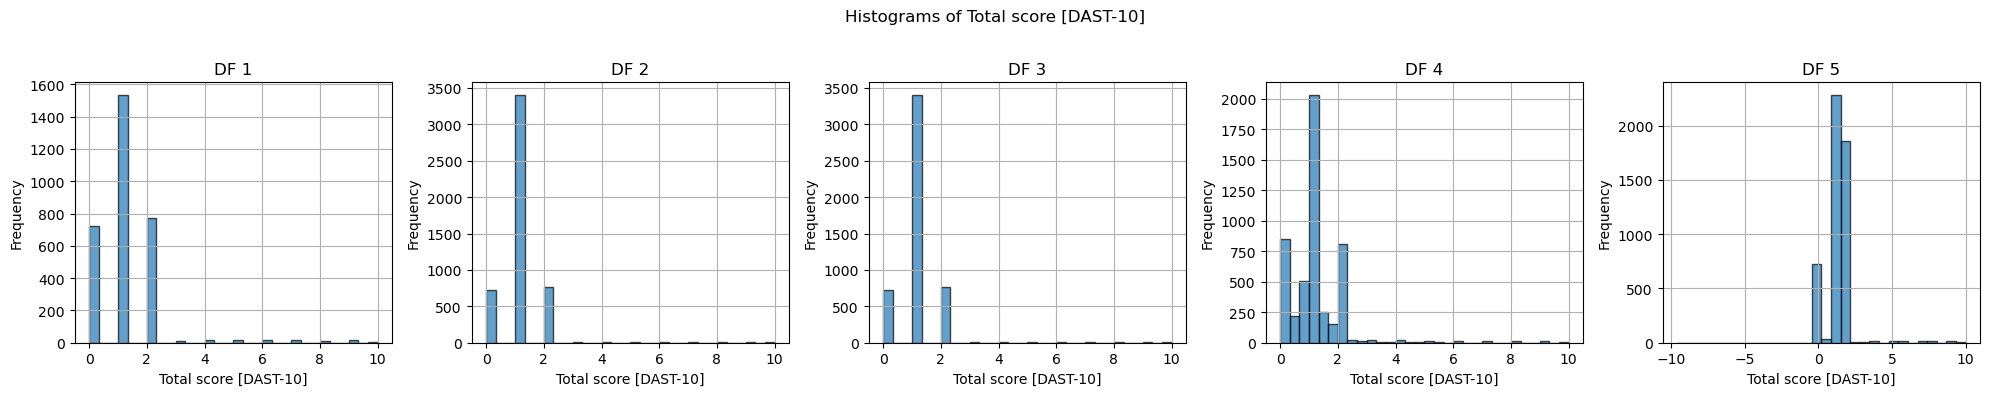

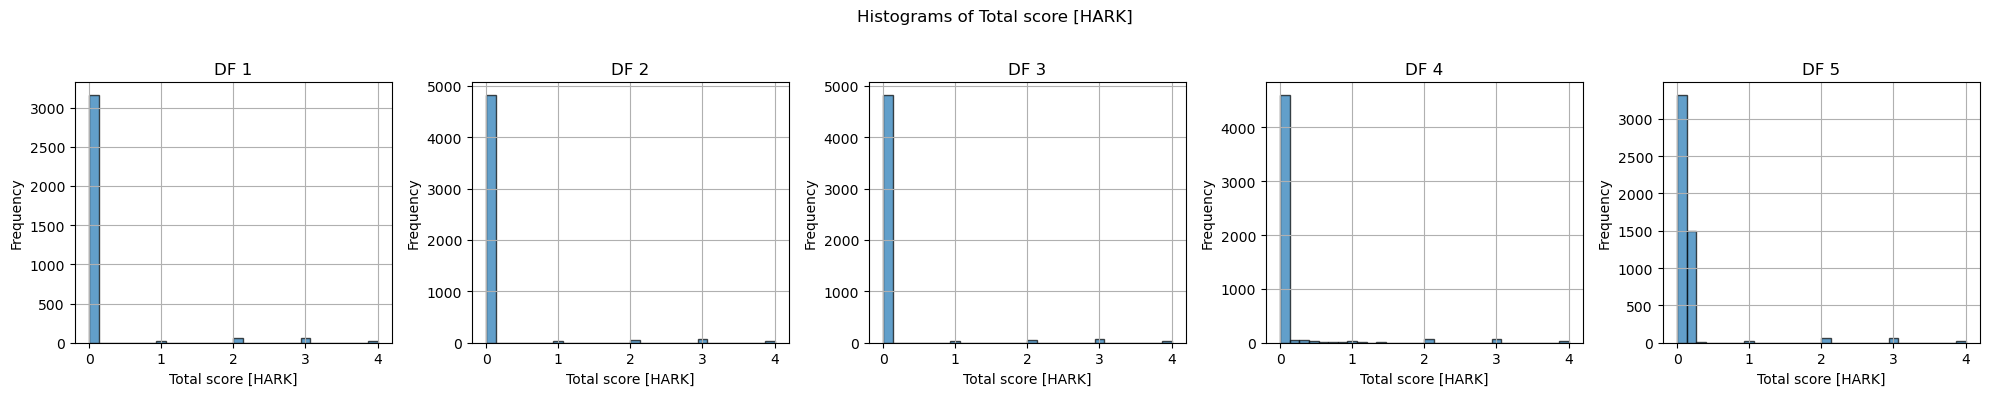

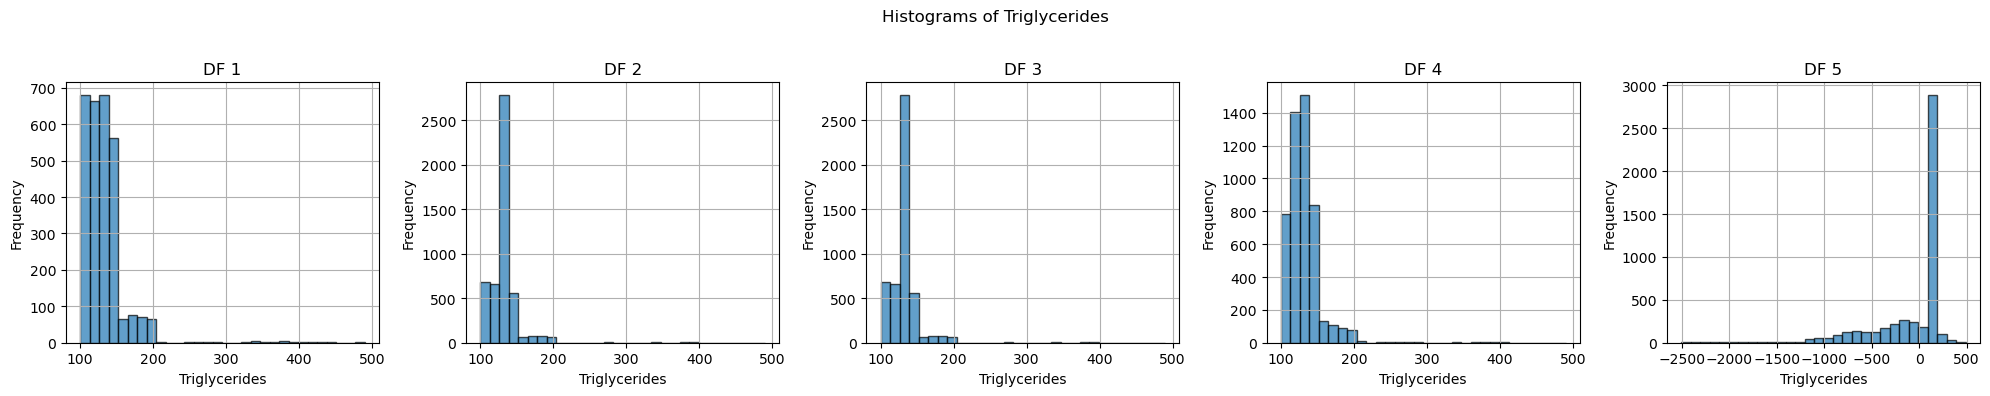

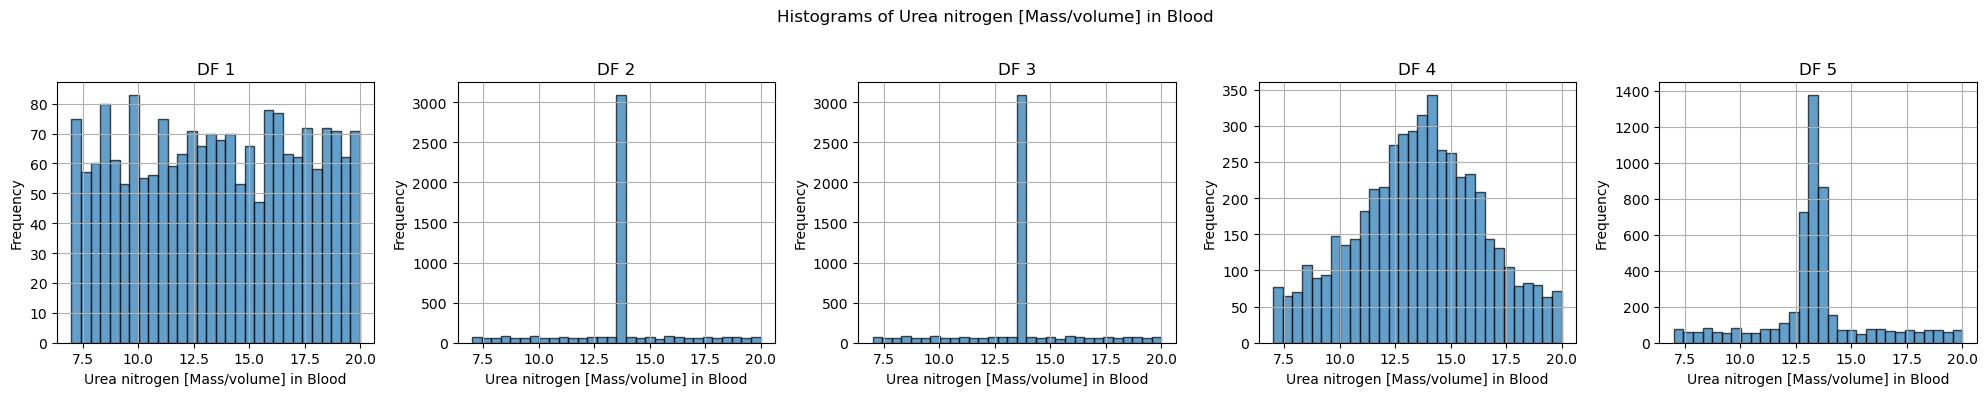

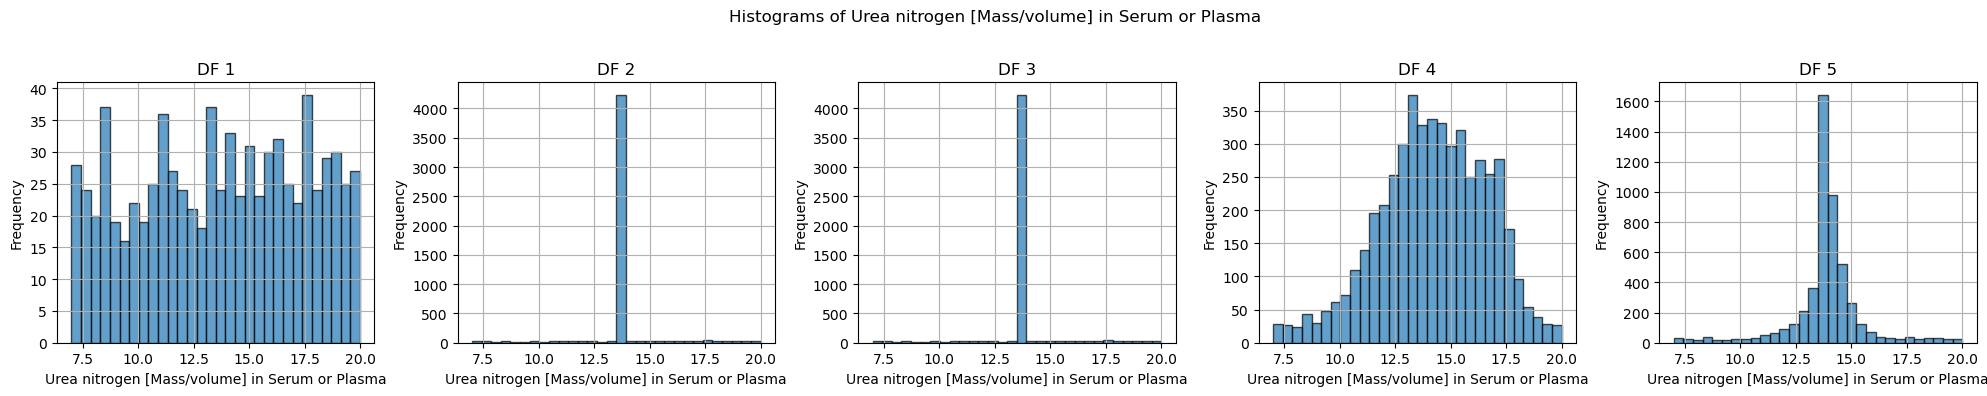

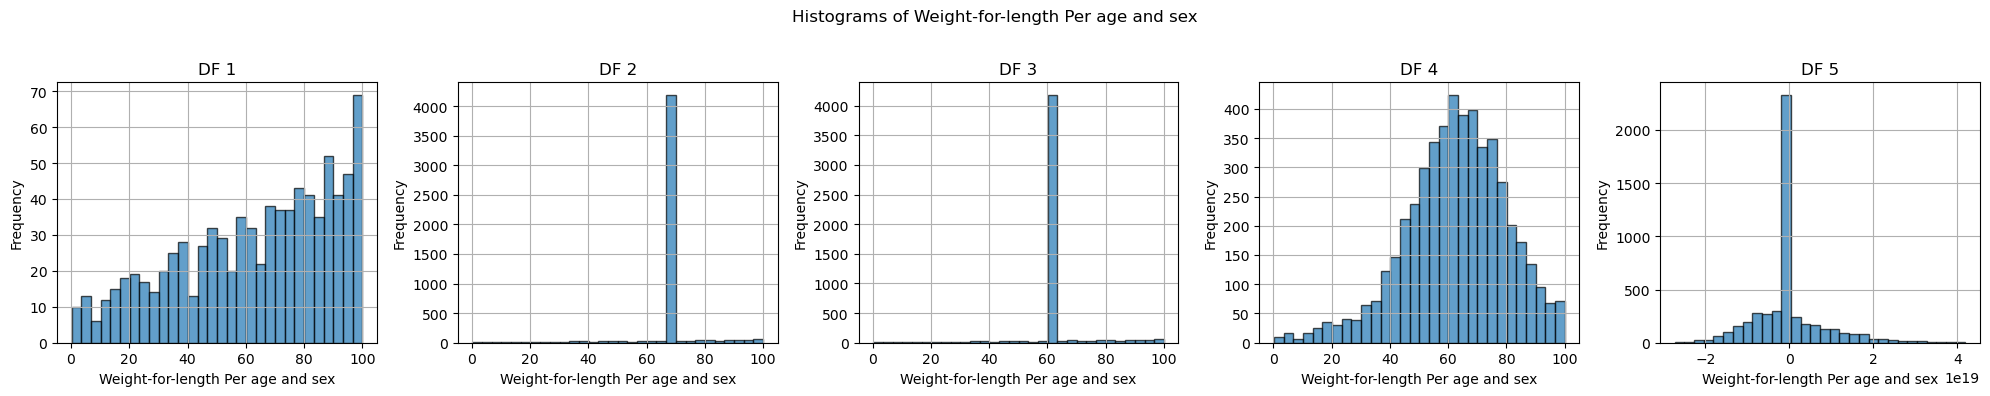

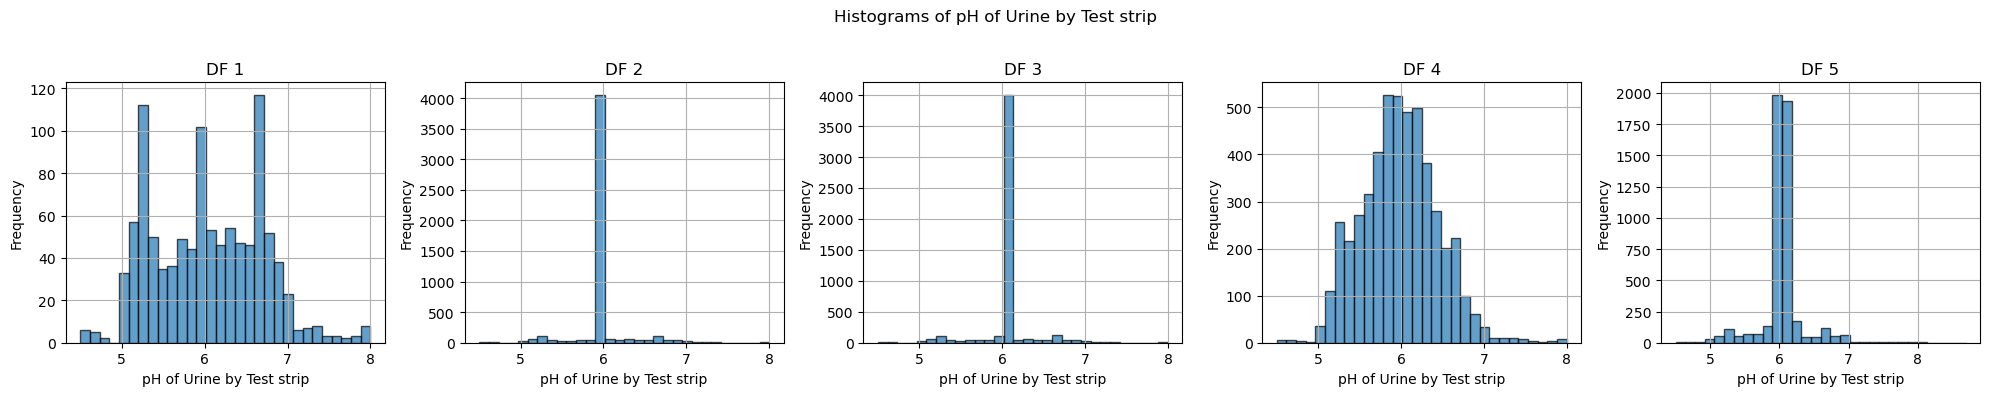

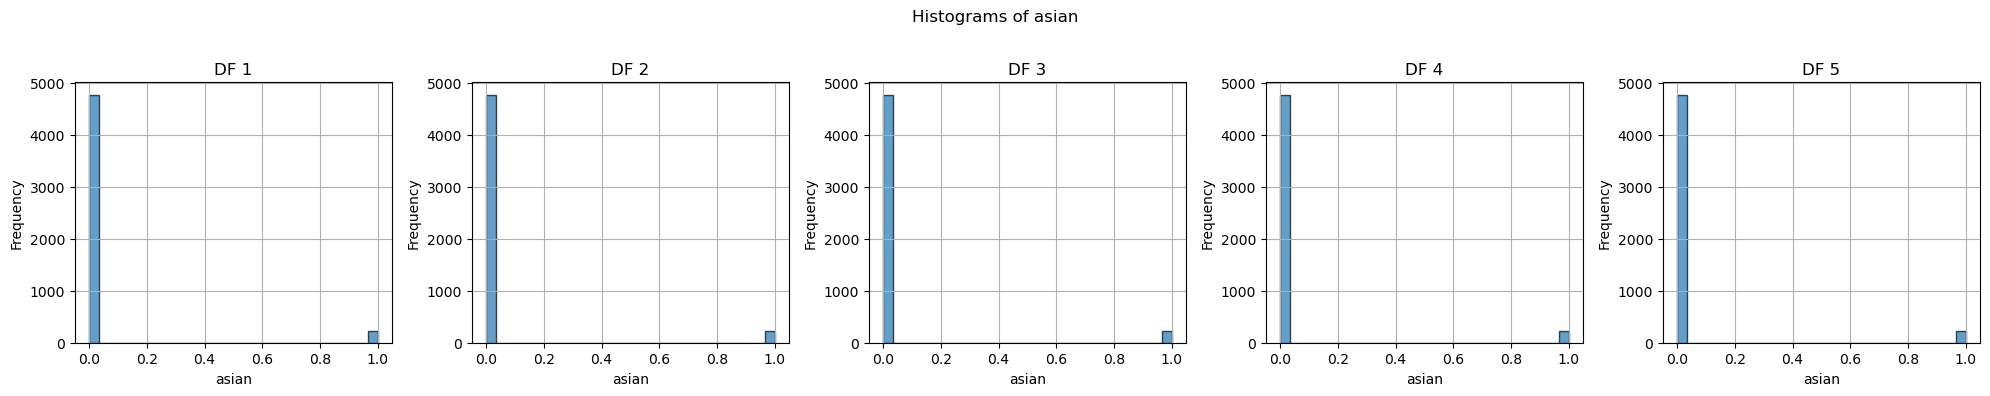

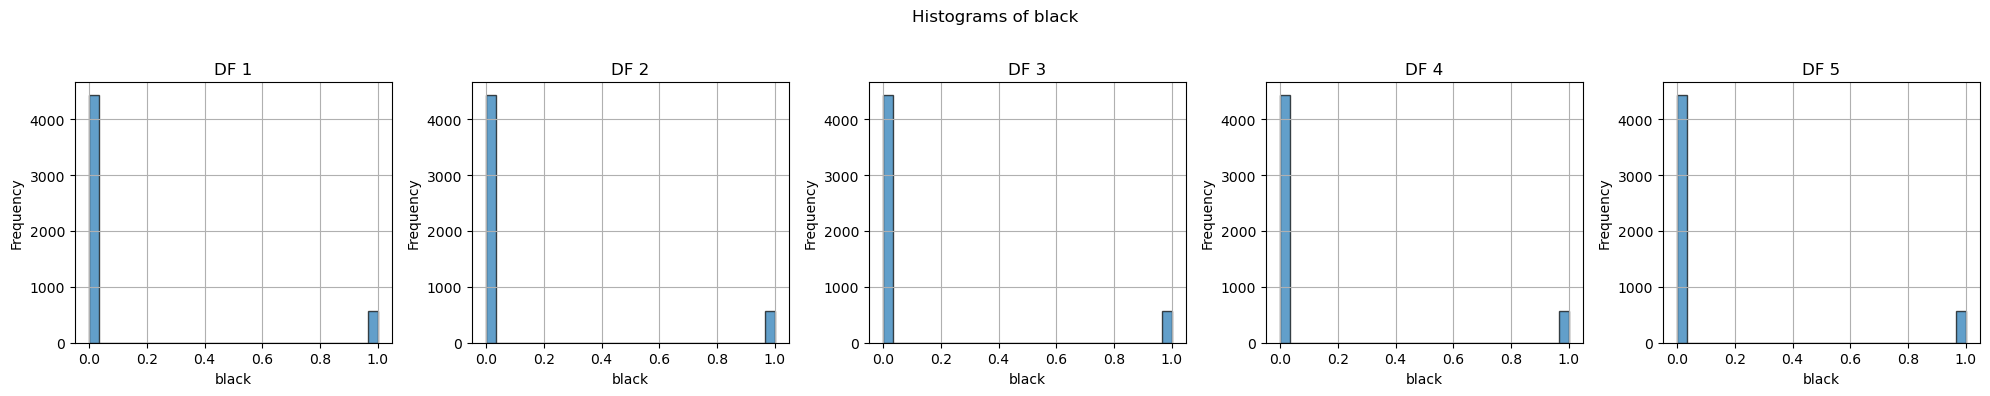

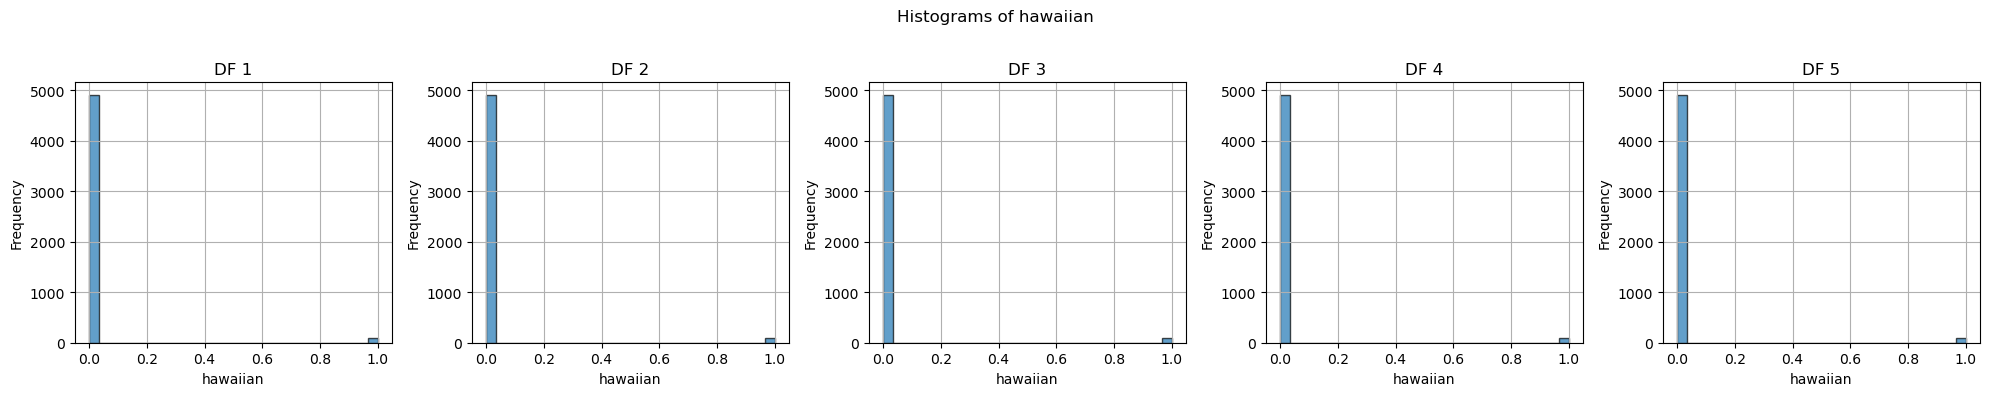

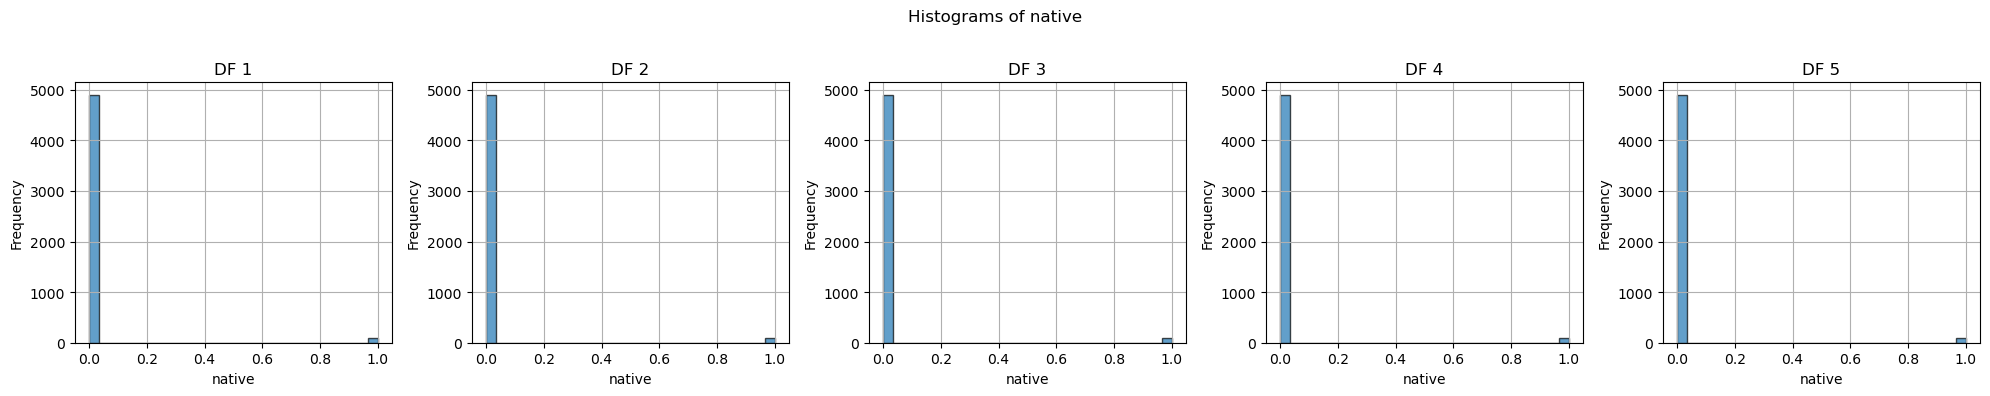

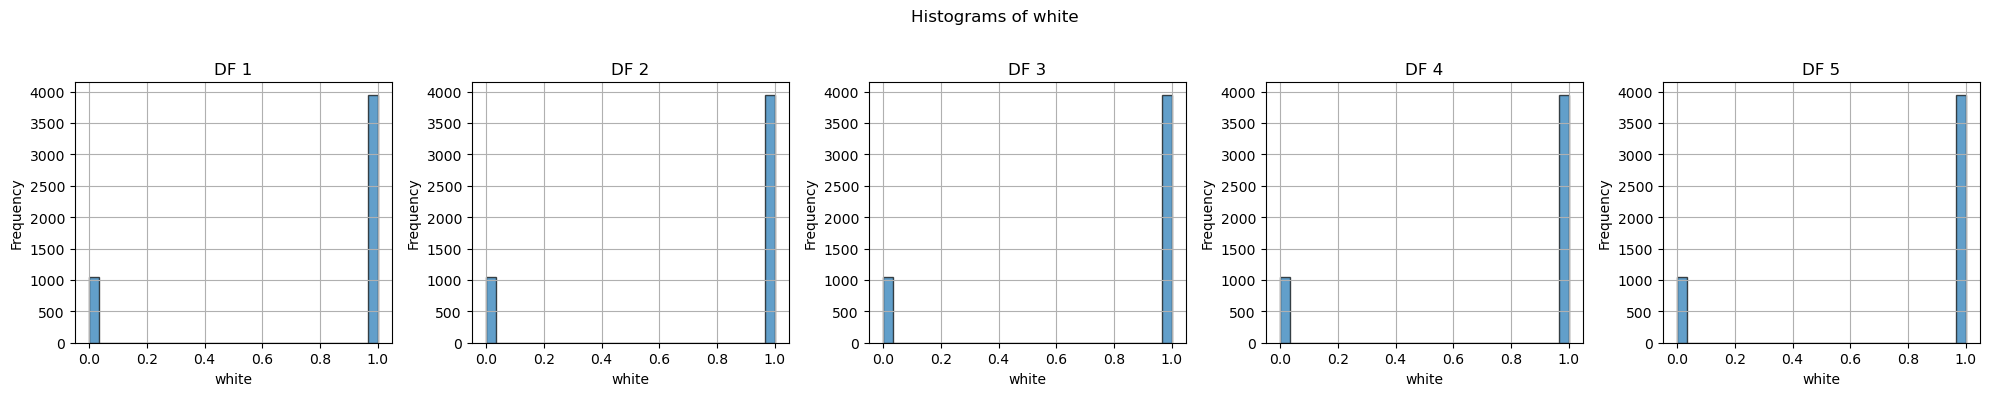

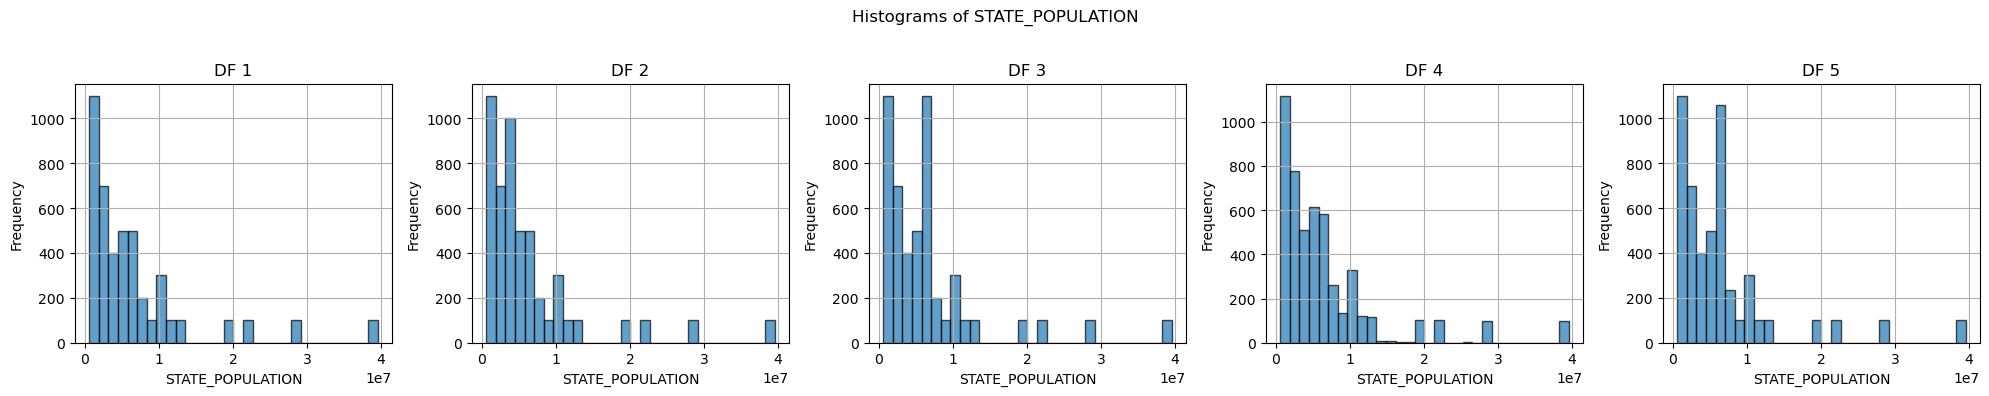

In [30]:
dataframes = [df, df_median, df_mean, df_knn, df_mice]

num_dataframes = len(dataframes)

for column in dataframes[0].columns:
    plt.figure(figsize=(20, 4))
    
    for idx, df in enumerate(dataframes):
        plt.subplot(1, num_dataframes, idx + 1) 
        plt.hist(df[column], bins=30, alpha=0.7, edgecolor='black')
        
        plt.title(f'DF {idx + 1}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
    
    plt.suptitle(f'Histograms of {column}')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [31]:
def histograms(imputed_df):
    num_cols = 3
    num_rows = (len(imputed_df.columns) + num_cols - 1) // num_cols 

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
    axs = axs.flatten()

    for i, column in enumerate(imputed_df.columns):
        axs[i].hist(imputed_df[column], bins=10, alpha=0.7, color='blue', edgecolor='black')
        axs[i].set_title(f'Histogram of {column}')
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Frequency')
        axs[i].grid(axis='y', alpha=0.75)

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

Principal component analysis (PCA) is performed.

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def scale_pca(imputed_df):
    scaler = StandardScaler()
    imputed_df_scaled = scaler.fit_transform(imputed_df)

    imputed_df_pca = PCA().fit(imputed_df_scaled)

    plt.plot(imputed_df_pca.explained_variance_ratio_.cumsum())
    plt.xlabel('Component #')
    plt.ylabel('Cumulative ratio variance')
    plt.title('Cumulative variance ratio explained by PCA components');

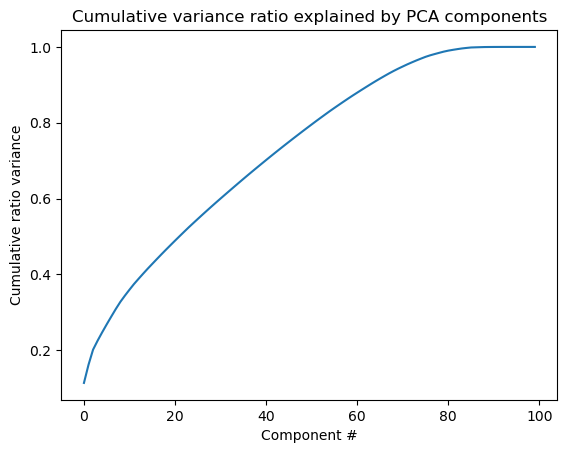

In [34]:
scale_pca(df_median)

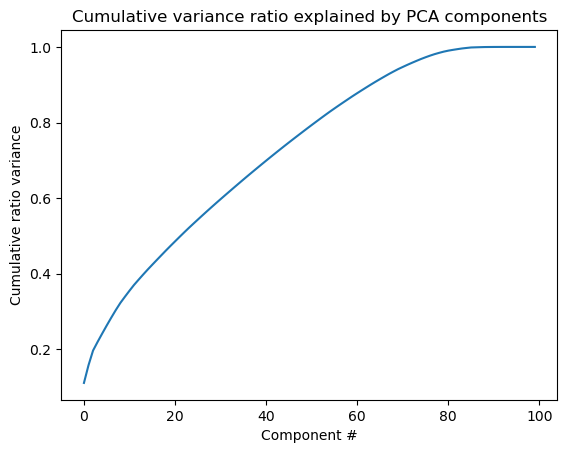

In [35]:
scale_pca(df_mean)

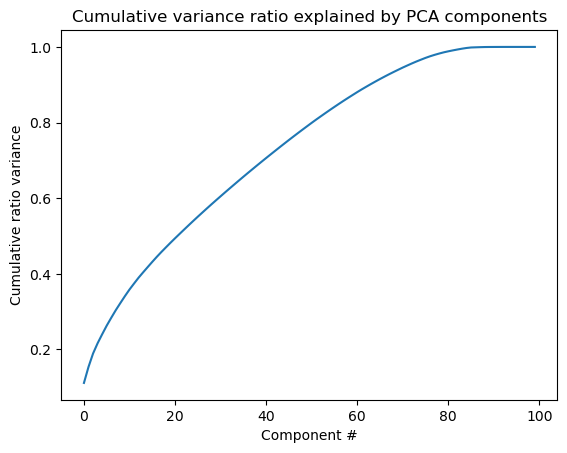

In [36]:
scale_pca(df_knn)

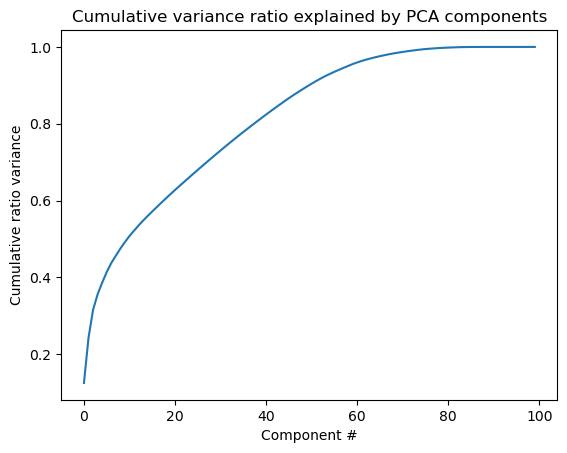

In [37]:
scale_pca(df_mice)

The data is split into train and test sets.

In [39]:
from sklearn.model_selection import train_test_split

X = df_knn.drop(columns = ['encounters_cost'])
y = df_knn['encounters_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

Mean - dummy regressor

In [41]:
train_mean = y_train.mean()
print(train_mean)

15040.235888


In [42]:
from sklearn.dummy import DummyRegressor
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
print(dumb_reg.constant_)

[[15040.235888]]


In [43]:
y_train_pred = dumb_reg.predict(X_train)
print(y_train_pred[:5])

[15040.235888 15040.235888 15040.235888 15040.235888 15040.235888]


In [44]:
y_test_pred = train_mean * np.ones(len(y_test))

In [45]:
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.0, -0.0006438954744745207)

In [46]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(18029.707116305064, 17276.0723290624)

In [47]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(1214707483.9057724, 1141617626.6961527)

Scale the data

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear regression

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

In [52]:
pipe = make_pipeline(LinearRegression())
pipe.fit(X_train_scaled, y_train)
y_train_pred = pipe.predict(X_train_scaled)
y_test_pred = pipe.predict(X_test_scaled)

print('Training R squared:', r2_score(y_train, y_train_pred))
print('Testing R squared:', r2_score(y_test, y_test_pred))
print('')
print('Training MAE: ', mean_absolute_error(y_train, y_train_pred))
print('Testing MAE: ', mean_absolute_error(y_test, y_test_pred))
print('')
print('Training MSE: ', mean_squared_error(y_train, y_train_pred))
print('Testing MSE: ', mean_squared_error(y_test, y_test_pred))

Training R squared: 0.5294921572476298
Testing R squared: 0.14996739898348221

Training MAE:  12988.133258592892
Testing MAE:  13135.70328463388

Training MSE:  571529397.8276645
Testing MSE:  969787758.6378471


In [53]:
pipe = make_pipeline(SelectKBest(f_regression), LinearRegression())
pipe.fit(X_train_scaled, y_train)
y_train_pred = pipe.predict(X_train_scaled)
y_test_pred = pipe.predict(X_test_scaled)

print('Training R squared:', r2_score(y_train, y_train_pred))
print('Testing R squared:', r2_score(y_test, y_test_pred))
print('')
print('Training MAE: ', mean_absolute_error(y_train, y_train_pred))
print('Testing MAE: ', mean_absolute_error(y_test, y_test_pred))
print('')
print('Training MSE: ', mean_squared_error(y_train, y_train_pred))
print('Testing MSE: ', mean_squared_error(y_test, y_test_pred))

Training R squared: 0.41697260811074943
Testing R squared: 0.40751032471975035

Training MAE:  12273.530028448344
Testing MAE:  11292.98693536205

Training MSE:  708207736.2499363
Testing MSE:  675961408.4435966


In [54]:
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve

cv_results = cross_validate(pipe, X_train_scaled, y_train, cv=5)
print(cv_results['test_score'])

[0.38786314 0.31246984 0.32872722 0.50182771 0.44629639]


In [55]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [56]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000001C8CDA56660>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [57]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]
lr_grid_cv.best_params_

{'selectkbest__k': 89}

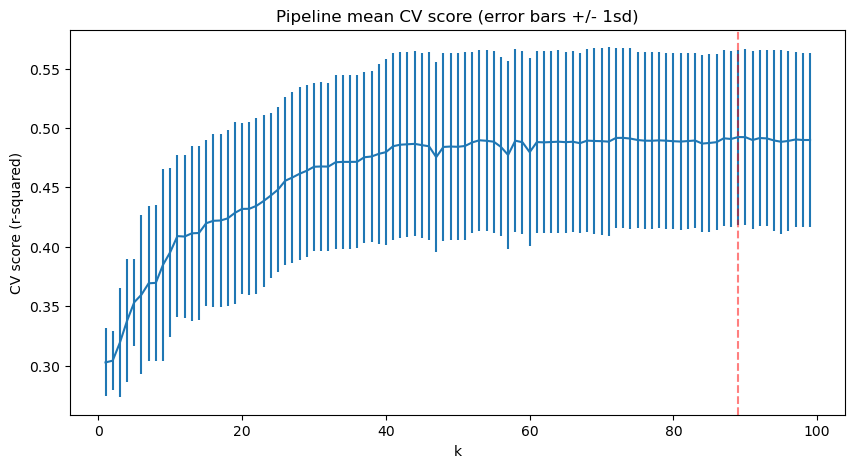

In [58]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [59]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
# pd.Series(coefs, index = features).sort_values(ascending = False)

In [60]:
pipe = make_pipeline(SelectKBest(f_regression, k = 40), LinearRegression())
pipe.fit(X_train_scaled, y_train)
y_train_pred = pipe.predict(X_train_scaled)
y_test_pred = pipe.predict(X_test_scaled)

print('Training R squared:', r2_score(y_train, y_train_pred))
print('Testing R squared:', r2_score(y_test, y_test_pred))
print('')
print('Training MAE: ', mean_absolute_error(y_train, y_train_pred))
print('Testing MAE: ', mean_absolute_error(y_test, y_test_pred))
print('')
print('Training MSE: ', mean_squared_error(y_train, y_train_pred))
print('Testing MSE: ', mean_squared_error(y_test, y_test_pred))

Training R squared: 0.4631749275279965
Testing R squared: 0.3528659406760073

Training MAE:  14339.430466906291
Testing MAE:  13889.44996752095

Training MSE:  652085433.0800014
Testing MSE:  738304258.1890707


Ridge Regression

In [62]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]:
# for alpha in range(100, 10001, 100):
    ridge = Ridge(alpha = alpha, fit_intercept = False, random_state = 123)
    ridge.fit(X_train_scaled, y_train)
    ridge_pred = ridge.predict(X_test_scaled)
    scores.append(ridge.score(X_test_scaled, y_test))
print(scores)

[0.0008478620418355121, 0.0012269450621256173, 0.00599336440241216, 0.0612725474304292, 0.1743409219134212, 0.0907908656490587]


In [63]:
pipe = make_pipeline(SelectKBest(f_regression), Ridge(alpha = 1000, fit_intercept = False, random_state = 123))
pipe.fit(X_train_scaled, y_train)
y_train_pred = pipe.predict(X_train_scaled)
y_test_pred = pipe.predict(X_test_scaled)

print('Training R squared:', r2_score(y_train, y_train_pred))
print('Testing R squared:', r2_score(y_test, y_test_pred))
print('')
print('Training MAE: ', mean_absolute_error(y_train, y_train_pred))
print('Testing MAE: ', mean_absolute_error(y_test, y_test_pred))
print('')
print('Training MSE: ', mean_squared_error(y_train, y_train_pred))
print('Testing MSE: ', mean_squared_error(y_test, y_test_pred))

Training R squared: 0.1898453755178544
Testing R squared: 0.1990985720190238

Training MAE:  16365.934028703352
Testing MAE:  15556.430201187128

Training MSE:  984100885.4793329
Testing MSE:  913734837.7023356


In [64]:
cv_results = cross_validate(pipe, X_train_scaled, y_train, cv=5)
print(cv_results['test_score'])

[0.12430406 0.16769022 0.13844572 0.20931259 0.17060344]


In [65]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [66]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000001C8CDA56660>)),
                                       ('ridge',
                                        Ridge(alpha=1000, fit_intercept=False,
                                              random_state=123))]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [67]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]
lr_grid_cv.best_params_

{'selectkbest__k': 72}

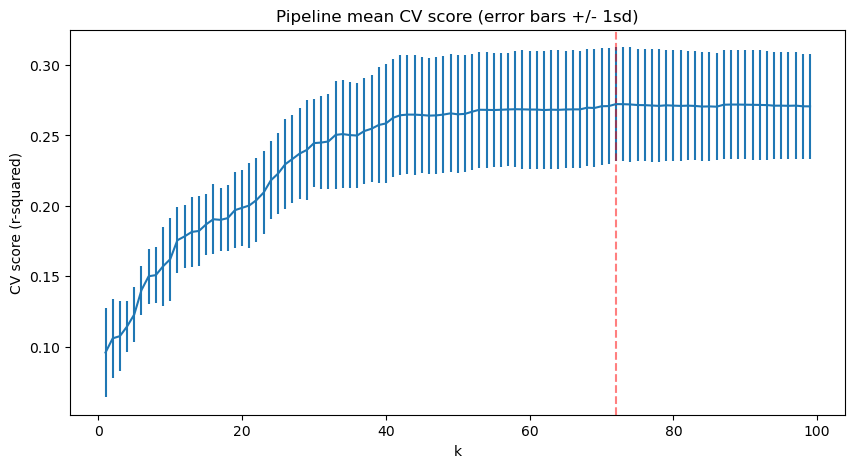

In [68]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [69]:
pipe = make_pipeline(SelectKBest(f_regression, k = 40), Ridge(alpha = 1000, fit_intercept = False, random_state = 123))
pipe.fit(X_train_scaled, y_train)
y_train_pred = pipe.predict(X_train_scaled)
y_test_pred = pipe.predict(X_test_scaled)

print('Training R squared:', r2_score(y_train, y_train_pred))
print('Testing R squared:', r2_score(y_test, y_test_pred))
print('')
print('Training MAE: ', mean_absolute_error(y_train, y_train_pred))
print('Testing MAE: ', mean_absolute_error(y_test, y_test_pred))
print('')
print('Training MSE: ', mean_squared_error(y_train, y_train_pred))
print('Testing MSE: ', mean_squared_error(y_test, y_test_pred))

Training R squared: 0.2878815044225933
Testing R squared: 0.19228820928708834

Training MAE:  17024.665780530664
Testing MAE:  16524.599713285257

Training MSE:  865015666.0055956
Testing MSE:  921504664.8847475


Lasso Regression

In [71]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]:
    lasso= Lasso(alpha = alpha, fit_intercept = False, random_state = 123)
    lasso.fit(X_train_scaled, y_train)
    lasso_pred = lasso.predict(X_test_scaled)
    scores.append(lasso.score(X_test_scaled, y_test))
print(scores)

[0.000804081087705466, 0.0012600190394266297, 0.004170636127640681, 0.05387067239641985, 0.2845140717280358, 0.05631441687112515]


In [72]:
pipe = make_pipeline(SelectKBest(f_regression), Lasso(alpha = 1000, fit_intercept = False, random_state = 123))
pipe.fit(X_train_scaled, y_train)
y_train_pred = pipe.predict(X_train_scaled)
y_test_pred = pipe.predict(X_test_scaled)

print('Training R squared:', r2_score(y_train, y_train_pred))
print('Testing R squared:', r2_score(y_test, y_test_pred))
print('')
print('Training MAE: ', mean_absolute_error(y_train, y_train_pred))
print('Testing MAE: ', mean_absolute_error(y_test, y_test_pred))
print('')
print('Training MSE: ', mean_squared_error(y_train, y_train_pred))
print('Testing MSE: ', mean_squared_error(y_test, y_test_pred))

Training R squared: 0.21444363998628624
Testing R squared: 0.2218749672621989

Training MAE:  16780.995557934744
Testing MAE:  16110.305091873819

Training MSE:  954221189.5384355
Testing MSE:  887749635.1744394


In [73]:
cv_results = cross_validate(pipe, X_train_scaled, y_train, cv=5)
print(cv_results['test_score'])

[0.13309023 0.1819523  0.14766781 0.24692382 0.20842086]


In [74]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [75]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000001C8CDA56660>)),
                                       ('lasso',
                                        Lasso(alpha=1000, fit_intercept=False,
                                              random_state=123))]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [76]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]
lr_grid_cv.best_params_

{'selectkbest__k': 87}

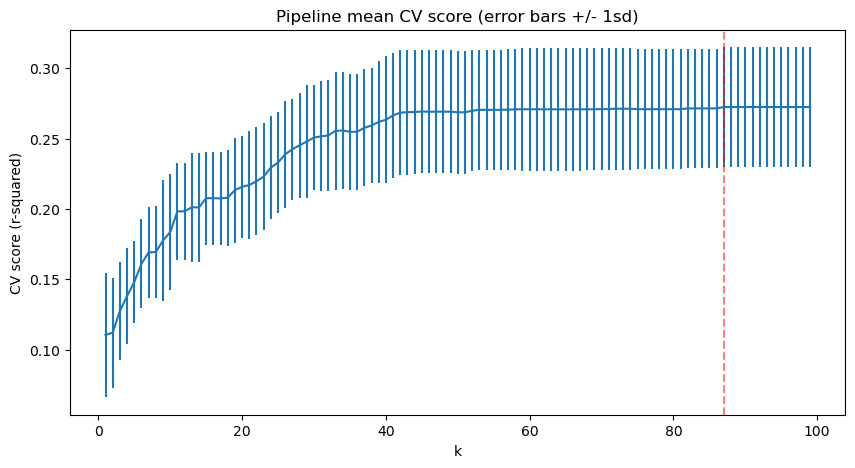

In [77]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [78]:
pipe = make_pipeline(SelectKBest(f_regression, k = 40), Lasso(alpha = 1000, fit_intercept = False, random_state = 123))
pipe.fit(X_train_scaled, y_train)
y_train_pred = pipe.predict(X_train_scaled)
y_test_pred = pipe.predict(X_test_scaled)

print('Training R squared:', r2_score(y_train, y_train_pred))
print('Testing R squared:', r2_score(y_test, y_test_pred))
print('')
print('Training MAE: ', mean_absolute_error(y_train, y_train_pred))
print('Testing MAE: ', mean_absolute_error(y_test, y_test_pred))
print('')
print('Training MSE: ', mean_squared_error(y_train, y_train_pred))
print('Testing MSE: ', mean_squared_error(y_test, y_test_pred))

Training R squared: 0.29242150733007954
Testing R squared: 0.2751109505137992

Training MAE:  16947.70625329686
Testing MAE:  16219.297319988442

Training MSE:  859500890.4969181
Testing MSE:  827013605.974251


Random forrest

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf_pipe = make_pipeline(RandomForestRegressor(n_estimators = 100, random_state = 123))
rf_default_cv_results = cross_validate(rf_pipe, X_train_scaled, y_train, cv=5)
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.82858178, 0.48417669, 0.7935105 , 0.74330306, 0.84054614])

In [81]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.7380236327822577, 0.13134426434599558)

In [82]:
# n_est = [int(n) for n in np.logspace(start=1, stop=3, num=10)]
n_est = [10, 100, 1000]
grid_params = {'randomforestregressor__n_estimators': n_est}

In [83]:
rf_grid_cv = GridSearchCV(rf_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [84]:
rf_grid_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 100,
                                                                 1000]})

In [85]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 100}

In [86]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train_scaled, y_train, cv=5)
rf_best_cv_results['test_score']

array([0.82858178, 0.48417669, 0.7935105 , 0.74330306, 0.84054614])

In [87]:
np.mean(rf_best_cv_results['test_score']), np.std(rf_best_cv_results['test_score'])

(0.7380236327822577, 0.13134426434599558)

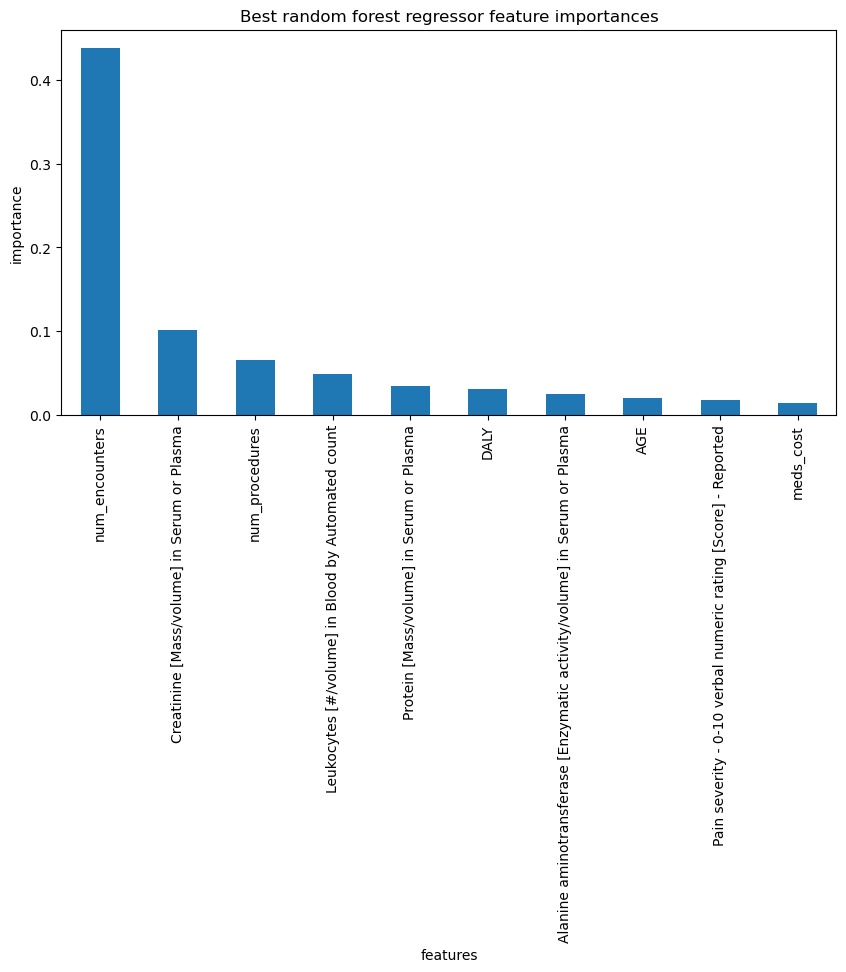

In [88]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)[0:10]
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [89]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train_scaled, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [90]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(6040.245001493333, 774.4604348608744)

In [91]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test_scaled))

5722.17344624

Random Tree

In [93]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()